## Prediction of numbers from MNIST images using multilayer perceptron softmax model
<br>

### Loss: Cross Entropy

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [3]:
## Download the MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(f"shape of X_train is {X_train.shape}")
print(f"shape of y_train is {Y_train.shape}")
print(f"shape of X_test is {X_test.shape}")
print(f"shape of y_test is {Y_test.shape}")

shape of X_train is (60000, 28, 28)
shape of y_train is (60000,)
shape of X_test is (10000, 28, 28)
shape of y_test is (10000,)


In [5]:
## Preprocessing: Flattening array and normalizing
X_train = X_train.reshape(60000,784)/255
X_test = X_test.reshape(10000,784)/255

In [6]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
tf.compat.v1.disable_eager_execution()

In [8]:
## Target label preprocessing: One hot encoding of output
with tf.compat.v1.Session() as ses:
    Y_train = ses.run(tf.one_hot(Y_train, 10))
    Y_test = ses.run(tf.one_hot(Y_test, 10))
    

In [9]:
Y_test[2:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Hyperparameters:

1. Number of layers:2
2. NUmber of Neurons: 
        Layer 1: 512
        Layer 2: 264
        output layer: 10 (softmax)
3. Weights:
        W1 = 784 x 512
        W2 = 512 x 264
        W3 = 264 x 10
4. bias:
        b1 = 512
        b2 = 264
        b3 = 10
5. learning rate
6. epoch
7. batch_size
8. batches_per_epoch


In [131]:
### Weights initialization techniques

def glorat_normal_distribution(layer1, layer2):
    '''Returns the standard deviation for Glorat normal distribution'''
    ## Formula: σ = sqrt(2/(n_input + hidden1))
    return np.round(np.sqrt(2/(layer1 + layer2)),3)    

def he_normal_distribution(layer1):
    '''Returns the standard deviation for Glorat normal distribution'''
    ## Formula:  σ = sqrt(2/(fan_in+1)); fan_in <-- No. of input layer
    return np.round(np.sqrt(2/(layer1)),3)    

In [132]:
### Defining the neural network architecture

## NUmber of hidden layers = 2
n_input = 784
hidden1 = 512
hidden2 = 128
output = 10

## Weights - Xavier Glorat normal distribution
## Formula: sqrt(2/(n_input + hidden1))
weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=glorat_normal_distribution(n_input, hidden1), mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=glorat_normal_distribution(hidden1, hidden2), mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=glorat_normal_distribution(hidden2, output), mean=0))

## bias initialization

bias1 = tf.Variable(np.random.randn(hidden1).astype(np.float32))
bias2 = tf.Variable(np.random.randn(hidden2).astype(np.float32))
bias3 = tf.Variable(np.random.randn(output).astype(np.float32))


In [133]:
## Hyperparameters initialization

epoch = 15
batch_size = 100
batches_per_epoch = int(X_train.shape[0]/batch_size)
learning_rate = 0.01


In [134]:
## Creating placeholders for input and output
x = tf.compat.v1.placeholder(tf.float32, [None, 784])
y = tf.compat.v1.placeholder(tf.float32, [None, 10])

In [18]:
### Multilayer perceptron with sigmoid activation units: building the neural network architecture

def mlp(inpt, w1, w2, w3, b1, b2, b3):
    '''Returns the multi layered perceptron output from input and initalized weights and biases'''
    
    ## Layer 1: 784 x 512
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(inpt,w1),b1))
    print(layer_1.get_shape(), w1.get_shape(), b1.get_shape())

    ## Layer 2: 512 x 264
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w2),b2))
    print(layer_2.get_shape(), w2.get_shape(), b2.get_shape())

    ## Layer 3: 264 x 10
    layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_2,w3),b3))
    print(layer_3.get_shape(), w3.get_shape(), b3.get_shape())
    
    return layer_3

In [14]:
# Prediction of numbers from images
yhat = mlp(x, weight1, weight2, weight3, bias1,bias2, bias3)

# Loss function
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(yhat), axis =1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat, labels = y))

(None, 512) (784, 512) (512,)
(None, 128) (512, 128) (128,)
(None, 10) (128, 10) (10,)


In [15]:
# Optimizer 1: Gradient Descent 
optimizer_gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Optimizer 2: Adam

adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [205]:
## Create tensorflow session and run it
def tf_session(optimizer):
    '''Runs the DNN model with the given optimizer and returns the following
    train_loss and test_loss for all epochs
    weights and
    accuracy
    '''
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())

        # these list collects the loss value of train and test data for every epoch
        train_loss, test_loss = [], []
    
        for e in range(epoch):
        
            # these lists collects the train and test loss value of every batch
            avg_trn_cost, avg_tst_cost = [], []
    
            for batch in range(batches_per_epoch):
            
                x_data = X_train[batch*batch_size : (batch+1)*batch_size]
                y_data = Y_train[batch*batch_size : (batch+1)*batch_size]
            
                _, c, w1,w2,w3 = sess.run([optimizer, cost, weight1, weight2, weight3], feed_dict = {x : x_data, y : y_data})
                
                print(f'Batch number: {batch} and train cost: {c}')
                
                avg_trn_cost.append(c)
                c_tst = sess.run(cost, feed_dict = {x : X_test, y : Y_test})            
                avg_tst_cost.append(c_tst)   

            train_loss.append(np.mean(avg_trn_cost))
            test_loss.append(np.mean(avg_tst_cost))
        
        correct_prediction = tf.math.equal(tf.math.argmax(y,1), tf.math.argmax(yhat,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print("Train accuracy", accuracy.eval({x : X_train , y : Y_train}))
        test_accuracy = accuracy.eval({x : X_test , y : Y_test})
        print("Test accuracy", test_accuracy)
        
        fig, axes = plt.subplots(1,10, figsize = (8,4))
        for img, ax in zip(X_test[10:21], axes):
            ax.set_title(np.argmax(sess.run(yhat, feed_dict={x: [img]})))
            ax.imshow(img.reshape(28,28))
            ax.axis('off')
    return [train_loss, test_loss, w1, w2, w3, test_accuracy]   

In [92]:
## Visual evaluation of predicted numbers from images
res = tf_session(adam_optimizer)

Train accuracy 0.98821664
Test accuracy 0.9769


- Accuracy of MLP model is 97.26%. The accuracy we obtained in a single perceptron was 91.7%
- MLP or feed forward NN significantly improved the accuracy

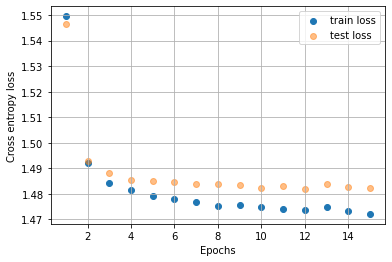

In [93]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), res[0], label = "train loss")
plt.scatter(range(1, epoch+1), res[1], label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")


In [94]:
results = pd.DataFrame(columns = ['activation_unit', 'optimizer', 'accuracy', 'train_loss', 'test_loss', 
                               'weight1', 'weight2', 'weight3'])
results

,activation_unit,optimizer,accuracy,train_loss,test_loss,weight1,weight2,weight3


In [95]:
results.loc[0] = ['sigmoid', 'adam', res[5], res[0], res[1], res[2], res[3], res[4]]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


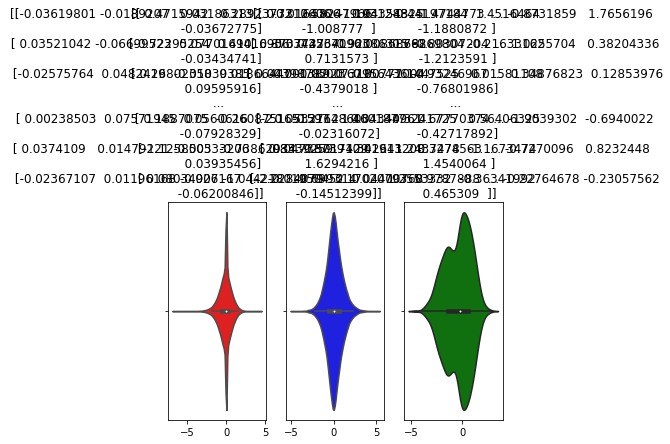

In [96]:

fig = plt.figure()
plt.subplot(1,3,1)
plt.title(res[2])
sns.violinplot(w1, color = 'red')

plt.subplot(1,3,2)
plt.title(res[3])
sns.violinplot(w2, color = 'blue')

plt.subplot(1,3,3)
plt.title(res[4])
sns.violinplot(w3, color = 'green')

- The weights follow a normal distributions
- The value of weights are in the range -5 to 5

## Sigmoid models with gradient descent

In [97]:
optimizer_gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
res = tf_session(optimizer_gd)

Train accuracy 0.59741664
Test accuracy 0.6089


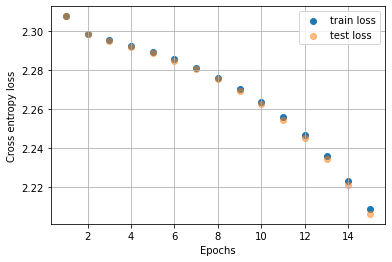

In [98]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), res[0], label = "train loss")
plt.scatter(range(1, epoch+1), res[1], label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")

In [99]:
results

,activation_unit,optimizer,accuracy,train_loss,test_loss,weight1,weight2,weight3
0,sigmoid,adam,0.9769,"[1.5495223, 1.4920709, 1.484456, 1.4813356, 1....","[1.5464011, 1.4929918, 1.4879929, 1.4855704, 1...","[[-0.036198013, -0.018920701, 0.031863127, 0.0...","[[0.4715942, 0.28923732, 0.58247966, 0.8406421...","[[0.7312606, -1.1931288, -1.4744773, -1.821540..."


In [100]:
## update results to results dataframe

results.loc[1] = ['sigmoid', 'gd', res[5], res[0], res[1], res[2], res[3], res[4]]

In [101]:
results

,activation_unit,optimizer,accuracy,train_loss,test_loss,weight1,weight2,weight3
0,sigmoid,adam,0.9769,"[1.5495223, 1.4920709, 1.484456, 1.4813356, 1....","[1.5464011, 1.4929918, 1.4879929, 1.4855704, 1...","[[-0.036198013, -0.018920701, 0.031863127, 0.0...","[[0.4715942, 0.28923732, 0.58247966, 0.8406421...","[[0.7312606, -1.1931288, -1.4744773, -1.821540..."
1,sigmoid,gd,0.6089,"[2.3073978, 2.298492, 2.2952466, 2.292354, 2.2...","[2.307303, 2.298238, 2.2948694, 2.291895, 2.28...","[[0.08542105, -0.041108303, -0.033613473, 0.06...","[[0.0017425624, -0.0499915, 0.029592166, 0.031...","[[-0.26376188, 0.16400473, 0.17453934, 0.23161..."


## Relu models with adam optimizer

In [114]:
weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=he_normal_distribution(n_input), mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=he_normal_distribution(hidden1), mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=he_normal_distribution(hidden2), mean=0))


0.125

In [168]:
#weight intialization

## Weights - He normal distribution
## Formula: sqrt(2/(n_input + hidden1))
weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=he_normal_distribution(n_input), mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=he_normal_distribution(hidden1), mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=he_normal_distribution(hidden2), mean=0))

def mlp_relu(inpt, w1, w2, w3, b1, b2, b3):
    '''Returns the multi layered perceptron output from input and initalized weights and biases'''
    
    ## Layer 1: 784 x 512
    layer_1 = tf.nn.relu(tf.add(tf.matmul(inpt,w1),b1))
    print(layer_1.get_shape(), w1.get_shape(), b1.get_shape())

    ## Layer 2: 512 x 264
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1,w2),b2))
    print(layer_2.get_shape(), w2.get_shape(), b2.get_shape())

    ## Layer 3: 264 x 10
    layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_2,w3),b3))
    print(layer_3.get_shape(), w3.get_shape(), b3.get_shape())
    
    return layer_3

In [169]:
# Prediction of numbers from images
yhat = mlp_relu(x, weight1, weight2, weight3, bias1, bias2, bias3)

# Loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat, labels = y))

(None, 512) (784, 512) (512,)
(None, 128) (512, 128) (128,)
(None, 10) (128, 10) (10,)


Batch number: 0 and train cost: 2.355395793914795
Batch number: 1 and train cost: 2.335163116455078
Batch number: 2 and train cost: 2.3524179458618164
Batch number: 3 and train cost: 2.365837812423706
Batch number: 4 and train cost: 2.282942295074463
Batch number: 5 and train cost: 2.2840309143066406
Batch number: 6 and train cost: 2.315157890319824
Batch number: 7 and train cost: 2.2702736854553223
Batch number: 8 and train cost: 2.2207651138305664
Batch number: 9 and train cost: 2.2307920455932617
Batch number: 10 and train cost: 2.204843521118164
Batch number: 11 and train cost: 2.135345935821533
Batch number: 12 and train cost: 2.113178253173828
Batch number: 13 and train cost: 2.120103597640991
Batch number: 14 and train cost: 1.9952538013458252
Batch number: 15 and train cost: 1.99214506149292
Batch number: 16 and train cost: 1.916385293006897
Batch number: 17 and train cost: 1.9604748487472534
Batch number: 18 and train cost: 1.9245421886444092
Batch number: 19 and train cost: 1

Batch number: 159 and train cost: 1.6067702770233154
Batch number: 160 and train cost: 1.6027286052703857
Batch number: 161 and train cost: 1.5755757093429565
Batch number: 162 and train cost: 1.5560358762741089
Batch number: 163 and train cost: 1.5608680248260498
Batch number: 164 and train cost: 1.5500473976135254
Batch number: 165 and train cost: 1.5736759901046753
Batch number: 166 and train cost: 1.6226657629013062
Batch number: 167 and train cost: 1.5855681896209717
Batch number: 168 and train cost: 1.5707385540008545
Batch number: 169 and train cost: 1.5978103876113892
Batch number: 170 and train cost: 1.580564022064209
Batch number: 171 and train cost: 1.5786861181259155
Batch number: 172 and train cost: 1.5731871128082275
Batch number: 173 and train cost: 1.5049757957458496
Batch number: 174 and train cost: 1.567832350730896
Batch number: 175 and train cost: 1.5908218622207642
Batch number: 176 and train cost: 1.5400053262710571
Batch number: 177 and train cost: 1.535754442214

Batch number: 315 and train cost: 1.5197678804397583
Batch number: 316 and train cost: 1.5655838251113892
Batch number: 317 and train cost: 1.6205145120620728
Batch number: 318 and train cost: 1.5350209474563599
Batch number: 319 and train cost: 1.548967719078064
Batch number: 320 and train cost: 1.563564419746399
Batch number: 321 and train cost: 1.5435023307800293
Batch number: 322 and train cost: 1.5553386211395264
Batch number: 323 and train cost: 1.6354751586914062
Batch number: 324 and train cost: 1.610013484954834
Batch number: 325 and train cost: 1.5166516304016113
Batch number: 326 and train cost: 1.5697253942489624
Batch number: 327 and train cost: 1.5736992359161377
Batch number: 328 and train cost: 1.5394978523254395
Batch number: 329 and train cost: 1.5007940530776978
Batch number: 330 and train cost: 1.5182222127914429
Batch number: 331 and train cost: 1.5182298421859741
Batch number: 332 and train cost: 1.5105445384979248
Batch number: 333 and train cost: 1.5624148845672

Batch number: 471 and train cost: 1.4946990013122559
Batch number: 472 and train cost: 1.6032307147979736
Batch number: 473 and train cost: 1.5281442403793335
Batch number: 474 and train cost: 1.5500527620315552
Batch number: 475 and train cost: 1.5076044797897339
Batch number: 476 and train cost: 1.5515811443328857
Batch number: 477 and train cost: 1.5326684713363647
Batch number: 478 and train cost: 1.505906581878662
Batch number: 479 and train cost: 1.5477465391159058
Batch number: 480 and train cost: 1.5433651208877563
Batch number: 481 and train cost: 1.5287076234817505
Batch number: 482 and train cost: 1.5190114974975586
Batch number: 483 and train cost: 1.5660927295684814
Batch number: 484 and train cost: 1.4837673902511597
Batch number: 485 and train cost: 1.5453883409500122
Batch number: 486 and train cost: 1.5202199220657349
Batch number: 487 and train cost: 1.4767770767211914
Batch number: 488 and train cost: 1.506419062614441
Batch number: 489 and train cost: 1.546364545822

Batch number: 27 and train cost: 1.5299668312072754
Batch number: 28 and train cost: 1.4910579919815063
Batch number: 29 and train cost: 1.5115220546722412
Batch number: 30 and train cost: 1.5153812170028687
Batch number: 31 and train cost: 1.4906251430511475
Batch number: 32 and train cost: 1.5267002582550049
Batch number: 33 and train cost: 1.501492977142334
Batch number: 34 and train cost: 1.5165539979934692
Batch number: 35 and train cost: 1.509129524230957
Batch number: 36 and train cost: 1.5288195610046387
Batch number: 37 and train cost: 1.5591694116592407
Batch number: 38 and train cost: 1.4827064275741577
Batch number: 39 and train cost: 1.4744811058044434
Batch number: 40 and train cost: 1.5337315797805786
Batch number: 41 and train cost: 1.5386762619018555
Batch number: 42 and train cost: 1.5099380016326904
Batch number: 43 and train cost: 1.4958347082138062
Batch number: 44 and train cost: 1.4846258163452148
Batch number: 45 and train cost: 1.480147361755371
Batch number: 4

Batch number: 187 and train cost: 1.5113170146942139
Batch number: 188 and train cost: 1.482794165611267
Batch number: 189 and train cost: 1.4777886867523193
Batch number: 190 and train cost: 1.497904658317566
Batch number: 191 and train cost: 1.521079659461975
Batch number: 192 and train cost: 1.5282478332519531
Batch number: 193 and train cost: 1.5065535306930542
Batch number: 194 and train cost: 1.502832293510437
Batch number: 195 and train cost: 1.5618934631347656
Batch number: 196 and train cost: 1.4664546251296997
Batch number: 197 and train cost: 1.4813936948776245
Batch number: 198 and train cost: 1.5336272716522217
Batch number: 199 and train cost: 1.4961442947387695
Batch number: 200 and train cost: 1.5108681917190552
Batch number: 201 and train cost: 1.5294015407562256
Batch number: 202 and train cost: 1.5057249069213867
Batch number: 203 and train cost: 1.496577501296997
Batch number: 204 and train cost: 1.4945837259292603
Batch number: 205 and train cost: 1.518701672554016

Batch number: 343 and train cost: 1.4953380823135376
Batch number: 344 and train cost: 1.5453909635543823
Batch number: 345 and train cost: 1.5276798009872437
Batch number: 346 and train cost: 1.5161349773406982
Batch number: 347 and train cost: 1.5391724109649658
Batch number: 348 and train cost: 1.5592241287231445
Batch number: 349 and train cost: 1.5093269348144531
Batch number: 350 and train cost: 1.4867993593215942
Batch number: 351 and train cost: 1.4974926710128784
Batch number: 352 and train cost: 1.4996153116226196
Batch number: 353 and train cost: 1.4992566108703613
Batch number: 354 and train cost: 1.5116976499557495
Batch number: 355 and train cost: 1.4817004203796387
Batch number: 356 and train cost: 1.4966202974319458
Batch number: 357 and train cost: 1.4923913478851318
Batch number: 358 and train cost: 1.483860731124878
Batch number: 359 and train cost: 1.5161548852920532
Batch number: 360 and train cost: 1.5101302862167358
Batch number: 361 and train cost: 1.52135288715

Batch number: 499 and train cost: 1.560806155204773
Batch number: 500 and train cost: 1.4947704076766968
Batch number: 501 and train cost: 1.5266472101211548
Batch number: 502 and train cost: 1.5673904418945312
Batch number: 503 and train cost: 1.5540237426757812
Batch number: 504 and train cost: 1.578187108039856
Batch number: 505 and train cost: 1.546055555343628
Batch number: 506 and train cost: 1.4917112588882446
Batch number: 507 and train cost: 1.489935040473938
Batch number: 508 and train cost: 1.4735236167907715
Batch number: 509 and train cost: 1.4797866344451904
Batch number: 510 and train cost: 1.465415596961975
Batch number: 511 and train cost: 1.4934312105178833
Batch number: 512 and train cost: 1.5289143323898315
Batch number: 513 and train cost: 1.4946388006210327
Batch number: 514 and train cost: 1.4726996421813965
Batch number: 515 and train cost: 1.4966624975204468
Batch number: 516 and train cost: 1.493654489517212
Batch number: 517 and train cost: 1.4978156089782715

Batch number: 59 and train cost: 1.4830700159072876
Batch number: 60 and train cost: 1.4882012605667114
Batch number: 61 and train cost: 1.5048199892044067
Batch number: 62 and train cost: 1.5174015760421753
Batch number: 63 and train cost: 1.4741415977478027
Batch number: 64 and train cost: 1.5249272584915161
Batch number: 65 and train cost: 1.481172800064087
Batch number: 66 and train cost: 1.487818956375122
Batch number: 67 and train cost: 1.4887433052062988
Batch number: 68 and train cost: 1.546247959136963
Batch number: 69 and train cost: 1.4999240636825562
Batch number: 70 and train cost: 1.5137414932250977
Batch number: 71 and train cost: 1.4902132749557495
Batch number: 72 and train cost: 1.5097466707229614
Batch number: 73 and train cost: 1.5009808540344238
Batch number: 74 and train cost: 1.5055625438690186
Batch number: 75 and train cost: 1.5400702953338623
Batch number: 76 and train cost: 1.493963599205017
Batch number: 77 and train cost: 1.498291015625
Batch number: 78 and

Batch number: 219 and train cost: 1.5365201234817505
Batch number: 220 and train cost: 1.4668307304382324
Batch number: 221 and train cost: 1.517113208770752
Batch number: 222 and train cost: 1.5337697267532349
Batch number: 223 and train cost: 1.4782119989395142
Batch number: 224 and train cost: 1.5248030424118042
Batch number: 225 and train cost: 1.5687898397445679
Batch number: 226 and train cost: 1.5083794593811035
Batch number: 227 and train cost: 1.5220286846160889
Batch number: 228 and train cost: 1.5059654712677002
Batch number: 229 and train cost: 1.464383602142334
Batch number: 230 and train cost: 1.521592617034912
Batch number: 231 and train cost: 1.5086264610290527
Batch number: 232 and train cost: 1.4716155529022217
Batch number: 233 and train cost: 1.4804247617721558
Batch number: 234 and train cost: 1.4980047941207886
Batch number: 235 and train cost: 1.4812370538711548
Batch number: 236 and train cost: 1.4974201917648315
Batch number: 237 and train cost: 1.5073113441467

Batch number: 375 and train cost: 1.5079439878463745
Batch number: 376 and train cost: 1.5061367750167847
Batch number: 377 and train cost: 1.51271390914917
Batch number: 378 and train cost: 1.4911646842956543
Batch number: 379 and train cost: 1.504557490348816
Batch number: 380 and train cost: 1.481197476387024
Batch number: 381 and train cost: 1.461350917816162
Batch number: 382 and train cost: 1.470977783203125
Batch number: 383 and train cost: 1.5496585369110107
Batch number: 384 and train cost: 1.4841264486312866
Batch number: 385 and train cost: 1.5302847623825073
Batch number: 386 and train cost: 1.5381381511688232
Batch number: 387 and train cost: 1.5238521099090576
Batch number: 388 and train cost: 1.475337266921997
Batch number: 389 and train cost: 1.5027756690979004
Batch number: 390 and train cost: 1.4805978536605835
Batch number: 391 and train cost: 1.4914511442184448
Batch number: 392 and train cost: 1.5017226934432983
Batch number: 393 and train cost: 1.5511109828948975


Batch number: 531 and train cost: 1.4911448955535889
Batch number: 532 and train cost: 1.4899731874465942
Batch number: 533 and train cost: 1.4792280197143555
Batch number: 534 and train cost: 1.491004228591919
Batch number: 535 and train cost: 1.5128475427627563
Batch number: 536 and train cost: 1.524145483970642
Batch number: 537 and train cost: 1.4971897602081299
Batch number: 538 and train cost: 1.5116643905639648
Batch number: 539 and train cost: 1.528265357017517
Batch number: 540 and train cost: 1.4915804862976074
Batch number: 541 and train cost: 1.479241967201233
Batch number: 542 and train cost: 1.4713937044143677
Batch number: 543 and train cost: 1.4810473918914795
Batch number: 544 and train cost: 1.4825329780578613
Batch number: 545 and train cost: 1.4993808269500732
Batch number: 546 and train cost: 1.4777804613113403
Batch number: 547 and train cost: 1.490527629852295
Batch number: 548 and train cost: 1.5000535249710083
Batch number: 549 and train cost: 1.499652981758117

Batch number: 91 and train cost: 1.4898386001586914
Batch number: 92 and train cost: 1.5103745460510254
Batch number: 93 and train cost: 1.4973477125167847
Batch number: 94 and train cost: 1.5042272806167603
Batch number: 95 and train cost: 1.5212104320526123
Batch number: 96 and train cost: 1.5085660219192505
Batch number: 97 and train cost: 1.5016446113586426
Batch number: 98 and train cost: 1.4808638095855713
Batch number: 99 and train cost: 1.4815282821655273
Batch number: 100 and train cost: 1.530673623085022
Batch number: 101 and train cost: 1.5142722129821777
Batch number: 102 and train cost: 1.5169826745986938
Batch number: 103 and train cost: 1.4774402379989624
Batch number: 104 and train cost: 1.4614453315734863
Batch number: 105 and train cost: 1.4803321361541748
Batch number: 106 and train cost: 1.4613845348358154
Batch number: 107 and train cost: 1.4904576539993286
Batch number: 108 and train cost: 1.4892905950546265
Batch number: 109 and train cost: 1.5111074447631836
Bat

Batch number: 247 and train cost: 1.5186163187026978
Batch number: 248 and train cost: 1.486276388168335
Batch number: 249 and train cost: 1.4812780618667603
Batch number: 250 and train cost: 1.4718002080917358
Batch number: 251 and train cost: 1.5164471864700317
Batch number: 252 and train cost: 1.5161978006362915
Batch number: 253 and train cost: 1.4891146421432495
Batch number: 254 and train cost: 1.484656572341919
Batch number: 255 and train cost: 1.4955604076385498
Batch number: 256 and train cost: 1.5133520364761353
Batch number: 257 and train cost: 1.5019927024841309
Batch number: 258 and train cost: 1.512037754058838
Batch number: 259 and train cost: 1.4878315925598145
Batch number: 260 and train cost: 1.5012640953063965
Batch number: 261 and train cost: 1.4902111291885376
Batch number: 262 and train cost: 1.4932785034179688
Batch number: 263 and train cost: 1.5229482650756836
Batch number: 264 and train cost: 1.4935898780822754
Batch number: 265 and train cost: 1.5031300783157

Batch number: 403 and train cost: 1.512019395828247
Batch number: 404 and train cost: 1.461521029472351
Batch number: 405 and train cost: 1.4624465703964233
Batch number: 406 and train cost: 1.4816110134124756
Batch number: 407 and train cost: 1.5056228637695312
Batch number: 408 and train cost: 1.501116156578064
Batch number: 409 and train cost: 1.4832069873809814
Batch number: 410 and train cost: 1.5234837532043457
Batch number: 411 and train cost: 1.5015480518341064
Batch number: 412 and train cost: 1.536224365234375
Batch number: 413 and train cost: 1.529517412185669
Batch number: 414 and train cost: 1.5045398473739624
Batch number: 415 and train cost: 1.49042546749115
Batch number: 416 and train cost: 1.4919971227645874
Batch number: 417 and train cost: 1.4768309593200684
Batch number: 418 and train cost: 1.491050124168396
Batch number: 419 and train cost: 1.5270700454711914
Batch number: 420 and train cost: 1.5111123323440552
Batch number: 421 and train cost: 1.4944500923156738
B

Batch number: 559 and train cost: 1.4889355897903442
Batch number: 560 and train cost: 1.4908952713012695
Batch number: 561 and train cost: 1.4618878364562988
Batch number: 562 and train cost: 1.5028666257858276
Batch number: 563 and train cost: 1.4838200807571411
Batch number: 564 and train cost: 1.5011541843414307
Batch number: 565 and train cost: 1.4842844009399414
Batch number: 566 and train cost: 1.520917534828186
Batch number: 567 and train cost: 1.4878668785095215
Batch number: 568 and train cost: 1.520932912826538
Batch number: 569 and train cost: 1.4820027351379395
Batch number: 570 and train cost: 1.5085556507110596
Batch number: 571 and train cost: 1.4696061611175537
Batch number: 572 and train cost: 1.493147611618042
Batch number: 573 and train cost: 1.4713003635406494
Batch number: 574 and train cost: 1.4825094938278198
Batch number: 575 and train cost: 1.4611709117889404
Batch number: 576 and train cost: 1.5108113288879395
Batch number: 577 and train cost: 1.4914556741714

Batch number: 119 and train cost: 1.4931756258010864
Batch number: 120 and train cost: 1.4999569654464722
Batch number: 121 and train cost: 1.4914714097976685
Batch number: 122 and train cost: 1.4718090295791626
Batch number: 123 and train cost: 1.4810981750488281
Batch number: 124 and train cost: 1.4680215120315552
Batch number: 125 and train cost: 1.4875428676605225
Batch number: 126 and train cost: 1.5327370166778564
Batch number: 127 and train cost: 1.4799729585647583
Batch number: 128 and train cost: 1.4803417921066284
Batch number: 129 and train cost: 1.517124056816101
Batch number: 130 and train cost: 1.4894639253616333
Batch number: 131 and train cost: 1.4945591688156128
Batch number: 132 and train cost: 1.4730806350708008
Batch number: 133 and train cost: 1.4987274408340454
Batch number: 134 and train cost: 1.4911352396011353
Batch number: 135 and train cost: 1.481749415397644
Batch number: 136 and train cost: 1.497273564338684
Batch number: 137 and train cost: 1.4959231615066

Batch number: 275 and train cost: 1.4798991680145264
Batch number: 276 and train cost: 1.5049481391906738
Batch number: 277 and train cost: 1.4851552248001099
Batch number: 278 and train cost: 1.483699917793274
Batch number: 279 and train cost: 1.4710090160369873
Batch number: 280 and train cost: 1.4792695045471191
Batch number: 281 and train cost: 1.4662727117538452
Batch number: 282 and train cost: 1.4810667037963867
Batch number: 283 and train cost: 1.5110496282577515
Batch number: 284 and train cost: 1.482659101486206
Batch number: 285 and train cost: 1.475631594657898
Batch number: 286 and train cost: 1.5138609409332275
Batch number: 287 and train cost: 1.5170958042144775
Batch number: 288 and train cost: 1.4615896940231323
Batch number: 289 and train cost: 1.4736491441726685
Batch number: 290 and train cost: 1.509798526763916
Batch number: 291 and train cost: 1.48779296875
Batch number: 292 and train cost: 1.480582594871521
Batch number: 293 and train cost: 1.5074982643127441
Bat

Batch number: 431 and train cost: 1.4866104125976562
Batch number: 432 and train cost: 1.4711487293243408
Batch number: 433 and train cost: 1.4740623235702515
Batch number: 434 and train cost: 1.471166729927063
Batch number: 435 and train cost: 1.503633975982666
Batch number: 436 and train cost: 1.5011497735977173
Batch number: 437 and train cost: 1.491905927658081
Batch number: 438 and train cost: 1.5010565519332886
Batch number: 439 and train cost: 1.4948811531066895
Batch number: 440 and train cost: 1.4822492599487305
Batch number: 441 and train cost: 1.4840855598449707
Batch number: 442 and train cost: 1.4912028312683105
Batch number: 443 and train cost: 1.491713047027588
Batch number: 444 and train cost: 1.509609580039978
Batch number: 445 and train cost: 1.490118145942688
Batch number: 446 and train cost: 1.50496506690979
Batch number: 447 and train cost: 1.4909816980361938
Batch number: 448 and train cost: 1.5069186687469482
Batch number: 449 and train cost: 1.5041000843048096
B

Batch number: 587 and train cost: 1.4611501693725586
Batch number: 588 and train cost: 1.510990023612976
Batch number: 589 and train cost: 1.4611501693725586
Batch number: 590 and train cost: 1.4703487157821655
Batch number: 591 and train cost: 1.4616725444793701
Batch number: 592 and train cost: 1.5010532140731812
Batch number: 593 and train cost: 1.5301306247711182
Batch number: 594 and train cost: 1.4712579250335693
Batch number: 595 and train cost: 1.4612135887145996
Batch number: 596 and train cost: 1.4733026027679443
Batch number: 597 and train cost: 1.5447736978530884
Batch number: 598 and train cost: 1.461168646812439
Batch number: 599 and train cost: 1.4755114316940308
Batch number: 0 and train cost: 1.491361379623413
Batch number: 1 and train cost: 1.523148536682129
Batch number: 2 and train cost: 1.520565152168274
Batch number: 3 and train cost: 1.4711483716964722
Batch number: 4 and train cost: 1.4876108169555664
Batch number: 5 and train cost: 1.4823815822601318
Batch numb

Batch number: 147 and train cost: 1.5393931865692139
Batch number: 148 and train cost: 1.4718176126480103
Batch number: 149 and train cost: 1.471276879310608
Batch number: 150 and train cost: 1.4811903238296509
Batch number: 151 and train cost: 1.4814887046813965
Batch number: 152 and train cost: 1.5003193616867065
Batch number: 153 and train cost: 1.5055465698242188
Batch number: 154 and train cost: 1.497757911682129
Batch number: 155 and train cost: 1.470833420753479
Batch number: 156 and train cost: 1.4811160564422607
Batch number: 157 and train cost: 1.500020146369934
Batch number: 158 and train cost: 1.491936445236206
Batch number: 159 and train cost: 1.482466459274292
Batch number: 160 and train cost: 1.465802788734436
Batch number: 161 and train cost: 1.4925440549850464
Batch number: 162 and train cost: 1.461228370666504
Batch number: 163 and train cost: 1.472977876663208
Batch number: 164 and train cost: 1.4915355443954468
Batch number: 165 and train cost: 1.5054250955581665
Ba

Batch number: 303 and train cost: 1.518049955368042
Batch number: 304 and train cost: 1.5018545389175415
Batch number: 305 and train cost: 1.513022780418396
Batch number: 306 and train cost: 1.5154166221618652
Batch number: 307 and train cost: 1.5198251008987427
Batch number: 308 and train cost: 1.4836339950561523
Batch number: 309 and train cost: 1.4912819862365723
Batch number: 310 and train cost: 1.4811744689941406
Batch number: 311 and train cost: 1.5160081386566162
Batch number: 312 and train cost: 1.4782251119613647
Batch number: 313 and train cost: 1.4991778135299683
Batch number: 314 and train cost: 1.484397292137146
Batch number: 315 and train cost: 1.5151370763778687
Batch number: 316 and train cost: 1.5347820520401
Batch number: 317 and train cost: 1.5405884981155396
Batch number: 318 and train cost: 1.4797216653823853
Batch number: 319 and train cost: 1.493910551071167
Batch number: 320 and train cost: 1.4979966878890991
Batch number: 321 and train cost: 1.4806561470031738


Batch number: 459 and train cost: 1.4982647895812988
Batch number: 460 and train cost: 1.5114330053329468
Batch number: 461 and train cost: 1.5011502504348755
Batch number: 462 and train cost: 1.5193943977355957
Batch number: 463 and train cost: 1.5363478660583496
Batch number: 464 and train cost: 1.5279372930526733
Batch number: 465 and train cost: 1.4613287448883057
Batch number: 466 and train cost: 1.474388837814331
Batch number: 467 and train cost: 1.4948468208312988
Batch number: 468 and train cost: 1.4883437156677246
Batch number: 469 and train cost: 1.4797003269195557
Batch number: 470 and train cost: 1.4859602451324463
Batch number: 471 and train cost: 1.4708868265151978
Batch number: 472 and train cost: 1.5614047050476074
Batch number: 473 and train cost: 1.5010563135147095
Batch number: 474 and train cost: 1.5189131498336792
Batch number: 475 and train cost: 1.5050559043884277
Batch number: 476 and train cost: 1.5208351612091064
Batch number: 477 and train cost: 1.50538301467

Batch number: 15 and train cost: 1.471168041229248
Batch number: 16 and train cost: 1.481329321861267
Batch number: 17 and train cost: 1.4914114475250244
Batch number: 18 and train cost: 1.500911831855774
Batch number: 19 and train cost: 1.5019739866256714
Batch number: 20 and train cost: 1.4908108711242676
Batch number: 21 and train cost: 1.4814181327819824
Batch number: 22 and train cost: 1.481442928314209
Batch number: 23 and train cost: 1.4611694812774658
Batch number: 24 and train cost: 1.4911075830459595
Batch number: 25 and train cost: 1.471150517463684
Batch number: 26 and train cost: 1.4912463426589966
Batch number: 27 and train cost: 1.5034266710281372
Batch number: 28 and train cost: 1.4812496900558472
Batch number: 29 and train cost: 1.4932715892791748
Batch number: 30 and train cost: 1.4811489582061768
Batch number: 31 and train cost: 1.4611506462097168
Batch number: 32 and train cost: 1.4814525842666626
Batch number: 33 and train cost: 1.4811497926712036
Batch number: 34 

Batch number: 175 and train cost: 1.5010815858840942
Batch number: 176 and train cost: 1.4696612358093262
Batch number: 177 and train cost: 1.4814718961715698
Batch number: 178 and train cost: 1.4811575412750244
Batch number: 179 and train cost: 1.4914748668670654
Batch number: 180 and train cost: 1.507662057876587
Batch number: 181 and train cost: 1.4912505149841309
Batch number: 182 and train cost: 1.464587688446045
Batch number: 183 and train cost: 1.4909778833389282
Batch number: 184 and train cost: 1.507340908050537
Batch number: 185 and train cost: 1.4812222719192505
Batch number: 186 and train cost: 1.4625436067581177
Batch number: 187 and train cost: 1.4821990728378296
Batch number: 188 and train cost: 1.4749975204467773
Batch number: 189 and train cost: 1.4720245599746704
Batch number: 190 and train cost: 1.4914469718933105
Batch number: 191 and train cost: 1.481297254562378
Batch number: 192 and train cost: 1.4865293502807617
Batch number: 193 and train cost: 1.50054049491882

Batch number: 331 and train cost: 1.50071382522583
Batch number: 332 and train cost: 1.4768580198287964
Batch number: 333 and train cost: 1.5093518495559692
Batch number: 334 and train cost: 1.4879931211471558
Batch number: 335 and train cost: 1.4927908182144165
Batch number: 336 and train cost: 1.4711538553237915
Batch number: 337 and train cost: 1.4947919845581055
Batch number: 338 and train cost: 1.4681161642074585
Batch number: 339 and train cost: 1.4611512422561646
Batch number: 340 and train cost: 1.5102951526641846
Batch number: 341 and train cost: 1.4711501598358154
Batch number: 342 and train cost: 1.4812296628952026
Batch number: 343 and train cost: 1.4809279441833496
Batch number: 344 and train cost: 1.5123999118804932
Batch number: 345 and train cost: 1.5218411684036255
Batch number: 346 and train cost: 1.4907995462417603
Batch number: 347 and train cost: 1.4955195188522339
Batch number: 348 and train cost: 1.5358445644378662
Batch number: 349 and train cost: 1.485327243804

Batch number: 487 and train cost: 1.4711806774139404
Batch number: 488 and train cost: 1.4715057611465454
Batch number: 489 and train cost: 1.5190625190734863
Batch number: 490 and train cost: 1.5650794506072998
Batch number: 491 and train cost: 1.4718586206436157
Batch number: 492 and train cost: 1.5211257934570312
Batch number: 493 and train cost: 1.463246464729309
Batch number: 494 and train cost: 1.4845995903015137
Batch number: 495 and train cost: 1.509153127670288
Batch number: 496 and train cost: 1.509007453918457
Batch number: 497 and train cost: 1.4942585229873657
Batch number: 498 and train cost: 1.5524871349334717
Batch number: 499 and train cost: 1.4813852310180664
Batch number: 500 and train cost: 1.4890156984329224
Batch number: 501 and train cost: 1.4811980724334717
Batch number: 502 and train cost: 1.5057846307754517
Batch number: 503 and train cost: 1.5418487787246704
Batch number: 504 and train cost: 1.4959378242492676
Batch number: 505 and train cost: 1.5011184215545

Batch number: 47 and train cost: 1.5007867813110352
Batch number: 48 and train cost: 1.466546654701233
Batch number: 49 and train cost: 1.51548433303833
Batch number: 50 and train cost: 1.4758872985839844
Batch number: 51 and train cost: 1.4963314533233643
Batch number: 52 and train cost: 1.4813154935836792
Batch number: 53 and train cost: 1.4817482233047485
Batch number: 54 and train cost: 1.4822475910186768
Batch number: 55 and train cost: 1.4890875816345215
Batch number: 56 and train cost: 1.472878098487854
Batch number: 57 and train cost: 1.5146161317825317
Batch number: 58 and train cost: 1.5440528392791748
Batch number: 59 and train cost: 1.4827542304992676
Batch number: 60 and train cost: 1.4729708433151245
Batch number: 61 and train cost: 1.4922462701797485
Batch number: 62 and train cost: 1.5016534328460693
Batch number: 63 and train cost: 1.5045361518859863
Batch number: 64 and train cost: 1.4896783828735352
Batch number: 65 and train cost: 1.469388484954834
Batch number: 66 

Batch number: 207 and train cost: 1.5437097549438477
Batch number: 208 and train cost: 1.488289475440979
Batch number: 209 and train cost: 1.520876169204712
Batch number: 210 and train cost: 1.4907617568969727
Batch number: 211 and train cost: 1.5210477113723755
Batch number: 212 and train cost: 1.461453914642334
Batch number: 213 and train cost: 1.4812954664230347
Batch number: 214 and train cost: 1.4710800647735596
Batch number: 215 and train cost: 1.5010379552841187
Batch number: 216 and train cost: 1.5009912252426147
Batch number: 217 and train cost: 1.4711508750915527
Batch number: 218 and train cost: 1.4611743688583374
Batch number: 219 and train cost: 1.5303500890731812
Batch number: 220 and train cost: 1.4751570224761963
Batch number: 221 and train cost: 1.5253355503082275
Batch number: 222 and train cost: 1.496604323387146
Batch number: 223 and train cost: 1.4711501598358154
Batch number: 224 and train cost: 1.5098822116851807
Batch number: 225 and train cost: 1.55991458892822

Batch number: 363 and train cost: 1.4707598686218262
Batch number: 364 and train cost: 1.4875023365020752
Batch number: 365 and train cost: 1.492958664894104
Batch number: 366 and train cost: 1.4636536836624146
Batch number: 367 and train cost: 1.50115168094635
Batch number: 368 and train cost: 1.5146092176437378
Batch number: 369 and train cost: 1.509765625
Batch number: 370 and train cost: 1.5027108192443848
Batch number: 371 and train cost: 1.499971866607666
Batch number: 372 and train cost: 1.4810523986816406
Batch number: 373 and train cost: 1.5091265439987183
Batch number: 374 and train cost: 1.510850429534912
Batch number: 375 and train cost: 1.5065641403198242
Batch number: 376 and train cost: 1.4712811708450317
Batch number: 377 and train cost: 1.471161961555481
Batch number: 378 and train cost: 1.501179814338684
Batch number: 379 and train cost: 1.4804881811141968
Batch number: 380 and train cost: 1.4779516458511353
Batch number: 381 and train cost: 1.4993325471878052
Batch n

Batch number: 519 and train cost: 1.4712247848510742
Batch number: 520 and train cost: 1.4981552362442017
Batch number: 521 and train cost: 1.5226852893829346
Batch number: 522 and train cost: 1.4839375019073486
Batch number: 523 and train cost: 1.4911788702011108
Batch number: 524 and train cost: 1.4747517108917236
Batch number: 525 and train cost: 1.4711501598358154
Batch number: 526 and train cost: 1.471481204032898
Batch number: 527 and train cost: 1.4812110662460327
Batch number: 528 and train cost: 1.5217797756195068
Batch number: 529 and train cost: 1.557883858680725
Batch number: 530 and train cost: 1.4769177436828613
Batch number: 531 and train cost: 1.5028235912322998
Batch number: 532 and train cost: 1.4856462478637695
Batch number: 533 and train cost: 1.4712531566619873
Batch number: 534 and train cost: 1.4721198081970215
Batch number: 535 and train cost: 1.4911249876022339
Batch number: 536 and train cost: 1.5211608409881592
Batch number: 537 and train cost: 1.471544742584

Batch number: 79 and train cost: 1.4965475797653198
Batch number: 80 and train cost: 1.4716079235076904
Batch number: 81 and train cost: 1.4814103841781616
Batch number: 82 and train cost: 1.5322118997573853
Batch number: 83 and train cost: 1.4814224243164062
Batch number: 84 and train cost: 1.4861592054367065
Batch number: 85 and train cost: 1.4853402376174927
Batch number: 86 and train cost: 1.5132907629013062
Batch number: 87 and train cost: 1.5393279790878296
Batch number: 88 and train cost: 1.500268816947937
Batch number: 89 and train cost: 1.4858312606811523
Batch number: 90 and train cost: 1.4811724424362183
Batch number: 91 and train cost: 1.4650863409042358
Batch number: 92 and train cost: 1.4919540882110596
Batch number: 93 and train cost: 1.4811005592346191
Batch number: 94 and train cost: 1.501076102256775
Batch number: 95 and train cost: 1.510155200958252
Batch number: 96 and train cost: 1.4709645509719849
Batch number: 97 and train cost: 1.4868758916854858
Batch number: 9

Batch number: 235 and train cost: 1.491044044494629
Batch number: 236 and train cost: 1.481150507926941
Batch number: 237 and train cost: 1.4991881847381592
Batch number: 238 and train cost: 1.5076087713241577
Batch number: 239 and train cost: 1.5243264436721802
Batch number: 240 and train cost: 1.4945199489593506
Batch number: 241 and train cost: 1.4912209510803223
Batch number: 242 and train cost: 1.487886667251587
Batch number: 243 and train cost: 1.4611501693725586
Batch number: 244 and train cost: 1.4811228513717651
Batch number: 245 and train cost: 1.5049896240234375
Batch number: 246 and train cost: 1.4828153848648071
Batch number: 247 and train cost: 1.4711718559265137
Batch number: 248 and train cost: 1.4612220525741577
Batch number: 249 and train cost: 1.482014775276184
Batch number: 250 and train cost: 1.4911999702453613
Batch number: 251 and train cost: 1.491119384765625
Batch number: 252 and train cost: 1.4860132932662964
Batch number: 253 and train cost: 1.481558799743652

Batch number: 391 and train cost: 1.4809019565582275
Batch number: 392 and train cost: 1.5103204250335693
Batch number: 393 and train cost: 1.5851058959960938
Batch number: 394 and train cost: 1.5211492776870728
Batch number: 395 and train cost: 1.4812073707580566
Batch number: 396 and train cost: 1.5203704833984375
Batch number: 397 and train cost: 1.5004889965057373
Batch number: 398 and train cost: 1.496841311454773
Batch number: 399 and train cost: 1.471651554107666
Batch number: 400 and train cost: 1.491119384765625
Batch number: 401 and train cost: 1.4767566919326782
Batch number: 402 and train cost: 1.4811593294143677
Batch number: 403 and train cost: 1.4817231893539429
Batch number: 404 and train cost: 1.4810354709625244
Batch number: 405 and train cost: 1.4816632270812988
Batch number: 406 and train cost: 1.4735400676727295
Batch number: 407 and train cost: 1.4927520751953125
Batch number: 408 and train cost: 1.4807876348495483
Batch number: 409 and train cost: 1.4911050796508

Batch number: 547 and train cost: 1.482495903968811
Batch number: 548 and train cost: 1.4960970878601074
Batch number: 549 and train cost: 1.4911646842956543
Batch number: 550 and train cost: 1.4811501502990723
Batch number: 551 and train cost: 1.481168508529663
Batch number: 552 and train cost: 1.4812743663787842
Batch number: 553 and train cost: 1.486077070236206
Batch number: 554 and train cost: 1.4825103282928467
Batch number: 555 and train cost: 1.4811501502990723
Batch number: 556 and train cost: 1.4711495637893677
Batch number: 557 and train cost: 1.5066663026809692
Batch number: 558 and train cost: 1.4903969764709473
Batch number: 559 and train cost: 1.4785544872283936
Batch number: 560 and train cost: 1.4856765270233154
Batch number: 561 and train cost: 1.4650760889053345
Batch number: 562 and train cost: 1.5011498928070068
Batch number: 563 and train cost: 1.4955323934555054
Batch number: 564 and train cost: 1.4912523031234741
Batch number: 565 and train cost: 1.5011489391326

Batch number: 107 and train cost: 1.4824156761169434
Batch number: 108 and train cost: 1.4911495447158813
Batch number: 109 and train cost: 1.4811501502990723
Batch number: 110 and train cost: 1.4711854457855225
Batch number: 111 and train cost: 1.4802336692810059
Batch number: 112 and train cost: 1.5112606287002563
Batch number: 113 and train cost: 1.4709423780441284
Batch number: 114 and train cost: 1.481154441833496
Batch number: 115 and train cost: 1.4911494255065918
Batch number: 116 and train cost: 1.5055562257766724
Batch number: 117 and train cost: 1.4901275634765625
Batch number: 118 and train cost: 1.4972325563430786
Batch number: 119 and train cost: 1.4712316989898682
Batch number: 120 and train cost: 1.4811455011367798
Batch number: 121 and train cost: 1.4722926616668701
Batch number: 122 and train cost: 1.4941662549972534
Batch number: 123 and train cost: 1.5042229890823364
Batch number: 124 and train cost: 1.4709969758987427
Batch number: 125 and train cost: 1.54230439662

Batch number: 265 and train cost: 1.5510504245758057
Batch number: 266 and train cost: 1.4909874200820923
Batch number: 267 and train cost: 1.5317490100860596
Batch number: 268 and train cost: 1.5111584663391113
Batch number: 269 and train cost: 1.4742834568023682
Batch number: 270 and train cost: 1.486191749572754
Batch number: 271 and train cost: 1.52113676071167
Batch number: 272 and train cost: 1.5181374549865723
Batch number: 273 and train cost: 1.482153058052063
Batch number: 274 and train cost: 1.4824458360671997
Batch number: 275 and train cost: 1.4808721542358398
Batch number: 276 and train cost: 1.510563611984253
Batch number: 277 and train cost: 1.4810590744018555
Batch number: 278 and train cost: 1.481162428855896
Batch number: 279 and train cost: 1.4811439514160156
Batch number: 280 and train cost: 1.461238145828247
Batch number: 281 and train cost: 1.464694857597351
Batch number: 282 and train cost: 1.506639003753662
Batch number: 283 and train cost: 1.5011330842971802
Ba

Batch number: 421 and train cost: 1.4926583766937256
Batch number: 422 and train cost: 1.4794849157333374
Batch number: 423 and train cost: 1.4811450242996216
Batch number: 424 and train cost: 1.5096771717071533
Batch number: 425 and train cost: 1.4913095235824585
Batch number: 426 and train cost: 1.5011485815048218
Batch number: 427 and train cost: 1.481369972229004
Batch number: 428 and train cost: 1.481208086013794
Batch number: 429 and train cost: 1.5018185377120972
Batch number: 430 and train cost: 1.4953148365020752
Batch number: 431 and train cost: 1.481148362159729
Batch number: 432 and train cost: 1.4811453819274902
Batch number: 433 and train cost: 1.4709672927856445
Batch number: 434 and train cost: 1.4748035669326782
Batch number: 435 and train cost: 1.4824700355529785
Batch number: 436 and train cost: 1.501175880432129
Batch number: 437 and train cost: 1.4796072244644165
Batch number: 438 and train cost: 1.486723780632019
Batch number: 439 and train cost: 1.500870466232299

Batch number: 580 and train cost: 1.5011502504348755
Batch number: 581 and train cost: 1.4711601734161377
Batch number: 582 and train cost: 1.4732404947280884
Batch number: 583 and train cost: 1.4766442775726318
Batch number: 584 and train cost: 1.491957426071167
Batch number: 585 and train cost: 1.4611504077911377
Batch number: 586 and train cost: 1.4701855182647705
Batch number: 587 and train cost: 1.4616161584854126
Batch number: 588 and train cost: 1.5324735641479492
Batch number: 589 and train cost: 1.4611501693725586
Batch number: 590 and train cost: 1.4611501693725586
Batch number: 591 and train cost: 1.4711079597473145
Batch number: 592 and train cost: 1.4611501693725586
Batch number: 593 and train cost: 1.462641716003418
Batch number: 594 and train cost: 1.481135606765747
Batch number: 595 and train cost: 1.4611501693725586
Batch number: 596 and train cost: 1.4811501502990723
Batch number: 597 and train cost: 1.5418198108673096
Batch number: 598 and train cost: 1.4611501693725

Batch number: 139 and train cost: 1.4810394048690796
Batch number: 140 and train cost: 1.5208455324172974
Batch number: 141 and train cost: 1.4875552654266357
Batch number: 142 and train cost: 1.481153130531311
Batch number: 143 and train cost: 1.4911624193191528
Batch number: 144 and train cost: 1.4633941650390625
Batch number: 145 and train cost: 1.4911456108093262
Batch number: 146 and train cost: 1.5175076723098755
Batch number: 147 and train cost: 1.5267759561538696
Batch number: 148 and train cost: 1.4711570739746094
Batch number: 149 and train cost: 1.4716544151306152
Batch number: 150 and train cost: 1.4811418056488037
Batch number: 151 and train cost: 1.4911495447158813
Batch number: 152 and train cost: 1.5021295547485352
Batch number: 153 and train cost: 1.5099149942398071
Batch number: 154 and train cost: 1.4907238483428955
Batch number: 155 and train cost: 1.4711499214172363
Batch number: 156 and train cost: 1.471153736114502
Batch number: 157 and train cost: 1.530361294746

Batch number: 295 and train cost: 1.47211492061615
Batch number: 296 and train cost: 1.5012381076812744
Batch number: 297 and train cost: 1.4998761415481567
Batch number: 298 and train cost: 1.4675588607788086
Batch number: 299 and train cost: 1.4713836908340454
Batch number: 300 and train cost: 1.474778413772583
Batch number: 301 and train cost: 1.5011472702026367
Batch number: 302 and train cost: 1.4912934303283691
Batch number: 303 and train cost: 1.4815367460250854
Batch number: 304 and train cost: 1.4710965156555176
Batch number: 305 and train cost: 1.4711910486221313
Batch number: 306 and train cost: 1.4629929065704346
Batch number: 307 and train cost: 1.4799009561538696
Batch number: 308 and train cost: 1.4813915491104126
Batch number: 309 and train cost: 1.47173273563385
Batch number: 310 and train cost: 1.4921023845672607
Batch number: 311 and train cost: 1.501713514328003
Batch number: 312 and train cost: 1.4813729524612427
Batch number: 313 and train cost: 1.493579387664795


Batch number: 451 and train cost: 1.509739637374878
Batch number: 452 and train cost: 1.4932599067687988
Batch number: 453 and train cost: 1.479014277458191
Batch number: 454 and train cost: 1.5008337497711182
Batch number: 455 and train cost: 1.5531915426254272
Batch number: 456 and train cost: 1.485225796699524
Batch number: 457 and train cost: 1.5008584260940552
Batch number: 458 and train cost: 1.5102810859680176
Batch number: 459 and train cost: 1.4718637466430664
Batch number: 460 and train cost: 1.4851226806640625
Batch number: 461 and train cost: 1.4911404848098755
Batch number: 462 and train cost: 1.5228058099746704
Batch number: 463 and train cost: 1.5302351713180542
Batch number: 464 and train cost: 1.4914424419403076
Batch number: 465 and train cost: 1.4611501693725586
Batch number: 466 and train cost: 1.4711471796035767
Batch number: 467 and train cost: 1.5011110305786133
Batch number: 468 and train cost: 1.4711509943008423
Batch number: 469 and train cost: 1.4711501598358

Batch number: 7 and train cost: 1.4999769926071167
Batch number: 8 and train cost: 1.5173394680023193
Batch number: 9 and train cost: 1.5124707221984863
Batch number: 10 and train cost: 1.5209072828292847
Batch number: 11 and train cost: 1.4783514738082886
Batch number: 12 and train cost: 1.5218937397003174
Batch number: 13 and train cost: 1.5215986967086792
Batch number: 14 and train cost: 1.491401195526123
Batch number: 15 and train cost: 1.5009961128234863
Batch number: 16 and train cost: 1.4957177639007568
Batch number: 17 and train cost: 1.4811501502990723
Batch number: 18 and train cost: 1.493064284324646
Batch number: 19 and train cost: 1.4935119152069092
Batch number: 20 and train cost: 1.5309922695159912
Batch number: 21 and train cost: 1.4813488721847534
Batch number: 22 and train cost: 1.494252324104309
Batch number: 23 and train cost: 1.4611501693725586
Batch number: 24 and train cost: 1.5012178421020508
Batch number: 25 and train cost: 1.5013651847839355
Batch number: 26 a

Batch number: 167 and train cost: 1.5011496543884277
Batch number: 168 and train cost: 1.4711544513702393
Batch number: 169 and train cost: 1.4811776876449585
Batch number: 170 and train cost: 1.4932811260223389
Batch number: 171 and train cost: 1.4911988973617554
Batch number: 172 and train cost: 1.481601595878601
Batch number: 173 and train cost: 1.4811499118804932
Batch number: 174 and train cost: 1.5111792087554932
Batch number: 175 and train cost: 1.5111491680145264
Batch number: 176 and train cost: 1.4611501693725586
Batch number: 177 and train cost: 1.5219871997833252
Batch number: 178 and train cost: 1.4738198518753052
Batch number: 179 and train cost: 1.5105055570602417
Batch number: 180 and train cost: 1.5073312520980835
Batch number: 181 and train cost: 1.4811514616012573
Batch number: 182 and train cost: 1.4811501502990723
Batch number: 183 and train cost: 1.4997854232788086
Batch number: 184 and train cost: 1.527998924255371
Batch number: 185 and train cost: 1.491150021553

Batch number: 323 and train cost: 1.5119349956512451
Batch number: 324 and train cost: 1.5402811765670776
Batch number: 325 and train cost: 1.5007253885269165
Batch number: 326 and train cost: 1.4711511135101318
Batch number: 327 and train cost: 1.4811596870422363
Batch number: 328 and train cost: 1.497686743736267
Batch number: 329 and train cost: 1.4811499118804932
Batch number: 330 and train cost: 1.4751410484313965
Batch number: 331 and train cost: 1.4811629056930542
Batch number: 332 and train cost: 1.471150517463684
Batch number: 333 and train cost: 1.5116268396377563
Batch number: 334 and train cost: 1.4871503114700317
Batch number: 335 and train cost: 1.4838757514953613
Batch number: 336 and train cost: 1.481142282485962
Batch number: 337 and train cost: 1.4812116622924805
Batch number: 338 and train cost: 1.4711501598358154
Batch number: 339 and train cost: 1.4611538648605347
Batch number: 340 and train cost: 1.4811501502990723
Batch number: 341 and train cost: 1.4613010883331

Batch number: 479 and train cost: 1.5209354162216187
Batch number: 480 and train cost: 1.481176733970642
Batch number: 481 and train cost: 1.4915680885314941
Batch number: 482 and train cost: 1.4911904335021973
Batch number: 483 and train cost: 1.510125994682312
Batch number: 484 and train cost: 1.4811328649520874
Batch number: 485 and train cost: 1.5194011926651
Batch number: 486 and train cost: 1.4812043905258179
Batch number: 487 and train cost: 1.4822125434875488
Batch number: 488 and train cost: 1.471112847328186
Batch number: 489 and train cost: 1.5407934188842773
Batch number: 490 and train cost: 1.5149967670440674
Batch number: 491 and train cost: 1.4811466932296753
Batch number: 492 and train cost: 1.5012348890304565
Batch number: 493 and train cost: 1.4813199043273926
Batch number: 494 and train cost: 1.4911503791809082
Batch number: 495 and train cost: 1.53324294090271
Batch number: 496 and train cost: 1.4911322593688965
Batch number: 497 and train cost: 1.4711501598358154
B

Batch number: 38 and train cost: 1.4795773029327393
Batch number: 39 and train cost: 1.461552381515503
Batch number: 40 and train cost: 1.4912034273147583
Batch number: 41 and train cost: 1.520979881286621
Batch number: 42 and train cost: 1.4801324605941772
Batch number: 43 and train cost: 1.4712872505187988
Batch number: 44 and train cost: 1.491145372390747
Batch number: 45 and train cost: 1.4722405672073364
Batch number: 46 and train cost: 1.4966719150543213
Batch number: 47 and train cost: 1.4781298637390137
Batch number: 48 and train cost: 1.471150517463684
Batch number: 49 and train cost: 1.50346040725708
Batch number: 50 and train cost: 1.4813119173049927
Batch number: 51 and train cost: 1.517134428024292
Batch number: 52 and train cost: 1.4911619424819946
Batch number: 53 and train cost: 1.510991096496582
Batch number: 54 and train cost: 1.4886138439178467
Batch number: 55 and train cost: 1.4892421960830688
Batch number: 56 and train cost: 1.4875390529632568
Batch number: 57 and

Batch number: 198 and train cost: 1.5111498832702637
Batch number: 199 and train cost: 1.4711499214172363
Batch number: 200 and train cost: 1.4778163433074951
Batch number: 201 and train cost: 1.4811580181121826
Batch number: 202 and train cost: 1.5011498928070068
Batch number: 203 and train cost: 1.4731484651565552
Batch number: 204 and train cost: 1.4711560010910034
Batch number: 205 and train cost: 1.4911502599716187
Batch number: 206 and train cost: 1.5011508464813232
Batch number: 207 and train cost: 1.5312329530715942
Batch number: 208 and train cost: 1.5011301040649414
Batch number: 209 and train cost: 1.5307190418243408
Batch number: 210 and train cost: 1.500556230545044
Batch number: 211 and train cost: 1.5111502408981323
Batch number: 212 and train cost: 1.4902291297912598
Batch number: 213 and train cost: 1.4910576343536377
Batch number: 214 and train cost: 1.4946578741073608
Batch number: 215 and train cost: 1.5050551891326904
Batch number: 216 and train cost: 1.47113645076

Batch number: 354 and train cost: 1.5008920431137085
Batch number: 355 and train cost: 1.4611501693725586
Batch number: 356 and train cost: 1.4893863201141357
Batch number: 357 and train cost: 1.4611501693725586
Batch number: 358 and train cost: 1.4911502599716187
Batch number: 359 and train cost: 1.4688705205917358
Batch number: 360 and train cost: 1.5108964443206787
Batch number: 361 and train cost: 1.4811625480651855
Batch number: 362 and train cost: 1.4911500215530396
Batch number: 363 and train cost: 1.4614284038543701
Batch number: 364 and train cost: 1.5503252744674683
Batch number: 365 and train cost: 1.4778190851211548
Batch number: 366 and train cost: 1.4712790250778198
Batch number: 367 and train cost: 1.5166614055633545
Batch number: 368 and train cost: 1.4812175035476685
Batch number: 369 and train cost: 1.4911502599716187
Batch number: 370 and train cost: 1.5405328273773193
Batch number: 371 and train cost: 1.4911495447158813
Batch number: 372 and train cost: 1.4990606307

Batch number: 510 and train cost: 1.4611517190933228
Batch number: 511 and train cost: 1.4611510038375854
Batch number: 512 and train cost: 1.4811618328094482
Batch number: 513 and train cost: 1.4977123737335205
Batch number: 514 and train cost: 1.4911504983901978
Batch number: 515 and train cost: 1.4711501598358154
Batch number: 516 and train cost: 1.490856647491455
Batch number: 517 and train cost: 1.4850138425827026
Batch number: 518 and train cost: 1.4709815979003906
Batch number: 519 and train cost: 1.4730552434921265
Batch number: 520 and train cost: 1.521223545074463
Batch number: 521 and train cost: 1.4811593294143677
Batch number: 522 and train cost: 1.5011682510375977
Batch number: 523 and train cost: 1.4858742952346802
Batch number: 524 and train cost: 1.4811495542526245
Batch number: 525 and train cost: 1.4711501598358154
Batch number: 526 and train cost: 1.4711508750915527
Batch number: 527 and train cost: 1.4981393814086914
Batch number: 528 and train cost: 1.491247296333

Batch number: 70 and train cost: 1.5098298788070679
Batch number: 71 and train cost: 1.491244912147522
Batch number: 72 and train cost: 1.4930528402328491
Batch number: 73 and train cost: 1.4811501502990723
Batch number: 74 and train cost: 1.476680874824524
Batch number: 75 and train cost: 1.4886727333068848
Batch number: 76 and train cost: 1.4811501502990723
Batch number: 77 and train cost: 1.471150517463684
Batch number: 78 and train cost: 1.4911614656448364
Batch number: 79 and train cost: 1.5099819898605347
Batch number: 80 and train cost: 1.4911503791809082
Batch number: 81 and train cost: 1.5013110637664795
Batch number: 82 and train cost: 1.5301125049591064
Batch number: 83 and train cost: 1.4811501502990723
Batch number: 84 and train cost: 1.4912028312683105
Batch number: 85 and train cost: 1.4612165689468384
Batch number: 86 and train cost: 1.5212197303771973
Batch number: 87 and train cost: 1.5427474975585938
Batch number: 88 and train cost: 1.5407792329788208
Batch number: 8

Batch number: 226 and train cost: 1.4911502599716187
Batch number: 227 and train cost: 1.4856235980987549
Batch number: 228 and train cost: 1.4812219142913818
Batch number: 229 and train cost: 1.4811190366744995
Batch number: 230 and train cost: 1.482242465019226
Batch number: 231 and train cost: 1.4711827039718628
Batch number: 232 and train cost: 1.4811501502990723
Batch number: 233 and train cost: 1.4711508750915527
Batch number: 234 and train cost: 1.471150517463684
Batch number: 235 and train cost: 1.4711989164352417
Batch number: 236 and train cost: 1.4811477661132812
Batch number: 237 and train cost: 1.5011502504348755
Batch number: 238 and train cost: 1.4643738269805908
Batch number: 239 and train cost: 1.5011502504348755
Batch number: 240 and train cost: 1.4791525602340698
Batch number: 241 and train cost: 1.4910203218460083
Batch number: 242 and train cost: 1.4811501502990723
Batch number: 243 and train cost: 1.4711501598358154
Batch number: 244 and train cost: 1.510860562324

Batch number: 382 and train cost: 1.4795221090316772
Batch number: 383 and train cost: 1.5011264085769653
Batch number: 384 and train cost: 1.480838656425476
Batch number: 385 and train cost: 1.479939579963684
Batch number: 386 and train cost: 1.4990136623382568
Batch number: 387 and train cost: 1.502478837966919
Batch number: 388 and train cost: 1.471094012260437
Batch number: 389 and train cost: 1.4711517095565796
Batch number: 390 and train cost: 1.4711501598358154
Batch number: 391 and train cost: 1.4811501502990723
Batch number: 392 and train cost: 1.4825741052627563
Batch number: 393 and train cost: 1.5332512855529785
Batch number: 394 and train cost: 1.5111819505691528
Batch number: 395 and train cost: 1.4806324243545532
Batch number: 396 and train cost: 1.4911788702011108
Batch number: 397 and train cost: 1.4732846021652222
Batch number: 398 and train cost: 1.4721676111221313
Batch number: 399 and train cost: 1.4731320142745972
Batch number: 400 and train cost: 1.47139692306518

Batch number: 538 and train cost: 1.4910811185836792
Batch number: 539 and train cost: 1.5111496448516846
Batch number: 540 and train cost: 1.4911525249481201
Batch number: 541 and train cost: 1.5114659070968628
Batch number: 542 and train cost: 1.471147060394287
Batch number: 543 and train cost: 1.4811501502990723
Batch number: 544 and train cost: 1.5025306940078735
Batch number: 545 and train cost: 1.5111358165740967
Batch number: 546 and train cost: 1.4896847009658813
Batch number: 547 and train cost: 1.4912277460098267
Batch number: 548 and train cost: 1.501233696937561
Batch number: 549 and train cost: 1.501210331916809
Batch number: 550 and train cost: 1.522351861000061
Batch number: 551 and train cost: 1.51112961769104
Batch number: 552 and train cost: 1.5110976696014404
Batch number: 553 and train cost: 1.5319308042526245
Batch number: 554 and train cost: 1.5011502504348755
Batch number: 555 and train cost: 1.4811501502990723
Batch number: 556 and train cost: 1.4811501502990723

Batch number: 98 and train cost: 1.4611501693725586
Batch number: 99 and train cost: 1.4811123609542847
Batch number: 100 and train cost: 1.4843486547470093
Batch number: 101 and train cost: 1.4711501598358154
Batch number: 102 and train cost: 1.5422189235687256
Batch number: 103 and train cost: 1.4712207317352295
Batch number: 104 and train cost: 1.4678616523742676
Batch number: 105 and train cost: 1.4611501693725586
Batch number: 106 and train cost: 1.4714142084121704
Batch number: 107 and train cost: 1.4883798360824585
Batch number: 108 and train cost: 1.4811508655548096
Batch number: 109 and train cost: 1.5006036758422852
Batch number: 110 and train cost: 1.4891517162322998
Batch number: 111 and train cost: 1.4711501598358154
Batch number: 112 and train cost: 1.5077502727508545
Batch number: 113 and train cost: 1.4611501693725586
Batch number: 114 and train cost: 1.4807610511779785
Batch number: 115 and train cost: 1.4751778841018677
Batch number: 116 and train cost: 1.519314527511

Batch number: 254 and train cost: 1.4711501598358154
Batch number: 255 and train cost: 1.5107722282409668
Batch number: 256 and train cost: 1.491154432296753
Batch number: 257 and train cost: 1.5010817050933838
Batch number: 258 and train cost: 1.5012271404266357
Batch number: 259 and train cost: 1.5010396242141724
Batch number: 260 and train cost: 1.5109728574752808
Batch number: 261 and train cost: 1.4811710119247437
Batch number: 262 and train cost: 1.4881802797317505
Batch number: 263 and train cost: 1.518105149269104
Batch number: 264 and train cost: 1.5116074085235596
Batch number: 265 and train cost: 1.4911502599716187
Batch number: 266 and train cost: 1.52117919921875
Batch number: 267 and train cost: 1.5212092399597168
Batch number: 268 and train cost: 1.5047097206115723
Batch number: 269 and train cost: 1.4708703756332397
Batch number: 270 and train cost: 1.4711501598358154
Batch number: 271 and train cost: 1.5111526250839233
Batch number: 272 and train cost: 1.49073040485382

Batch number: 410 and train cost: 1.4873988628387451
Batch number: 411 and train cost: 1.4911712408065796
Batch number: 412 and train cost: 1.5414438247680664
Batch number: 413 and train cost: 1.5211502313613892
Batch number: 414 and train cost: 1.4911502599716187
Batch number: 415 and train cost: 1.4911513328552246
Batch number: 416 and train cost: 1.5011483430862427
Batch number: 417 and train cost: 1.4811501502990723
Batch number: 418 and train cost: 1.4633296728134155
Batch number: 419 and train cost: 1.5126246213912964
Batch number: 420 and train cost: 1.4911953210830688
Batch number: 421 and train cost: 1.5113002061843872
Batch number: 422 and train cost: 1.4911502599716187
Batch number: 423 and train cost: 1.503607153892517
Batch number: 424 and train cost: 1.5111498832702637
Batch number: 425 and train cost: 1.4911521673202515
Batch number: 426 and train cost: 1.4811550378799438
Batch number: 427 and train cost: 1.4811501502990723
Batch number: 428 and train cost: 1.49115025997

Batch number: 566 and train cost: 1.4624803066253662
Batch number: 567 and train cost: 1.4745581150054932
Batch number: 568 and train cost: 1.4811514616012573
Batch number: 569 and train cost: 1.471124529838562
Batch number: 570 and train cost: 1.4882386922836304
Batch number: 571 and train cost: 1.4611501693725586
Batch number: 572 and train cost: 1.4715030193328857
Batch number: 573 and train cost: 1.4817317724227905
Batch number: 574 and train cost: 1.5111314058303833
Batch number: 575 and train cost: 1.4911500215530396
Batch number: 576 and train cost: 1.5145950317382812
Batch number: 577 and train cost: 1.470619797706604
Batch number: 578 and train cost: 1.4621232748031616
Batch number: 579 and train cost: 1.4826797246932983
Batch number: 580 and train cost: 1.4911502599716187
Batch number: 581 and train cost: 1.4645358324050903
Batch number: 582 and train cost: 1.4711501598358154
Batch number: 583 and train cost: 1.4898022413253784
Batch number: 584 and train cost: 1.481149911880

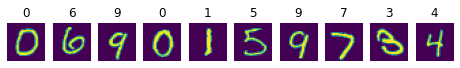

In [171]:
epoch = 15
learning_rate = 0.003
adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
res = tf_session(adam_optimizer)

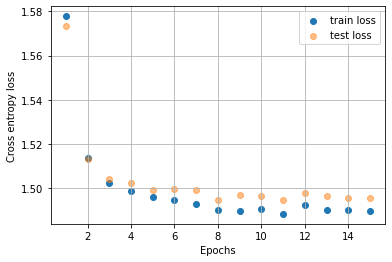

In [172]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), res[0], label = "train loss")
plt.scatter(range(1, epoch+1), res[1], label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")

Batch number: 0 and train cost: 2.3471109867095947
Batch number: 1 and train cost: 2.313399314880371
Batch number: 2 and train cost: 2.305680990219116
Batch number: 3 and train cost: 2.3401715755462646
Batch number: 4 and train cost: 2.2694091796875
Batch number: 5 and train cost: 2.2622463703155518
Batch number: 6 and train cost: 2.2879369258880615
Batch number: 7 and train cost: 2.204561710357666
Batch number: 8 and train cost: 2.1070775985717773
Batch number: 9 and train cost: 2.148236036300659
Batch number: 10 and train cost: 2.150256872177124
Batch number: 11 and train cost: 2.08738374710083
Batch number: 12 and train cost: 2.0408618450164795
Batch number: 13 and train cost: 2.0886764526367188
Batch number: 14 and train cost: 2.040318489074707
Batch number: 15 and train cost: 1.969539761543274
Batch number: 16 and train cost: 1.9611587524414062
Batch number: 17 and train cost: 1.8678653240203857
Batch number: 18 and train cost: 1.9818402528762817
Batch number: 19 and train cost: 1

Batch number: 158 and train cost: 1.7836940288543701
Batch number: 159 and train cost: 1.744339942932129
Batch number: 160 and train cost: 1.7538260221481323
Batch number: 161 and train cost: 1.7219526767730713
Batch number: 162 and train cost: 1.7055060863494873
Batch number: 163 and train cost: 1.751009225845337
Batch number: 164 and train cost: 1.7024204730987549
Batch number: 165 and train cost: 1.7300447225570679
Batch number: 166 and train cost: 1.7406424283981323
Batch number: 167 and train cost: 1.6792089939117432
Batch number: 168 and train cost: 1.6923191547393799
Batch number: 169 and train cost: 1.7175467014312744
Batch number: 170 and train cost: 1.716758370399475
Batch number: 171 and train cost: 1.709539532661438
Batch number: 172 and train cost: 1.7300914525985718
Batch number: 173 and train cost: 1.7107189893722534
Batch number: 174 and train cost: 1.7370004653930664
Batch number: 175 and train cost: 1.7241684198379517
Batch number: 176 and train cost: 1.67368555068969

Batch number: 314 and train cost: 1.7215229272842407
Batch number: 315 and train cost: 1.7198797464370728
Batch number: 316 and train cost: 1.7012295722961426
Batch number: 317 and train cost: 1.7528088092803955
Batch number: 318 and train cost: 1.7088356018066406
Batch number: 319 and train cost: 1.7858445644378662
Batch number: 320 and train cost: 1.6869611740112305
Batch number: 321 and train cost: 1.7218457460403442
Batch number: 322 and train cost: 1.7835578918457031
Batch number: 323 and train cost: 1.735529899597168
Batch number: 324 and train cost: 1.638981580734253
Batch number: 325 and train cost: 1.7438883781433105
Batch number: 326 and train cost: 1.7938841581344604
Batch number: 327 and train cost: 1.6920342445373535
Batch number: 328 and train cost: 1.7029505968093872
Batch number: 329 and train cost: 1.671470284461975
Batch number: 330 and train cost: 1.6503878831863403
Batch number: 331 and train cost: 1.6434253454208374
Batch number: 332 and train cost: 1.7083058357238

Batch number: 470 and train cost: 1.6683571338653564
Batch number: 471 and train cost: 1.726023554801941
Batch number: 472 and train cost: 1.7335797548294067
Batch number: 473 and train cost: 1.7127292156219482
Batch number: 474 and train cost: 1.7482653856277466
Batch number: 475 and train cost: 1.7025455236434937
Batch number: 476 and train cost: 1.6835969686508179
Batch number: 477 and train cost: 1.6436210870742798
Batch number: 478 and train cost: 1.700007438659668
Batch number: 479 and train cost: 1.7600430250167847
Batch number: 480 and train cost: 1.6840306520462036
Batch number: 481 and train cost: 1.6819244623184204
Batch number: 482 and train cost: 1.6865774393081665
Batch number: 483 and train cost: 1.718711256980896
Batch number: 484 and train cost: 1.630875587463379
Batch number: 485 and train cost: 1.6464365720748901
Batch number: 486 and train cost: 1.6912883520126343
Batch number: 487 and train cost: 1.6396251916885376
Batch number: 488 and train cost: 1.71504199504852

Batch number: 30 and train cost: 1.6112309694290161
Batch number: 31 and train cost: 1.5898735523223877
Batch number: 32 and train cost: 1.6409417390823364
Batch number: 33 and train cost: 1.6424287557601929
Batch number: 34 and train cost: 1.5727286338806152
Batch number: 35 and train cost: 1.6301891803741455
Batch number: 36 and train cost: 1.6615891456604004
Batch number: 37 and train cost: 1.5316338539123535
Batch number: 38 and train cost: 1.6022883653640747
Batch number: 39 and train cost: 1.615462064743042
Batch number: 40 and train cost: 1.6327284574508667
Batch number: 41 and train cost: 1.6908763647079468
Batch number: 42 and train cost: 1.5440430641174316
Batch number: 43 and train cost: 1.5922036170959473
Batch number: 44 and train cost: 1.6244666576385498
Batch number: 45 and train cost: 1.5508047342300415
Batch number: 46 and train cost: 1.6308741569519043
Batch number: 47 and train cost: 1.6052252054214478
Batch number: 48 and train cost: 1.6324758529663086
Batch number:

Batch number: 190 and train cost: 1.537471055984497
Batch number: 191 and train cost: 1.5283751487731934
Batch number: 192 and train cost: 1.5661273002624512
Batch number: 193 and train cost: 1.561961054801941
Batch number: 194 and train cost: 1.5133028030395508
Batch number: 195 and train cost: 1.5434669256210327
Batch number: 196 and train cost: 1.5445672273635864
Batch number: 197 and train cost: 1.5172839164733887
Batch number: 198 and train cost: 1.5415383577346802
Batch number: 199 and train cost: 1.564667820930481
Batch number: 200 and train cost: 1.5818895101547241
Batch number: 201 and train cost: 1.555974006652832
Batch number: 202 and train cost: 1.5939440727233887
Batch number: 203 and train cost: 1.5149949789047241
Batch number: 204 and train cost: 1.5219542980194092
Batch number: 205 and train cost: 1.5345849990844727
Batch number: 206 and train cost: 1.603255033493042
Batch number: 207 and train cost: 1.5767179727554321
Batch number: 208 and train cost: 1.595660090446472

Batch number: 346 and train cost: 1.5308395624160767
Batch number: 347 and train cost: 1.5659074783325195
Batch number: 348 and train cost: 1.584929347038269
Batch number: 349 and train cost: 1.559963345527649
Batch number: 350 and train cost: 1.5046517848968506
Batch number: 351 and train cost: 1.547389268875122
Batch number: 352 and train cost: 1.509313702583313
Batch number: 353 and train cost: 1.502779483795166
Batch number: 354 and train cost: 1.5772074460983276
Batch number: 355 and train cost: 1.500785231590271
Batch number: 356 and train cost: 1.558954119682312
Batch number: 357 and train cost: 1.4832264184951782
Batch number: 358 and train cost: 1.5286927223205566
Batch number: 359 and train cost: 1.5680630207061768
Batch number: 360 and train cost: 1.5937014818191528
Batch number: 361 and train cost: 1.5398573875427246
Batch number: 362 and train cost: 1.5111535787582397
Batch number: 363 and train cost: 1.5068720579147339
Batch number: 364 and train cost: 1.5705336332321167


Batch number: 502 and train cost: 1.5690900087356567
Batch number: 503 and train cost: 1.6154016256332397
Batch number: 504 and train cost: 1.5436042547225952
Batch number: 505 and train cost: 1.5323266983032227
Batch number: 506 and train cost: 1.520437479019165
Batch number: 507 and train cost: 1.535447359085083
Batch number: 508 and train cost: 1.511869192123413
Batch number: 509 and train cost: 1.5006335973739624
Batch number: 510 and train cost: 1.4840576648712158
Batch number: 511 and train cost: 1.5194802284240723
Batch number: 512 and train cost: 1.5514881610870361
Batch number: 513 and train cost: 1.5102148056030273
Batch number: 514 and train cost: 1.5112380981445312
Batch number: 515 and train cost: 1.5271142721176147
Batch number: 516 and train cost: 1.5375558137893677
Batch number: 517 and train cost: 1.5131275653839111
Batch number: 518 and train cost: 1.5442819595336914
Batch number: 519 and train cost: 1.5691903829574585
Batch number: 520 and train cost: 1.5459135770797

Batch number: 62 and train cost: 1.5161352157592773
Batch number: 63 and train cost: 1.4825668334960938
Batch number: 64 and train cost: 1.5211501121520996
Batch number: 65 and train cost: 1.4950366020202637
Batch number: 66 and train cost: 1.5022293329238892
Batch number: 67 and train cost: 1.5188137292861938
Batch number: 68 and train cost: 1.563370704650879
Batch number: 69 and train cost: 1.5923957824707031
Batch number: 70 and train cost: 1.5221078395843506
Batch number: 71 and train cost: 1.5503840446472168
Batch number: 72 and train cost: 1.5674835443496704
Batch number: 73 and train cost: 1.54252290725708
Batch number: 74 and train cost: 1.513298749923706
Batch number: 75 and train cost: 1.5478898286819458
Batch number: 76 and train cost: 1.5317909717559814
Batch number: 77 and train cost: 1.5683916807174683
Batch number: 78 and train cost: 1.5610226392745972
Batch number: 79 and train cost: 1.499273657798767
Batch number: 80 and train cost: 1.5108273029327393
Batch number: 81 

Batch number: 222 and train cost: 1.5477715730667114
Batch number: 223 and train cost: 1.496157169342041
Batch number: 224 and train cost: 1.5435127019882202
Batch number: 225 and train cost: 1.5750373601913452
Batch number: 226 and train cost: 1.522087812423706
Batch number: 227 and train cost: 1.522058367729187
Batch number: 228 and train cost: 1.5168981552124023
Batch number: 229 and train cost: 1.471333622932434
Batch number: 230 and train cost: 1.5217055082321167
Batch number: 231 and train cost: 1.5113894939422607
Batch number: 232 and train cost: 1.5101726055145264
Batch number: 233 and train cost: 1.5284183025360107
Batch number: 234 and train cost: 1.5213617086410522
Batch number: 235 and train cost: 1.5203105211257935
Batch number: 236 and train cost: 1.5339000225067139
Batch number: 237 and train cost: 1.5010586977005005
Batch number: 238 and train cost: 1.5203038454055786
Batch number: 239 and train cost: 1.5311496257781982
Batch number: 240 and train cost: 1.50150191783905

Batch number: 378 and train cost: 1.5768793821334839
Batch number: 379 and train cost: 1.5440101623535156
Batch number: 380 and train cost: 1.5013208389282227
Batch number: 381 and train cost: 1.5098956823349
Batch number: 382 and train cost: 1.4877145290374756
Batch number: 383 and train cost: 1.5701414346694946
Batch number: 384 and train cost: 1.5009524822235107
Batch number: 385 and train cost: 1.5713081359863281
Batch number: 386 and train cost: 1.5697687864303589
Batch number: 387 and train cost: 1.5409295558929443
Batch number: 388 and train cost: 1.491542935371399
Batch number: 389 and train cost: 1.5241693258285522
Batch number: 390 and train cost: 1.5107191801071167
Batch number: 391 and train cost: 1.510972261428833
Batch number: 392 and train cost: 1.5777685642242432
Batch number: 393 and train cost: 1.6104965209960938
Batch number: 394 and train cost: 1.5736395120620728
Batch number: 395 and train cost: 1.5087153911590576
Batch number: 396 and train cost: 1.523176312446594

Batch number: 534 and train cost: 1.4908145666122437
Batch number: 535 and train cost: 1.5413552522659302
Batch number: 536 and train cost: 1.541153907775879
Batch number: 537 and train cost: 1.5059744119644165
Batch number: 538 and train cost: 1.5211181640625
Batch number: 539 and train cost: 1.536166787147522
Batch number: 540 and train cost: 1.551928997039795
Batch number: 541 and train cost: 1.5294768810272217
Batch number: 542 and train cost: 1.5085645914077759
Batch number: 543 and train cost: 1.4794611930847168
Batch number: 544 and train cost: 1.4994999170303345
Batch number: 545 and train cost: 1.535580039024353
Batch number: 546 and train cost: 1.5070260763168335
Batch number: 547 and train cost: 1.5220011472702026
Batch number: 548 and train cost: 1.5489245653152466
Batch number: 549 and train cost: 1.5877280235290527
Batch number: 550 and train cost: 1.534407377243042
Batch number: 551 and train cost: 1.5111502408981323
Batch number: 552 and train cost: 1.4910216331481934
B

Batch number: 94 and train cost: 1.5518749952316284
Batch number: 95 and train cost: 1.5294629335403442
Batch number: 96 and train cost: 1.481198787689209
Batch number: 97 and train cost: 1.511122465133667
Batch number: 98 and train cost: 1.4911504983901978
Batch number: 99 and train cost: 1.5001575946807861
Batch number: 100 and train cost: 1.5145578384399414
Batch number: 101 and train cost: 1.5269509553909302
Batch number: 102 and train cost: 1.606602430343628
Batch number: 103 and train cost: 1.5244531631469727
Batch number: 104 and train cost: 1.5078024864196777
Batch number: 105 and train cost: 1.5060741901397705
Batch number: 106 and train cost: 1.4925564527511597
Batch number: 107 and train cost: 1.560663104057312
Batch number: 108 and train cost: 1.471168875694275
Batch number: 109 and train cost: 1.5216504335403442
Batch number: 110 and train cost: 1.5011602640151978
Batch number: 111 and train cost: 1.4809094667434692
Batch number: 112 and train cost: 1.5408035516738892
Batc

Batch number: 250 and train cost: 1.4901961088180542
Batch number: 251 and train cost: 1.495334506034851
Batch number: 252 and train cost: 1.5148669481277466
Batch number: 253 and train cost: 1.5114392042160034
Batch number: 254 and train cost: 1.4811501502990723
Batch number: 255 and train cost: 1.514967918395996
Batch number: 256 and train cost: 1.5171548128128052
Batch number: 257 and train cost: 1.4911500215530396
Batch number: 258 and train cost: 1.5038870573043823
Batch number: 259 and train cost: 1.541490912437439
Batch number: 260 and train cost: 1.5115317106246948
Batch number: 261 and train cost: 1.4882066249847412
Batch number: 262 and train cost: 1.5011781454086304
Batch number: 263 and train cost: 1.521138310432434
Batch number: 264 and train cost: 1.5846656560897827
Batch number: 265 and train cost: 1.5565141439437866
Batch number: 266 and train cost: 1.5211632251739502
Batch number: 267 and train cost: 1.502353549003601
Batch number: 268 and train cost: 1.510155081748962

Batch number: 406 and train cost: 1.530982494354248
Batch number: 407 and train cost: 1.5425689220428467
Batch number: 408 and train cost: 1.5296818017959595
Batch number: 409 and train cost: 1.4913064241409302
Batch number: 410 and train cost: 1.5703924894332886
Batch number: 411 and train cost: 1.501196026802063
Batch number: 412 and train cost: 1.531224012374878
Batch number: 413 and train cost: 1.5568058490753174
Batch number: 414 and train cost: 1.5011961460113525
Batch number: 415 and train cost: 1.5210984945297241
Batch number: 416 and train cost: 1.5210239887237549
Batch number: 417 and train cost: 1.5114388465881348
Batch number: 418 and train cost: 1.5211390256881714
Batch number: 419 and train cost: 1.5611414909362793
Batch number: 420 and train cost: 1.5305633544921875
Batch number: 421 and train cost: 1.6166672706604004
Batch number: 422 and train cost: 1.5209542512893677
Batch number: 423 and train cost: 1.5311170816421509
Batch number: 424 and train cost: 1.5406277179718

Batch number: 562 and train cost: 1.511494755744934
Batch number: 563 and train cost: 1.533565640449524
Batch number: 564 and train cost: 1.522868037223816
Batch number: 565 and train cost: 1.5111515522003174
Batch number: 566 and train cost: 1.5317409038543701
Batch number: 567 and train cost: 1.49114990234375
Batch number: 568 and train cost: 1.561167597770691
Batch number: 569 and train cost: 1.5137814283370972
Batch number: 570 and train cost: 1.5211989879608154
Batch number: 571 and train cost: 1.5009230375289917
Batch number: 572 and train cost: 1.5575259923934937
Batch number: 573 and train cost: 1.5502443313598633
Batch number: 574 and train cost: 1.5342196226119995
Batch number: 575 and train cost: 1.516143798828125
Batch number: 576 and train cost: 1.5329476594924927
Batch number: 577 and train cost: 1.528222918510437
Batch number: 578 and train cost: 1.475418210029602
Batch number: 579 and train cost: 1.472636103630066
Batch number: 580 and train cost: 1.5119750499725342
Bat

Batch number: 122 and train cost: 1.4902704954147339
Batch number: 123 and train cost: 1.5538558959960938
Batch number: 124 and train cost: 1.5124714374542236
Batch number: 125 and train cost: 1.5282131433486938
Batch number: 126 and train cost: 1.559443712234497
Batch number: 127 and train cost: 1.5211305618286133
Batch number: 128 and train cost: 1.540976881980896
Batch number: 129 and train cost: 1.5232025384902954
Batch number: 130 and train cost: 1.5673725605010986
Batch number: 131 and train cost: 1.5480233430862427
Batch number: 132 and train cost: 1.5080868005752563
Batch number: 133 and train cost: 1.5166796445846558
Batch number: 134 and train cost: 1.515104055404663
Batch number: 135 and train cost: 1.5302413702011108
Batch number: 136 and train cost: 1.5012260675430298
Batch number: 137 and train cost: 1.5713424682617188
Batch number: 138 and train cost: 1.515995979309082
Batch number: 139 and train cost: 1.5308794975280762
Batch number: 140 and train cost: 1.50252139568328

Batch number: 278 and train cost: 1.511134386062622
Batch number: 279 and train cost: 1.5219700336456299
Batch number: 280 and train cost: 1.4811501502990723
Batch number: 281 and train cost: 1.558262825012207
Batch number: 282 and train cost: 1.4938970804214478
Batch number: 283 and train cost: 1.5411509275436401
Batch number: 284 and train cost: 1.5034810304641724
Batch number: 285 and train cost: 1.5507769584655762
Batch number: 286 and train cost: 1.5153428316116333
Batch number: 287 and train cost: 1.5212100744247437
Batch number: 288 and train cost: 1.4948322772979736
Batch number: 289 and train cost: 1.5312153100967407
Batch number: 290 and train cost: 1.5511398315429688
Batch number: 291 and train cost: 1.5547692775726318
Batch number: 292 and train cost: 1.536022663116455
Batch number: 293 and train cost: 1.5611333847045898
Batch number: 294 and train cost: 1.511006474494934
Batch number: 295 and train cost: 1.5498977899551392
Batch number: 296 and train cost: 1.53042602539062

Batch number: 434 and train cost: 1.511378526687622
Batch number: 435 and train cost: 1.501143217086792
Batch number: 436 and train cost: 1.5110336542129517
Batch number: 437 and train cost: 1.4911502599716187
Batch number: 438 and train cost: 1.5111497640609741
Batch number: 439 and train cost: 1.5111489295959473
Batch number: 440 and train cost: 1.4891483783721924
Batch number: 441 and train cost: 1.5704641342163086
Batch number: 442 and train cost: 1.4986882209777832
Batch number: 443 and train cost: 1.5111156702041626
Batch number: 444 and train cost: 1.5130540132522583
Batch number: 445 and train cost: 1.501144289970398
Batch number: 446 and train cost: 1.5223513841629028
Batch number: 447 and train cost: 1.540438175201416
Batch number: 448 and train cost: 1.5613363981246948
Batch number: 449 and train cost: 1.5111678838729858
Batch number: 450 and train cost: 1.5511380434036255
Batch number: 451 and train cost: 1.5011502504348755
Batch number: 452 and train cost: 1.52110898494720

Batch number: 593 and train cost: 1.5621860027313232
Batch number: 594 and train cost: 1.4937453269958496
Batch number: 595 and train cost: 1.4811501502990723
Batch number: 596 and train cost: 1.4711503982543945
Batch number: 597 and train cost: 1.561413288116455
Batch number: 598 and train cost: 1.4612336158752441
Batch number: 599 and train cost: 1.5008821487426758
Batch number: 0 and train cost: 1.501145601272583
Batch number: 1 and train cost: 1.5551849603652954
Batch number: 2 and train cost: 1.529577374458313
Batch number: 3 and train cost: 1.4813345670700073
Batch number: 4 and train cost: 1.4997309446334839
Batch number: 5 and train cost: 1.514573097229004
Batch number: 6 and train cost: 1.5011526346206665
Batch number: 7 and train cost: 1.5278840065002441
Batch number: 8 and train cost: 1.561142921447754
Batch number: 9 and train cost: 1.5211502313613892
Batch number: 10 and train cost: 1.5461050271987915
Batch number: 11 and train cost: 1.534174919128418
Batch number: 12 and 

Batch number: 153 and train cost: 1.5014442205429077
Batch number: 154 and train cost: 1.527726173400879
Batch number: 155 and train cost: 1.5011504888534546
Batch number: 156 and train cost: 1.5207757949829102
Batch number: 157 and train cost: 1.532220482826233
Batch number: 158 and train cost: 1.540928602218628
Batch number: 159 and train cost: 1.5584886074066162
Batch number: 160 and train cost: 1.499233603477478
Batch number: 161 and train cost: 1.520583152770996
Batch number: 162 and train cost: 1.4913341999053955
Batch number: 163 and train cost: 1.5179177522659302
Batch number: 164 and train cost: 1.5111340284347534
Batch number: 165 and train cost: 1.568983554840088
Batch number: 166 and train cost: 1.5425506830215454
Batch number: 167 and train cost: 1.5611529350280762
Batch number: 168 and train cost: 1.5427017211914062
Batch number: 169 and train cost: 1.5470470190048218
Batch number: 170 and train cost: 1.5311263799667358
Batch number: 171 and train cost: 1.5409337282180786

Batch number: 309 and train cost: 1.4934909343719482
Batch number: 310 and train cost: 1.4611555337905884
Batch number: 311 and train cost: 1.5286962985992432
Batch number: 312 and train cost: 1.5011816024780273
Batch number: 313 and train cost: 1.6020689010620117
Batch number: 314 and train cost: 1.532102346420288
Batch number: 315 and train cost: 1.5211502313613892
Batch number: 316 and train cost: 1.5611484050750732
Batch number: 317 and train cost: 1.5012085437774658
Batch number: 318 and train cost: 1.5200674533843994
Batch number: 319 and train cost: 1.485063910484314
Batch number: 320 and train cost: 1.5211501121520996
Batch number: 321 and train cost: 1.4911526441574097
Batch number: 322 and train cost: 1.5211507081985474
Batch number: 323 and train cost: 1.5006366968154907
Batch number: 324 and train cost: 1.5749801397323608
Batch number: 325 and train cost: 1.50007963180542
Batch number: 326 and train cost: 1.4911502599716187
Batch number: 327 and train cost: 1.49110126495361

Batch number: 465 and train cost: 1.5000388622283936
Batch number: 466 and train cost: 1.501133918762207
Batch number: 467 and train cost: 1.5319689512252808
Batch number: 468 and train cost: 1.5238373279571533
Batch number: 469 and train cost: 1.4911502599716187
Batch number: 470 and train cost: 1.5220651626586914
Batch number: 471 and train cost: 1.49114191532135
Batch number: 472 and train cost: 1.6078345775604248
Batch number: 473 and train cost: 1.5311893224716187
Batch number: 474 and train cost: 1.5899757146835327
Batch number: 475 and train cost: 1.5311172008514404
Batch number: 476 and train cost: 1.5587619543075562
Batch number: 477 and train cost: 1.5511502027511597
Batch number: 478 and train cost: 1.5011404752731323
Batch number: 479 and train cost: 1.5411871671676636
Batch number: 480 and train cost: 1.481865644454956
Batch number: 481 and train cost: 1.4911493062973022
Batch number: 482 and train cost: 1.5211395025253296
Batch number: 483 and train cost: 1.55115020275115

Batch number: 21 and train cost: 1.4711501598358154
Batch number: 22 and train cost: 1.4911729097366333
Batch number: 23 and train cost: 1.4711538553237915
Batch number: 24 and train cost: 1.510990023612976
Batch number: 25 and train cost: 1.4889808893203735
Batch number: 26 and train cost: 1.5211247205734253
Batch number: 27 and train cost: 1.5235286951065063
Batch number: 28 and train cost: 1.5170098543167114
Batch number: 29 and train cost: 1.520939588546753
Batch number: 30 and train cost: 1.531033992767334
Batch number: 31 and train cost: 1.4611501693725586
Batch number: 32 and train cost: 1.5011428594589233
Batch number: 33 and train cost: 1.488095998764038
Batch number: 34 and train cost: 1.4811508655548096
Batch number: 35 and train cost: 1.5112968683242798
Batch number: 36 and train cost: 1.5307852029800415
Batch number: 37 and train cost: 1.5348446369171143
Batch number: 38 and train cost: 1.4711501598358154
Batch number: 39 and train cost: 1.4908984899520874
Batch number: 40

Batch number: 181 and train cost: 1.5011569261550903
Batch number: 182 and train cost: 1.4909967184066772
Batch number: 183 and train cost: 1.4911243915557861
Batch number: 184 and train cost: 1.542435884475708
Batch number: 185 and train cost: 1.5306695699691772
Batch number: 186 and train cost: 1.4911502599716187
Batch number: 187 and train cost: 1.501150369644165
Batch number: 188 and train cost: 1.4710872173309326
Batch number: 189 and train cost: 1.4711501598358154
Batch number: 190 and train cost: 1.508895993232727
Batch number: 191 and train cost: 1.5411502122879028
Batch number: 192 and train cost: 1.5208271741867065
Batch number: 193 and train cost: 1.501278281211853
Batch number: 194 and train cost: 1.4911342859268188
Batch number: 195 and train cost: 1.5291051864624023
Batch number: 196 and train cost: 1.5010441541671753
Batch number: 197 and train cost: 1.5083518028259277
Batch number: 198 and train cost: 1.541151523590088
Batch number: 199 and train cost: 1.570977449417114

Batch number: 337 and train cost: 1.4952845573425293
Batch number: 338 and train cost: 1.4801684617996216
Batch number: 339 and train cost: 1.4711501598358154
Batch number: 340 and train cost: 1.511146903038025
Batch number: 341 and train cost: 1.4910565614700317
Batch number: 342 and train cost: 1.5011320114135742
Batch number: 343 and train cost: 1.5111085176467896
Batch number: 344 and train cost: 1.531150221824646
Batch number: 345 and train cost: 1.5611480474472046
Batch number: 346 and train cost: 1.5311528444290161
Batch number: 347 and train cost: 1.5396478176116943
Batch number: 348 and train cost: 1.571170687675476
Batch number: 349 and train cost: 1.5111989974975586
Batch number: 350 and train cost: 1.5111474990844727
Batch number: 351 and train cost: 1.5551508665084839
Batch number: 352 and train cost: 1.4972326755523682
Batch number: 353 and train cost: 1.5011504888534546
Batch number: 354 and train cost: 1.5811505317687988
Batch number: 355 and train cost: 1.4910377264022

Batch number: 493 and train cost: 1.4956088066101074
Batch number: 494 and train cost: 1.552329659461975
Batch number: 495 and train cost: 1.5989598035812378
Batch number: 496 and train cost: 1.5325473546981812
Batch number: 497 and train cost: 1.4911502599716187
Batch number: 498 and train cost: 1.5317108631134033
Batch number: 499 and train cost: 1.551145076751709
Batch number: 500 and train cost: 1.4911508560180664
Batch number: 501 and train cost: 1.5016361474990845
Batch number: 502 and train cost: 1.5311247110366821
Batch number: 503 and train cost: 1.5601451396942139
Batch number: 504 and train cost: 1.5606238842010498
Batch number: 505 and train cost: 1.5210342407226562
Batch number: 506 and train cost: 1.4911502599716187
Batch number: 507 and train cost: 1.491015911102295
Batch number: 508 and train cost: 1.4912925958633423
Batch number: 509 and train cost: 1.485325813293457
Batch number: 510 and train cost: 1.4699654579162598
Batch number: 511 and train cost: 1.51121103763580

Batch number: 53 and train cost: 1.5203825235366821
Batch number: 54 and train cost: 1.4911502599716187
Batch number: 55 and train cost: 1.505357027053833
Batch number: 56 and train cost: 1.550809383392334
Batch number: 57 and train cost: 1.5614947080612183
Batch number: 58 and train cost: 1.5311508178710938
Batch number: 59 and train cost: 1.511621117591858
Batch number: 60 and train cost: 1.5092651844024658
Batch number: 61 and train cost: 1.5111513137817383
Batch number: 62 and train cost: 1.5600919723510742
Batch number: 63 and train cost: 1.4815783500671387
Batch number: 64 and train cost: 1.5012706518173218
Batch number: 65 and train cost: 1.4611566066741943
Batch number: 66 and train cost: 1.4889552593231201
Batch number: 67 and train cost: 1.4817732572555542
Batch number: 68 and train cost: 1.5510972738265991
Batch number: 69 and train cost: 1.513146162033081
Batch number: 70 and train cost: 1.5211372375488281
Batch number: 71 and train cost: 1.5127012729644775
Batch number: 72

Batch number: 213 and train cost: 1.531050682067871
Batch number: 214 and train cost: 1.4911258220672607
Batch number: 215 and train cost: 1.5199793577194214
Batch number: 216 and train cost: 1.4811501502990723
Batch number: 217 and train cost: 1.4839075803756714
Batch number: 218 and train cost: 1.4711501598358154
Batch number: 219 and train cost: 1.518123745918274
Batch number: 220 and train cost: 1.4960963726043701
Batch number: 221 and train cost: 1.5711532831192017
Batch number: 222 and train cost: 1.5111489295959473
Batch number: 223 and train cost: 1.4811501502990723
Batch number: 224 and train cost: 1.5011502504348755
Batch number: 225 and train cost: 1.5543800592422485
Batch number: 226 and train cost: 1.5212156772613525
Batch number: 227 and train cost: 1.5307039022445679
Batch number: 228 and train cost: 1.5311274528503418
Batch number: 229 and train cost: 1.4811501502990723
Batch number: 230 and train cost: 1.5604557991027832
Batch number: 231 and train cost: 1.511146545410

Batch number: 369 and train cost: 1.5012551546096802
Batch number: 370 and train cost: 1.5512090921401978
Batch number: 371 and train cost: 1.510921597480774
Batch number: 372 and train cost: 1.4811501502990723
Batch number: 373 and train cost: 1.5411503314971924
Batch number: 374 and train cost: 1.5511502027511597
Batch number: 375 and train cost: 1.541276216506958
Batch number: 376 and train cost: 1.491117238998413
Batch number: 377 and train cost: 1.5314096212387085
Batch number: 378 and train cost: 1.5211502313613892
Batch number: 379 and train cost: 1.4848932027816772
Batch number: 380 and train cost: 1.4810822010040283
Batch number: 381 and train cost: 1.4836926460266113
Batch number: 382 and train cost: 1.4676440954208374
Batch number: 383 and train cost: 1.53373122215271
Batch number: 384 and train cost: 1.4811501502990723
Batch number: 385 and train cost: 1.5311760902404785
Batch number: 386 and train cost: 1.5497931241989136
Batch number: 387 and train cost: 1.536623239517212

Batch number: 525 and train cost: 1.4811501502990723
Batch number: 526 and train cost: 1.5189144611358643
Batch number: 527 and train cost: 1.5171281099319458
Batch number: 528 and train cost: 1.5211519002914429
Batch number: 529 and train cost: 1.5611501932144165
Batch number: 530 and train cost: 1.4860461950302124
Batch number: 531 and train cost: 1.4911502599716187
Batch number: 532 and train cost: 1.481150507926941
Batch number: 533 and train cost: 1.4911502599716187
Batch number: 534 and train cost: 1.5011502504348755
Batch number: 535 and train cost: 1.5599421262741089
Batch number: 536 and train cost: 1.5711480379104614
Batch number: 537 and train cost: 1.521144151687622
Batch number: 538 and train cost: 1.5511623620986938
Batch number: 539 and train cost: 1.5411443710327148
Batch number: 540 and train cost: 1.5211502313613892
Batch number: 541 and train cost: 1.5329135656356812
Batch number: 542 and train cost: 1.5011502504348755
Batch number: 543 and train cost: 1.491153359413

Batch number: 85 and train cost: 1.5211291313171387
Batch number: 86 and train cost: 1.541446566581726
Batch number: 87 and train cost: 1.5739927291870117
Batch number: 88 and train cost: 1.57195246219635
Batch number: 89 and train cost: 1.531150221824646
Batch number: 90 and train cost: 1.482561469078064
Batch number: 91 and train cost: 1.5155119895935059
Batch number: 92 and train cost: 1.4911476373672485
Batch number: 93 and train cost: 1.5400766134262085
Batch number: 94 and train cost: 1.5811400413513184
Batch number: 95 and train cost: 1.5011502504348755
Batch number: 96 and train cost: 1.5244805812835693
Batch number: 97 and train cost: 1.5405267477035522
Batch number: 98 and train cost: 1.4711501598358154
Batch number: 99 and train cost: 1.5011498928070068
Batch number: 100 and train cost: 1.5064704418182373
Batch number: 101 and train cost: 1.5411373376846313
Batch number: 102 and train cost: 1.5571397542953491
Batch number: 103 and train cost: 1.5191491842269897
Batch number:

Batch number: 241 and train cost: 1.5011502504348755
Batch number: 242 and train cost: 1.5438746213912964
Batch number: 243 and train cost: 1.4812010526657104
Batch number: 244 and train cost: 1.4909456968307495
Batch number: 245 and train cost: 1.490808129310608
Batch number: 246 and train cost: 1.5411301851272583
Batch number: 247 and train cost: 1.5511585474014282
Batch number: 248 and train cost: 1.481040358543396
Batch number: 249 and train cost: 1.5007727146148682
Batch number: 250 and train cost: 1.4911495447158813
Batch number: 251 and train cost: 1.4811501502990723
Batch number: 252 and train cost: 1.5111502408981323
Batch number: 253 and train cost: 1.5011489391326904
Batch number: 254 and train cost: 1.5011502504348755
Batch number: 255 and train cost: 1.5111498832702637
Batch number: 256 and train cost: 1.4911502599716187
Batch number: 257 and train cost: 1.5009407997131348
Batch number: 258 and train cost: 1.5179989337921143
Batch number: 259 and train cost: 1.511155962944

Batch number: 397 and train cost: 1.5011385679244995
Batch number: 398 and train cost: 1.5111504793167114
Batch number: 399 and train cost: 1.5226681232452393
Batch number: 400 and train cost: 1.481870174407959
Batch number: 401 and train cost: 1.4711501598358154
Batch number: 402 and train cost: 1.5287644863128662
Batch number: 403 and train cost: 1.5111644268035889
Batch number: 404 and train cost: 1.481190800666809
Batch number: 405 and train cost: 1.4911502599716187
Batch number: 406 and train cost: 1.5287845134735107
Batch number: 407 and train cost: 1.4911502599716187
Batch number: 408 and train cost: 1.4911985397338867
Batch number: 409 and train cost: 1.5111496448516846
Batch number: 410 and train cost: 1.5311068296432495
Batch number: 411 and train cost: 1.483096718788147
Batch number: 412 and train cost: 1.5311180353164673
Batch number: 413 and train cost: 1.5211468935012817
Batch number: 414 and train cost: 1.522485375404358
Batch number: 415 and train cost: 1.51115345954895

Batch number: 553 and train cost: 1.5111507177352905
Batch number: 554 and train cost: 1.510981559753418
Batch number: 555 and train cost: 1.4911510944366455
Batch number: 556 and train cost: 1.4922246932983398
Batch number: 557 and train cost: 1.5112286806106567
Batch number: 558 and train cost: 1.5111502408981323
Batch number: 559 and train cost: 1.4916527271270752
Batch number: 560 and train cost: 1.4873745441436768
Batch number: 561 and train cost: 1.4911502599716187
Batch number: 562 and train cost: 1.5348615646362305
Batch number: 563 and train cost: 1.5999548435211182
Batch number: 564 and train cost: 1.5111526250839233
Batch number: 565 and train cost: 1.5011687278747559
Batch number: 566 and train cost: 1.5102102756500244
Batch number: 567 and train cost: 1.481150507926941
Batch number: 568 and train cost: 1.5305453538894653
Batch number: 569 and train cost: 1.481113076210022
Batch number: 570 and train cost: 1.5211502313613892
Batch number: 571 and train cost: 1.5006124973297

Batch number: 113 and train cost: 1.4811501502990723
Batch number: 114 and train cost: 1.5409399271011353
Batch number: 115 and train cost: 1.5311716794967651
Batch number: 116 and train cost: 1.5208195447921753
Batch number: 117 and train cost: 1.5611506700515747
Batch number: 118 and train cost: 1.5008965730667114
Batch number: 119 and train cost: 1.5011506080627441
Batch number: 120 and train cost: 1.5114343166351318
Batch number: 121 and train cost: 1.4811501502990723
Batch number: 122 and train cost: 1.57114839553833
Batch number: 123 and train cost: 1.5450341701507568
Batch number: 124 and train cost: 1.5011502504348755
Batch number: 125 and train cost: 1.5576153993606567
Batch number: 126 and train cost: 1.5411502122879028
Batch number: 127 and train cost: 1.52922785282135
Batch number: 128 and train cost: 1.541149616241455
Batch number: 129 and train cost: 1.5211502313613892
Batch number: 130 and train cost: 1.5611554384231567
Batch number: 131 and train cost: 1.551152467727661

Batch number: 269 and train cost: 1.491166353225708
Batch number: 270 and train cost: 1.5111502408981323
Batch number: 271 and train cost: 1.561112642288208
Batch number: 272 and train cost: 1.5211502313613892
Batch number: 273 and train cost: 1.5011553764343262
Batch number: 274 and train cost: 1.521149754524231
Batch number: 275 and train cost: 1.5107951164245605
Batch number: 276 and train cost: 1.5310519933700562
Batch number: 277 and train cost: 1.501150369644165
Batch number: 278 and train cost: 1.5011496543884277
Batch number: 279 and train cost: 1.5220839977264404
Batch number: 280 and train cost: 1.4811501502990723
Batch number: 281 and train cost: 1.5720731019973755
Batch number: 282 and train cost: 1.5008234977722168
Batch number: 283 and train cost: 1.5407503843307495
Batch number: 284 and train cost: 1.5311493873596191
Batch number: 285 and train cost: 1.51115083694458
Batch number: 286 and train cost: 1.5211290121078491
Batch number: 287 and train cost: 1.5111502408981323

Batch number: 425 and train cost: 1.5117007493972778
Batch number: 426 and train cost: 1.521812081336975
Batch number: 427 and train cost: 1.5111303329467773
Batch number: 428 and train cost: 1.5410914421081543
Batch number: 429 and train cost: 1.5681003332138062
Batch number: 430 and train cost: 1.5511502027511597
Batch number: 431 and train cost: 1.5111502408981323
Batch number: 432 and train cost: 1.5013412237167358
Batch number: 433 and train cost: 1.4911502599716187
Batch number: 434 and train cost: 1.4911502599716187
Batch number: 435 and train cost: 1.501395583152771
Batch number: 436 and train cost: 1.5111502408981323
Batch number: 437 and train cost: 1.4911502599716187
Batch number: 438 and train cost: 1.499711036682129
Batch number: 439 and train cost: 1.4917759895324707
Batch number: 440 and train cost: 1.488930344581604
Batch number: 441 and train cost: 1.5342570543289185
Batch number: 442 and train cost: 1.5208675861358643
Batch number: 443 and train cost: 1.50113987922668

Batch number: 581 and train cost: 1.4811501502990723
Batch number: 582 and train cost: 1.5011502504348755
Batch number: 583 and train cost: 1.491166591644287
Batch number: 584 and train cost: 1.531150221824646
Batch number: 585 and train cost: 1.5211528539657593
Batch number: 586 and train cost: 1.4908775091171265
Batch number: 587 and train cost: 1.4811471700668335
Batch number: 588 and train cost: 1.561149001121521
Batch number: 589 and train cost: 1.4611501693725586
Batch number: 590 and train cost: 1.4611501693725586
Batch number: 591 and train cost: 1.4711501598358154
Batch number: 592 and train cost: 1.4811501502990723
Batch number: 593 and train cost: 1.5711314678192139
Batch number: 594 and train cost: 1.5110411643981934
Batch number: 595 and train cost: 1.4611501693725586
Batch number: 596 and train cost: 1.5011502504348755
Batch number: 597 and train cost: 1.6029895544052124
Batch number: 598 and train cost: 1.4711313247680664
Batch number: 599 and train cost: 1.5197286605834

Batch number: 141 and train cost: 1.531150221824646
Batch number: 142 and train cost: 1.5507779121398926
Batch number: 143 and train cost: 1.5834071636199951
Batch number: 144 and train cost: 1.5183703899383545
Batch number: 145 and train cost: 1.4911733865737915
Batch number: 146 and train cost: 1.6113537549972534
Batch number: 147 and train cost: 1.6307172775268555
Batch number: 148 and train cost: 1.521079659461975
Batch number: 149 and train cost: 1.4911502599716187
Batch number: 150 and train cost: 1.4811501502990723
Batch number: 151 and train cost: 1.5128555297851562
Batch number: 152 and train cost: 1.5266648530960083
Batch number: 153 and train cost: 1.5111494064331055
Batch number: 154 and train cost: 1.4811501502990723
Batch number: 155 and train cost: 1.5062729120254517
Batch number: 156 and train cost: 1.5211502313613892
Batch number: 157 and train cost: 1.6332414150238037
Batch number: 158 and train cost: 1.551029086112976
Batch number: 159 and train cost: 1.5702177286148

Batch number: 297 and train cost: 1.5111727714538574
Batch number: 298 and train cost: 1.5411505699157715
Batch number: 299 and train cost: 1.5315825939178467
Batch number: 300 and train cost: 1.5111502408981323
Batch number: 301 and train cost: 1.5111496448516846
Batch number: 302 and train cost: 1.5011502504348755
Batch number: 303 and train cost: 1.5011502504348755
Batch number: 304 and train cost: 1.5111502408981323
Batch number: 305 and train cost: 1.4844986200332642
Batch number: 306 and train cost: 1.5306429862976074
Batch number: 307 and train cost: 1.4811501502990723
Batch number: 308 and train cost: 1.495734691619873
Batch number: 309 and train cost: 1.520654559135437
Batch number: 310 and train cost: 1.491041660308838
Batch number: 311 and train cost: 1.5324879884719849
Batch number: 312 and train cost: 1.5011554956436157
Batch number: 313 and train cost: 1.5538508892059326
Batch number: 314 and train cost: 1.521066427230835
Batch number: 315 and train cost: 1.53109669685363

Batch number: 453 and train cost: 1.4911502599716187
Batch number: 454 and train cost: 1.5211178064346313
Batch number: 455 and train cost: 1.5472460985183716
Batch number: 456 and train cost: 1.5311508178710938
Batch number: 457 and train cost: 1.5011911392211914
Batch number: 458 and train cost: 1.5054688453674316
Batch number: 459 and train cost: 1.5411502122879028
Batch number: 460 and train cost: 1.556092381477356
Batch number: 461 and train cost: 1.5011502504348755
Batch number: 462 and train cost: 1.5411502122879028
Batch number: 463 and train cost: 1.5513100624084473
Batch number: 464 and train cost: 1.5519474744796753
Batch number: 465 and train cost: 1.4611501693725586
Batch number: 466 and train cost: 1.5111267566680908
Batch number: 467 and train cost: 1.5336934328079224
Batch number: 468 and train cost: 1.5116162300109863
Batch number: 469 and train cost: 1.4911500215530396
Batch number: 470 and train cost: 1.5111502408981323
Batch number: 471 and train cost: 1.52126252651

Batch number: 9 and train cost: 1.5611501932144165
Batch number: 10 and train cost: 1.5975221395492554
Batch number: 11 and train cost: 1.5511502027511597
Batch number: 12 and train cost: 1.5611506700515747
Batch number: 13 and train cost: 1.5111541748046875
Batch number: 14 and train cost: 1.4907820224761963
Batch number: 15 and train cost: 1.5272417068481445
Batch number: 16 and train cost: 1.4911502599716187
Batch number: 17 and train cost: 1.4911502599716187
Batch number: 18 and train cost: 1.5211917161941528
Batch number: 19 and train cost: 1.5213547945022583
Batch number: 20 and train cost: 1.573002576828003
Batch number: 21 and train cost: 1.4711501598358154
Batch number: 22 and train cost: 1.4811503887176514
Batch number: 23 and train cost: 1.4716273546218872
Batch number: 24 and train cost: 1.5110883712768555
Batch number: 25 and train cost: 1.4715884923934937
Batch number: 26 and train cost: 1.5211443901062012
Batch number: 27 and train cost: 1.5011564493179321
Batch number: 

Batch number: 169 and train cost: 1.4909613132476807
Batch number: 170 and train cost: 1.5211888551712036
Batch number: 171 and train cost: 1.519553542137146
Batch number: 172 and train cost: 1.5111628770828247
Batch number: 173 and train cost: 1.4734493494033813
Batch number: 174 and train cost: 1.541021704673767
Batch number: 175 and train cost: 1.531150221824646
Batch number: 176 and train cost: 1.4960682392120361
Batch number: 177 and train cost: 1.5308499336242676
Batch number: 178 and train cost: 1.5511502027511597
Batch number: 179 and train cost: 1.4909478425979614
Batch number: 180 and train cost: 1.4982199668884277
Batch number: 181 and train cost: 1.5211330652236938
Batch number: 182 and train cost: 1.5011502504348755
Batch number: 183 and train cost: 1.531150221824646
Batch number: 184 and train cost: 1.5011502504348755
Batch number: 185 and train cost: 1.4913265705108643
Batch number: 186 and train cost: 1.4991024732589722
Batch number: 187 and train cost: 1.51115024089813

Batch number: 325 and train cost: 1.5110697746276855
Batch number: 326 and train cost: 1.5011502504348755
Batch number: 327 and train cost: 1.4911502599716187
Batch number: 328 and train cost: 1.4911502599716187
Batch number: 329 and train cost: 1.4811277389526367
Batch number: 330 and train cost: 1.5011502504348755
Batch number: 331 and train cost: 1.4911502599716187
Batch number: 332 and train cost: 1.4911502599716187
Batch number: 333 and train cost: 1.5346542596817017
Batch number: 334 and train cost: 1.5308904647827148
Batch number: 335 and train cost: 1.51079523563385
Batch number: 336 and train cost: 1.5011502504348755
Batch number: 337 and train cost: 1.5011502504348755
Batch number: 338 and train cost: 1.4911502599716187
Batch number: 339 and train cost: 1.4618878364562988
Batch number: 340 and train cost: 1.5311492681503296
Batch number: 341 and train cost: 1.4811501502990723
Batch number: 342 and train cost: 1.502152681350708
Batch number: 343 and train cost: 1.4720077514648

Batch number: 481 and train cost: 1.4924348592758179
Batch number: 482 and train cost: 1.511157512664795
Batch number: 483 and train cost: 1.5511547327041626
Batch number: 484 and train cost: 1.4811501502990723
Batch number: 485 and train cost: 1.5086712837219238
Batch number: 486 and train cost: 1.5011502504348755
Batch number: 487 and train cost: 1.4811501502990723
Batch number: 488 and train cost: 1.4911502599716187
Batch number: 489 and train cost: 1.551148533821106
Batch number: 490 and train cost: 1.5411502122879028
Batch number: 491 and train cost: 1.5011502504348755
Batch number: 492 and train cost: 1.5211502313613892
Batch number: 493 and train cost: 1.4811683893203735
Batch number: 494 and train cost: 1.5511502027511597
Batch number: 495 and train cost: 1.5511502027511597
Batch number: 496 and train cost: 1.5111502408981323
Batch number: 497 and train cost: 1.4911502599716187
Batch number: 498 and train cost: 1.5411502122879028
Batch number: 499 and train cost: 1.550785064697

Batch number: 37 and train cost: 1.5023393630981445
Batch number: 38 and train cost: 1.4911495447158813
Batch number: 39 and train cost: 1.5011485815048218
Batch number: 40 and train cost: 1.5111502408981323
Batch number: 41 and train cost: 1.521142601966858
Batch number: 42 and train cost: 1.5308719873428345
Batch number: 43 and train cost: 1.4611501693725586
Batch number: 44 and train cost: 1.5011502504348755
Batch number: 45 and train cost: 1.5210027694702148
Batch number: 46 and train cost: 1.5409539937973022
Batch number: 47 and train cost: 1.4711501598358154
Batch number: 48 and train cost: 1.4811501502990723
Batch number: 49 and train cost: 1.5194493532180786
Batch number: 50 and train cost: 1.5211632251739502
Batch number: 51 and train cost: 1.5411514043807983
Batch number: 52 and train cost: 1.4911502599716187
Batch number: 53 and train cost: 1.5113428831100464
Batch number: 54 and train cost: 1.4711501598358154
Batch number: 55 and train cost: 1.531150221824646
Batch number: 

Batch number: 197 and train cost: 1.5011471509933472
Batch number: 198 and train cost: 1.5611501932144165
Batch number: 199 and train cost: 1.5205895900726318
Batch number: 200 and train cost: 1.581144094467163
Batch number: 201 and train cost: 1.521144151687622
Batch number: 202 and train cost: 1.531150221824646
Batch number: 203 and train cost: 1.4811508655548096
Batch number: 204 and train cost: 1.5011504888534546
Batch number: 205 and train cost: 1.511083722114563
Batch number: 206 and train cost: 1.541204571723938
Batch number: 207 and train cost: 1.5508720874786377
Batch number: 208 and train cost: 1.5189993381500244
Batch number: 209 and train cost: 1.5711455345153809
Batch number: 210 and train cost: 1.5011502504348755
Batch number: 211 and train cost: 1.5011485815048218
Batch number: 212 and train cost: 1.4811501502990723
Batch number: 213 and train cost: 1.5311503410339355
Batch number: 214 and train cost: 1.4811501502990723
Batch number: 215 and train cost: 1.511150240898132

Batch number: 353 and train cost: 1.511136531829834
Batch number: 354 and train cost: 1.5411016941070557
Batch number: 355 and train cost: 1.4811501502990723
Batch number: 356 and train cost: 1.5211305618286133
Batch number: 357 and train cost: 1.5111502408981323
Batch number: 358 and train cost: 1.4811339378356934
Batch number: 359 and train cost: 1.5111502408981323
Batch number: 360 and train cost: 1.572606086730957
Batch number: 361 and train cost: 1.5611355304718018
Batch number: 362 and train cost: 1.5011502504348755
Batch number: 363 and train cost: 1.491175651550293
Batch number: 364 and train cost: 1.548766016960144
Batch number: 365 and train cost: 1.5410950183868408
Batch number: 366 and train cost: 1.4811501502990723
Batch number: 367 and train cost: 1.5211498737335205
Batch number: 368 and train cost: 1.5664465427398682
Batch number: 369 and train cost: 1.5124760866165161
Batch number: 370 and train cost: 1.5741199254989624
Batch number: 371 and train cost: 1.51344895362854

Batch number: 509 and train cost: 1.5011502504348755
Batch number: 510 and train cost: 1.4804558753967285
Batch number: 511 and train cost: 1.4811745882034302
Batch number: 512 and train cost: 1.5211502313613892
Batch number: 513 and train cost: 1.5211502313613892
Batch number: 514 and train cost: 1.5011467933654785
Batch number: 515 and train cost: 1.4811501502990723
Batch number: 516 and train cost: 1.5111502408981323
Batch number: 517 and train cost: 1.4811501502990723
Batch number: 518 and train cost: 1.4811694622039795
Batch number: 519 and train cost: 1.5132354497909546
Batch number: 520 and train cost: 1.521153450012207
Batch number: 521 and train cost: 1.531150460243225
Batch number: 522 and train cost: 1.491152048110962
Batch number: 523 and train cost: 1.511149287223816
Batch number: 524 and train cost: 1.4925603866577148
Batch number: 525 and train cost: 1.4711501598358154
Batch number: 526 and train cost: 1.5207841396331787
Batch number: 527 and train cost: 1.55115020275115

Batch number: 69 and train cost: 1.5211195945739746
Batch number: 70 and train cost: 1.531150221824646
Batch number: 71 and train cost: 1.5212575197219849
Batch number: 72 and train cost: 1.5111502408981323
Batch number: 73 and train cost: 1.5111411809921265
Batch number: 74 and train cost: 1.491121768951416
Batch number: 75 and train cost: 1.4811501502990723
Batch number: 76 and train cost: 1.5318576097488403
Batch number: 77 and train cost: 1.5511502027511597
Batch number: 78 and train cost: 1.5611501932144165
Batch number: 79 and train cost: 1.5211502313613892
Batch number: 80 and train cost: 1.5411502122879028
Batch number: 81 and train cost: 1.531150221824646
Batch number: 82 and train cost: 1.5711480379104614
Batch number: 83 and train cost: 1.4811501502990723
Batch number: 84 and train cost: 1.5609185695648193
Batch number: 85 and train cost: 1.4911390542984009
Batch number: 86 and train cost: 1.5211507081985474
Batch number: 87 and train cost: 1.6111277341842651
Batch number: 8

Batch number: 225 and train cost: 1.591150164604187
Batch number: 226 and train cost: 1.5431835651397705
Batch number: 227 and train cost: 1.5399318933486938
Batch number: 228 and train cost: 1.5011502504348755
Batch number: 229 and train cost: 1.4811501502990723
Batch number: 230 and train cost: 1.531150221824646
Batch number: 231 and train cost: 1.5211502313613892
Batch number: 232 and train cost: 1.5011521577835083
Batch number: 233 and train cost: 1.4911502599716187
Batch number: 234 and train cost: 1.5611505508422852
Batch number: 235 and train cost: 1.4911502599716187
Batch number: 236 and train cost: 1.5111502408981323
Batch number: 237 and train cost: 1.5211502313613892
Batch number: 238 and train cost: 1.5120211839675903
Batch number: 239 and train cost: 1.5111502408981323
Batch number: 240 and train cost: 1.5011541843414307
Batch number: 241 and train cost: 1.5011416673660278
Batch number: 242 and train cost: 1.5537693500518799
Batch number: 243 and train cost: 1.471149086952

Batch number: 381 and train cost: 1.5311511754989624
Batch number: 382 and train cost: 1.4908541440963745
Batch number: 383 and train cost: 1.6011533737182617
Batch number: 384 and train cost: 1.4911502599716187
Batch number: 385 and train cost: 1.5311473608016968
Batch number: 386 and train cost: 1.571223258972168
Batch number: 387 and train cost: 1.5111502408981323
Batch number: 388 and train cost: 1.4711501598358154
Batch number: 389 and train cost: 1.4911502599716187
Batch number: 390 and train cost: 1.4810433387756348
Batch number: 391 and train cost: 1.4811501502990723
Batch number: 392 and train cost: 1.5211502313613892
Batch number: 393 and train cost: 1.585118055343628
Batch number: 394 and train cost: 1.5911588668823242
Batch number: 395 and train cost: 1.5605145692825317
Batch number: 396 and train cost: 1.551151990890503
Batch number: 397 and train cost: 1.521147608757019
Batch number: 398 and train cost: 1.4911563396453857
Batch number: 399 and train cost: 1.48115050792694

Batch number: 537 and train cost: 1.5016860961914062
Batch number: 538 and train cost: 1.5811501741409302
Batch number: 539 and train cost: 1.5411502122879028
Batch number: 540 and train cost: 1.5611437559127808
Batch number: 541 and train cost: 1.5411502122879028
Batch number: 542 and train cost: 1.4911502599716187
Batch number: 543 and train cost: 1.5111502408981323
Batch number: 544 and train cost: 1.5111486911773682
Batch number: 545 and train cost: 1.531150221824646
Batch number: 546 and train cost: 1.5011502504348755
Batch number: 547 and train cost: 1.571195125579834
Batch number: 548 and train cost: 1.5411502122879028
Batch number: 549 and train cost: 1.609484076499939
Batch number: 550 and train cost: 1.5211502313613892
Batch number: 551 and train cost: 1.5111502408981323
Batch number: 552 and train cost: 1.5011593103408813
Batch number: 553 and train cost: 1.564317226409912
Batch number: 554 and train cost: 1.5511502027511597
Batch number: 555 and train cost: 1.52115082740783

Batch number: 97 and train cost: 1.511260986328125
Batch number: 98 and train cost: 1.549018383026123
Batch number: 99 and train cost: 1.540877342224121
Batch number: 100 and train cost: 1.5411502122879028
Batch number: 101 and train cost: 1.5211502313613892
Batch number: 102 and train cost: 1.6411371231079102
Batch number: 103 and train cost: 1.5411502122879028
Batch number: 104 and train cost: 1.5711464881896973
Batch number: 105 and train cost: 1.5411502122879028
Batch number: 106 and train cost: 1.521145224571228
Batch number: 107 and train cost: 1.5611505508422852
Batch number: 108 and train cost: 1.5311511754989624
Batch number: 109 and train cost: 1.5210084915161133
Batch number: 110 and train cost: 1.5311532020568848
Batch number: 111 and train cost: 1.511892557144165
Batch number: 112 and train cost: 1.5798020362854004
Batch number: 113 and train cost: 1.531150221824646
Batch number: 114 and train cost: 1.5011502504348755
Batch number: 115 and train cost: 1.5798660516738892
Ba

Batch number: 253 and train cost: 1.4811508655548096
Batch number: 254 and train cost: 1.4812569618225098
Batch number: 255 and train cost: 1.4911502599716187
Batch number: 256 and train cost: 1.5011723041534424
Batch number: 257 and train cost: 1.5011502504348755
Batch number: 258 and train cost: 1.5111502408981323
Batch number: 259 and train cost: 1.5111502408981323
Batch number: 260 and train cost: 1.4811501502990723
Batch number: 261 and train cost: 1.4977473020553589
Batch number: 262 and train cost: 1.501137375831604
Batch number: 263 and train cost: 1.5400185585021973
Batch number: 264 and train cost: 1.521150827407837
Batch number: 265 and train cost: 1.5411502122879028
Batch number: 266 and train cost: 1.531150221824646
Batch number: 267 and train cost: 1.534767508506775
Batch number: 268 and train cost: 1.571600079536438
Batch number: 269 and train cost: 1.4711501598358154
Batch number: 270 and train cost: 1.4997406005859375
Batch number: 271 and train cost: 1.561183214187622

Batch number: 409 and train cost: 1.488959789276123
Batch number: 410 and train cost: 1.5311497449874878
Batch number: 411 and train cost: 1.5108366012573242
Batch number: 412 and train cost: 1.5797832012176514
Batch number: 413 and train cost: 1.5611501932144165
Batch number: 414 and train cost: 1.5011502504348755
Batch number: 415 and train cost: 1.5111513137817383
Batch number: 416 and train cost: 1.4911502599716187
Batch number: 417 and train cost: 1.5510473251342773
Batch number: 418 and train cost: 1.5112814903259277
Batch number: 419 and train cost: 1.5311172008514404
Batch number: 420 and train cost: 1.4911502599716187
Batch number: 421 and train cost: 1.5508052110671997
Batch number: 422 and train cost: 1.481150507926941
Batch number: 423 and train cost: 1.531150221824646
Batch number: 424 and train cost: 1.5513436794281006
Batch number: 425 and train cost: 1.5211502313613892
Batch number: 426 and train cost: 1.51090669631958
Batch number: 427 and train cost: 1.521150231361389

Batch number: 565 and train cost: 1.4840986728668213
Batch number: 566 and train cost: 1.5211501121520996
Batch number: 567 and train cost: 1.4911503791809082
Batch number: 568 and train cost: 1.5511502027511597
Batch number: 569 and train cost: 1.5011502504348755
Batch number: 570 and train cost: 1.510878086090088
Batch number: 571 and train cost: 1.4811501502990723
Batch number: 572 and train cost: 1.5011526346206665
Batch number: 573 and train cost: 1.531134843826294
Batch number: 574 and train cost: 1.5111503601074219
Batch number: 575 and train cost: 1.530577540397644
Batch number: 576 and train cost: 1.5611501932144165
Batch number: 577 and train cost: 1.5411500930786133
Batch number: 578 and train cost: 1.5111502408981323
Batch number: 579 and train cost: 1.5011502504348755
Batch number: 580 and train cost: 1.5211502313613892
Batch number: 581 and train cost: 1.4811501502990723
Batch number: 582 and train cost: 1.5111502408981323
Batch number: 583 and train cost: 1.4811501502990

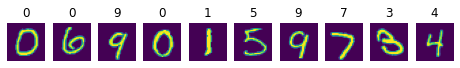

In [162]:
epoch = 15
learning_rate = 0.005
adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
res = tf_session(adam_optimizer)

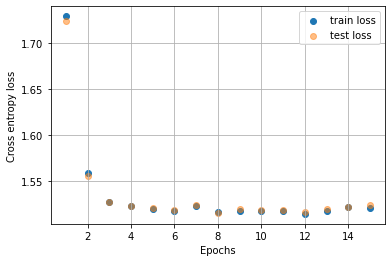

In [163]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), res[0], label = "train loss")
plt.scatter(range(1, epoch+1), res[1], label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")


- Accuracy from MLP model with ReLU activation and adam optimizer is 93%
- The model converges much faster than sigmoid activation. Converges at 5th epoch

In [173]:
#Adding parameters to results dataframe
results.loc[2] = ['relu', 'adam', res[5], res[0], res[1], res[2], res[3], res[4]]
results

,activation_unit,optimizer,accuracy,train_loss,test_loss,weight1,weight2,weight3
0,sigmoid,adam,0.9769,"[1.5495223, 1.4920709, 1.484456, 1.4813356, 1....","[1.5464011, 1.4929918, 1.4879929, 1.4855704, 1...","[[-0.036198013, -0.018920701, 0.031863127, 0.0...","[[0.4715942, 0.28923732, 0.58247966, 0.8406421...","[[0.7312606, -1.1931288, -1.4744773, -1.821540..."
1,sigmoid,gd,0.6089,"[2.3073978, 2.298492, 2.2952466, 2.292354, 2.2...","[2.307303, 2.298238, 2.2948694, 2.291895, 2.28...","[[0.08542105, -0.041108303, -0.033613473, 0.06...","[[0.0017425624, -0.0499915, 0.029592166, 0.031...","[[-0.26376188, 0.16400473, 0.17453934, 0.23161..."
2,relu,adam,0.9675,"[1.5777614, 1.5136802, 1.5023476, 1.4987221, 1...","[1.5732272, 1.5134172, 1.5043505, 1.5021714, 1...","[[-0.056623563, -0.06398073, -0.004845474, 0.0...","[[-0.293605, 0.074238025, -0.20860806, -0.2214...","[[0.69610524, -0.3046881, 0.063394174, 0.43150..."


### How to improve the model accuracy in MLP?
- We see from the loss vs epochs plot that the loss of train and test data is slightly fluctuating. We can try batch optimization to check if that improves the model performance

- We can also try drop out layer regularization - to reduce the gap between train and test error

In [202]:
## Weight initialization

weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=he_normal_distribution(n_input), mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=he_normal_distribution(hidden1), mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=he_normal_distribution(hidden2), mean=0))
epsilon = 1e-3

In [203]:
## MLP with ReLU activation, batch normalization and adam optimizer

def mlp_relu_bn(inpt, w1, w2, w3, b1, b2, b3, epsilon):
    '''Returns the multi layered perceptron output from input and initalized weights and biases'''
    
    ## Layer 1: 784 x 512
    ## Layer1 input addition
    layer_1 = tf.add(tf.matmul(inpt,w1),b1)
    
    ## batch normalization after hidden layer 1
    l1_mean,l1_variance = tf.nn.moments(layer_1, axes=[0])
    l1_offset = tf.Variable(tf.zeros(hidden1))
    l1_scale = tf.Variable(tf.ones(hidden1))
    layer_1_bn = tf.nn.batch_normalization(layer_1, l1_mean, l1_variance, l1_offset, l1_scale, epsilon)
    ## layer1 activation
    layer_1_relu = tf.nn.relu(layer_1_bn)
    print(layer_1_relu.get_shape(), w1.get_shape(), b1.get_shape())
    
    ## Layer 2: 512 x 264
    ## Layer2 input addition
    layer_2 = tf.add(tf.matmul(layer_1_relu,w2),b2)


    ## batch normalization after hidden layer 1
    l2_mean,l2_variance = tf.nn.moments(layer_2, axes=[0])
    l2_offset = tf.Variable(tf.zeros(hidden2))
    l2_scale = tf.Variable(tf.ones(hidden2))
    epsilon = 1e-3
    layer_2_bn = tf.nn.batch_normalization(layer_2, l2_mean, l2_variance, l2_offset, l2_scale, epsilon)
    ## layer2 activation
    layer_2_relu = tf.nn.relu(layer_2_bn)
    print(layer_2_relu.get_shape(), w2.get_shape(), b2.get_shape())
    
    ## Layer 3: 264 x 10
    layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_2_relu,w3),b3))
    print(layer_3.get_shape(), w3.get_shape(), b3.get_shape())
    
    return layer_3

In [204]:
# Prediction of numbers from images
yhat = mlp_relu_bn(x, weight1, weight2, weight3, bias1, bias2, bias3, epsilon)

# Loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat, labels = y))

(None, 512) (784, 512) (512,)
(None, 128) (512, 128) (128,)
(None, 10) (128, 10) (10,)


Batch number: 0 and train cost: 2.3081459999084473
Batch number: 1 and train cost: 2.087237596511841
Batch number: 2 and train cost: 1.995121717453003
Batch number: 3 and train cost: 1.9095866680145264
Batch number: 4 and train cost: 1.8783482313156128
Batch number: 5 and train cost: 1.8714488744735718
Batch number: 6 and train cost: 1.8147027492523193
Batch number: 7 and train cost: 1.8236316442489624
Batch number: 8 and train cost: 1.7563161849975586
Batch number: 9 and train cost: 1.7447983026504517
Batch number: 10 and train cost: 1.8060041666030884
Batch number: 11 and train cost: 1.7860655784606934
Batch number: 12 and train cost: 1.7553731203079224
Batch number: 13 and train cost: 1.7107585668563843
Batch number: 14 and train cost: 1.6625257730484009
Batch number: 15 and train cost: 1.688154697418213
Batch number: 16 and train cost: 1.680943489074707
Batch number: 17 and train cost: 1.6433738470077515
Batch number: 18 and train cost: 1.6399208307266235
Batch number: 19 and train

Batch number: 158 and train cost: 1.548468828201294
Batch number: 159 and train cost: 1.5614086389541626
Batch number: 160 and train cost: 1.5586094856262207
Batch number: 161 and train cost: 1.5288989543914795
Batch number: 162 and train cost: 1.4978023767471313
Batch number: 163 and train cost: 1.4949119091033936
Batch number: 164 and train cost: 1.523937702178955
Batch number: 165 and train cost: 1.5295422077178955
Batch number: 166 and train cost: 1.540002465248108
Batch number: 167 and train cost: 1.5421545505523682
Batch number: 168 and train cost: 1.5377217531204224
Batch number: 169 and train cost: 1.5391976833343506
Batch number: 170 and train cost: 1.546125054359436
Batch number: 171 and train cost: 1.5247753858566284
Batch number: 172 and train cost: 1.560198187828064
Batch number: 173 and train cost: 1.504948616027832
Batch number: 174 and train cost: 1.5561894178390503
Batch number: 175 and train cost: 1.5627940893173218
Batch number: 176 and train cost: 1.520290493965149


Batch number: 314 and train cost: 1.5084267854690552
Batch number: 315 and train cost: 1.5340125560760498
Batch number: 316 and train cost: 1.5744285583496094
Batch number: 317 and train cost: 1.5403990745544434
Batch number: 318 and train cost: 1.5263255834579468
Batch number: 319 and train cost: 1.5232725143432617
Batch number: 320 and train cost: 1.537825345993042
Batch number: 321 and train cost: 1.5550307035446167
Batch number: 322 and train cost: 1.5147536993026733
Batch number: 323 and train cost: 1.5579595565795898
Batch number: 324 and train cost: 1.5645374059677124
Batch number: 325 and train cost: 1.497130274772644
Batch number: 326 and train cost: 1.4976837635040283
Batch number: 327 and train cost: 1.5202412605285645
Batch number: 328 and train cost: 1.5424585342407227
Batch number: 329 and train cost: 1.4837536811828613
Batch number: 330 and train cost: 1.4988033771514893
Batch number: 331 and train cost: 1.5159465074539185
Batch number: 332 and train cost: 1.508205533027

Batch number: 470 and train cost: 1.5212897062301636
Batch number: 471 and train cost: 1.4926080703735352
Batch number: 472 and train cost: 1.5523566007614136
Batch number: 473 and train cost: 1.5214488506317139
Batch number: 474 and train cost: 1.5492907762527466
Batch number: 475 and train cost: 1.5228785276412964
Batch number: 476 and train cost: 1.5402553081512451
Batch number: 477 and train cost: 1.5172244310379028
Batch number: 478 and train cost: 1.5037286281585693
Batch number: 479 and train cost: 1.5494303703308105
Batch number: 480 and train cost: 1.5064113140106201
Batch number: 481 and train cost: 1.4952170848846436
Batch number: 482 and train cost: 1.5206319093704224
Batch number: 483 and train cost: 1.5235121250152588
Batch number: 484 and train cost: 1.496492862701416
Batch number: 485 and train cost: 1.5272220373153687
Batch number: 486 and train cost: 1.4946777820587158
Batch number: 487 and train cost: 1.498175859451294
Batch number: 488 and train cost: 1.486382007598

Batch number: 29 and train cost: 1.483823537826538
Batch number: 30 and train cost: 1.5217937231063843
Batch number: 31 and train cost: 1.4837336540222168
Batch number: 32 and train cost: 1.5117188692092896
Batch number: 33 and train cost: 1.4868301153182983
Batch number: 34 and train cost: 1.492124080657959
Batch number: 35 and train cost: 1.4770056009292603
Batch number: 36 and train cost: 1.5373245477676392
Batch number: 37 and train cost: 1.4995133876800537
Batch number: 38 and train cost: 1.4905911684036255
Batch number: 39 and train cost: 1.4752540588378906
Batch number: 40 and train cost: 1.5199795961380005
Batch number: 41 and train cost: 1.4798169136047363
Batch number: 42 and train cost: 1.4939444065093994
Batch number: 43 and train cost: 1.4946767091751099
Batch number: 44 and train cost: 1.475521445274353
Batch number: 45 and train cost: 1.4784667491912842
Batch number: 46 and train cost: 1.5039658546447754
Batch number: 47 and train cost: 1.4877110719680786
Batch number: 4

Batch number: 188 and train cost: 1.4964152574539185
Batch number: 189 and train cost: 1.4763466119766235
Batch number: 190 and train cost: 1.5051400661468506
Batch number: 191 and train cost: 1.4925258159637451
Batch number: 192 and train cost: 1.4957069158554077
Batch number: 193 and train cost: 1.4994964599609375
Batch number: 194 and train cost: 1.492544412612915
Batch number: 195 and train cost: 1.5186469554901123
Batch number: 196 and train cost: 1.4791337251663208
Batch number: 197 and train cost: 1.4778683185577393
Batch number: 198 and train cost: 1.5002508163452148
Batch number: 199 and train cost: 1.4851809740066528
Batch number: 200 and train cost: 1.5210843086242676
Batch number: 201 and train cost: 1.503205418586731
Batch number: 202 and train cost: 1.4888290166854858
Batch number: 203 and train cost: 1.489438772201538
Batch number: 204 and train cost: 1.4780851602554321
Batch number: 205 and train cost: 1.4993618726730347
Batch number: 206 and train cost: 1.4970225095748

Batch number: 344 and train cost: 1.4914954900741577
Batch number: 345 and train cost: 1.4896633625030518
Batch number: 346 and train cost: 1.5103135108947754
Batch number: 347 and train cost: 1.5212347507476807
Batch number: 348 and train cost: 1.5085864067077637
Batch number: 349 and train cost: 1.5020287036895752
Batch number: 350 and train cost: 1.5003443956375122
Batch number: 351 and train cost: 1.485501766204834
Batch number: 352 and train cost: 1.5076842308044434
Batch number: 353 and train cost: 1.4948033094406128
Batch number: 354 and train cost: 1.5232300758361816
Batch number: 355 and train cost: 1.4645642042160034
Batch number: 356 and train cost: 1.5061782598495483
Batch number: 357 and train cost: 1.4721217155456543
Batch number: 358 and train cost: 1.494311809539795
Batch number: 359 and train cost: 1.488777756690979
Batch number: 360 and train cost: 1.501022219657898
Batch number: 361 and train cost: 1.5008859634399414
Batch number: 362 and train cost: 1.51828181743621

Batch number: 500 and train cost: 1.481971263885498
Batch number: 501 and train cost: 1.4681458473205566
Batch number: 502 and train cost: 1.5029655694961548
Batch number: 503 and train cost: 1.545100450515747
Batch number: 504 and train cost: 1.5184473991394043
Batch number: 505 and train cost: 1.4950441122055054
Batch number: 506 and train cost: 1.4870227575302124
Batch number: 507 and train cost: 1.4880987405776978
Batch number: 508 and train cost: 1.4911648035049438
Batch number: 509 and train cost: 1.4802727699279785
Batch number: 510 and train cost: 1.4615464210510254
Batch number: 511 and train cost: 1.4906091690063477
Batch number: 512 and train cost: 1.5047600269317627
Batch number: 513 and train cost: 1.490494966506958
Batch number: 514 and train cost: 1.4762043952941895
Batch number: 515 and train cost: 1.4889923334121704
Batch number: 516 and train cost: 1.4740173816680908
Batch number: 517 and train cost: 1.4974756240844727
Batch number: 518 and train cost: 1.4893934726715

Batch number: 59 and train cost: 1.4716672897338867
Batch number: 60 and train cost: 1.463454246520996
Batch number: 61 and train cost: 1.4734551906585693
Batch number: 62 and train cost: 1.4778106212615967
Batch number: 63 and train cost: 1.470462441444397
Batch number: 64 and train cost: 1.512881875038147
Batch number: 65 and train cost: 1.4729714393615723
Batch number: 66 and train cost: 1.4856657981872559
Batch number: 67 and train cost: 1.4730719327926636
Batch number: 68 and train cost: 1.5082707405090332
Batch number: 69 and train cost: 1.4723129272460938
Batch number: 70 and train cost: 1.5020370483398438
Batch number: 71 and train cost: 1.472123384475708
Batch number: 72 and train cost: 1.4892598390579224
Batch number: 73 and train cost: 1.4795637130737305
Batch number: 74 and train cost: 1.4616796970367432
Batch number: 75 and train cost: 1.5006005764007568
Batch number: 76 and train cost: 1.4956364631652832
Batch number: 77 and train cost: 1.4890007972717285
Batch number: 78

Batch number: 218 and train cost: 1.4619297981262207
Batch number: 219 and train cost: 1.5069600343704224
Batch number: 220 and train cost: 1.4644076824188232
Batch number: 221 and train cost: 1.4934086799621582
Batch number: 222 and train cost: 1.4923603534698486
Batch number: 223 and train cost: 1.466218113899231
Batch number: 224 and train cost: 1.5032826662063599
Batch number: 225 and train cost: 1.503829002380371
Batch number: 226 and train cost: 1.491114616394043
Batch number: 227 and train cost: 1.4772473573684692
Batch number: 228 and train cost: 1.4686381816864014
Batch number: 229 and train cost: 1.4618141651153564
Batch number: 230 and train cost: 1.4905319213867188
Batch number: 231 and train cost: 1.4646999835968018
Batch number: 232 and train cost: 1.4823696613311768
Batch number: 233 and train cost: 1.4747885465621948
Batch number: 234 and train cost: 1.4834121465682983
Batch number: 235 and train cost: 1.498502492904663
Batch number: 236 and train cost: 1.48133635520935

Batch number: 374 and train cost: 1.5001134872436523
Batch number: 375 and train cost: 1.497379183769226
Batch number: 376 and train cost: 1.4707664251327515
Batch number: 377 and train cost: 1.5040431022644043
Batch number: 378 and train cost: 1.5038336515426636
Batch number: 379 and train cost: 1.4841326475143433
Batch number: 380 and train cost: 1.4679220914840698
Batch number: 381 and train cost: 1.4670099020004272
Batch number: 382 and train cost: 1.4692381620407104
Batch number: 383 and train cost: 1.4747138023376465
Batch number: 384 and train cost: 1.472760796546936
Batch number: 385 and train cost: 1.496444582939148
Batch number: 386 and train cost: 1.4854578971862793
Batch number: 387 and train cost: 1.4867914915084839
Batch number: 388 and train cost: 1.4824421405792236
Batch number: 389 and train cost: 1.4723330736160278
Batch number: 390 and train cost: 1.4775137901306152
Batch number: 391 and train cost: 1.4802970886230469
Batch number: 392 and train cost: 1.4867390394210

Batch number: 530 and train cost: 1.491457462310791
Batch number: 531 and train cost: 1.4822378158569336
Batch number: 532 and train cost: 1.476041316986084
Batch number: 533 and train cost: 1.473260760307312
Batch number: 534 and train cost: 1.491963505744934
Batch number: 535 and train cost: 1.5096224546432495
Batch number: 536 and train cost: 1.5000404119491577
Batch number: 537 and train cost: 1.467307448387146
Batch number: 538 and train cost: 1.4839688539505005
Batch number: 539 and train cost: 1.4930105209350586
Batch number: 540 and train cost: 1.4992680549621582
Batch number: 541 and train cost: 1.4745330810546875
Batch number: 542 and train cost: 1.4801727533340454
Batch number: 543 and train cost: 1.486090064048767
Batch number: 544 and train cost: 1.4836114645004272
Batch number: 545 and train cost: 1.5278046131134033
Batch number: 546 and train cost: 1.486405611038208
Batch number: 547 and train cost: 1.477471947669983
Batch number: 548 and train cost: 1.480497121810913
Ba

Batch number: 89 and train cost: 1.4907132387161255
Batch number: 90 and train cost: 1.4922219514846802
Batch number: 91 and train cost: 1.4625451564788818
Batch number: 92 and train cost: 1.4865412712097168
Batch number: 93 and train cost: 1.4831846952438354
Batch number: 94 and train cost: 1.4876456260681152
Batch number: 95 and train cost: 1.4789634943008423
Batch number: 96 and train cost: 1.504723072052002
Batch number: 97 and train cost: 1.4907721281051636
Batch number: 98 and train cost: 1.4699822664260864
Batch number: 99 and train cost: 1.4799760580062866
Batch number: 100 and train cost: 1.4918688535690308
Batch number: 101 and train cost: 1.4847790002822876
Batch number: 102 and train cost: 1.509345293045044
Batch number: 103 and train cost: 1.4718774557113647
Batch number: 104 and train cost: 1.471219539642334
Batch number: 105 and train cost: 1.469435691833496
Batch number: 106 and train cost: 1.4705383777618408
Batch number: 107 and train cost: 1.5001181364059448
Batch nu

Batch number: 245 and train cost: 1.4715689420700073
Batch number: 246 and train cost: 1.46235990524292
Batch number: 247 and train cost: 1.4765489101409912
Batch number: 248 and train cost: 1.4707863330841064
Batch number: 249 and train cost: 1.4809411764144897
Batch number: 250 and train cost: 1.4716435670852661
Batch number: 251 and train cost: 1.4959980249404907
Batch number: 252 and train cost: 1.4808967113494873
Batch number: 253 and train cost: 1.46783447265625
Batch number: 254 and train cost: 1.4727520942687988
Batch number: 255 and train cost: 1.4979687929153442
Batch number: 256 and train cost: 1.4763325452804565
Batch number: 257 and train cost: 1.4794955253601074
Batch number: 258 and train cost: 1.4811758995056152
Batch number: 259 and train cost: 1.484633207321167
Batch number: 260 and train cost: 1.485418438911438
Batch number: 261 and train cost: 1.4744104146957397
Batch number: 262 and train cost: 1.4798836708068848
Batch number: 263 and train cost: 1.5196583271026611

Batch number: 401 and train cost: 1.474807620048523
Batch number: 402 and train cost: 1.5032495260238647
Batch number: 403 and train cost: 1.4867792129516602
Batch number: 404 and train cost: 1.4707058668136597
Batch number: 405 and train cost: 1.464705228805542
Batch number: 406 and train cost: 1.4767111539840698
Batch number: 407 and train cost: 1.4809942245483398
Batch number: 408 and train cost: 1.4696884155273438
Batch number: 409 and train cost: 1.4890899658203125
Batch number: 410 and train cost: 1.4791151285171509
Batch number: 411 and train cost: 1.482068657875061
Batch number: 412 and train cost: 1.504061222076416
Batch number: 413 and train cost: 1.4913896322250366
Batch number: 414 and train cost: 1.5014197826385498
Batch number: 415 and train cost: 1.4810917377471924
Batch number: 416 and train cost: 1.4673445224761963
Batch number: 417 and train cost: 1.4726159572601318
Batch number: 418 and train cost: 1.482107400894165
Batch number: 419 and train cost: 1.512536287307739

Batch number: 557 and train cost: 1.4986329078674316
Batch number: 558 and train cost: 1.5009181499481201
Batch number: 559 and train cost: 1.481279730796814
Batch number: 560 and train cost: 1.488124132156372
Batch number: 561 and train cost: 1.474594235420227
Batch number: 562 and train cost: 1.499131202697754
Batch number: 563 and train cost: 1.503007173538208
Batch number: 564 and train cost: 1.4995651245117188
Batch number: 565 and train cost: 1.480576515197754
Batch number: 566 and train cost: 1.4626951217651367
Batch number: 567 and train cost: 1.4622998237609863
Batch number: 568 and train cost: 1.4726911783218384
Batch number: 569 and train cost: 1.4697935581207275
Batch number: 570 and train cost: 1.4785717725753784
Batch number: 571 and train cost: 1.4645901918411255
Batch number: 572 and train cost: 1.471408486366272
Batch number: 573 and train cost: 1.507686972618103
Batch number: 574 and train cost: 1.4754775762557983
Batch number: 575 and train cost: 1.4826643466949463
B

Batch number: 116 and train cost: 1.4801833629608154
Batch number: 117 and train cost: 1.4784634113311768
Batch number: 118 and train cost: 1.4832197427749634
Batch number: 119 and train cost: 1.4809876680374146
Batch number: 120 and train cost: 1.4692871570587158
Batch number: 121 and train cost: 1.4613902568817139
Batch number: 122 and train cost: 1.4731913805007935
Batch number: 123 and train cost: 1.4866398572921753
Batch number: 124 and train cost: 1.469382882118225
Batch number: 125 and train cost: 1.4992949962615967
Batch number: 126 and train cost: 1.5089612007141113
Batch number: 127 and train cost: 1.4719178676605225
Batch number: 128 and train cost: 1.4796394109725952
Batch number: 129 and train cost: 1.483322024345398
Batch number: 130 and train cost: 1.5044350624084473
Batch number: 131 and train cost: 1.4958022832870483
Batch number: 132 and train cost: 1.4711893796920776
Batch number: 133 and train cost: 1.474643588066101
Batch number: 134 and train cost: 1.4713120460510

Batch number: 272 and train cost: 1.5028384923934937
Batch number: 273 and train cost: 1.4713305234909058
Batch number: 274 and train cost: 1.4815417528152466
Batch number: 275 and train cost: 1.4933650493621826
Batch number: 276 and train cost: 1.483122706413269
Batch number: 277 and train cost: 1.4830256700515747
Batch number: 278 and train cost: 1.492788553237915
Batch number: 279 and train cost: 1.4625777006149292
Batch number: 280 and train cost: 1.4636574983596802
Batch number: 281 and train cost: 1.4926791191101074
Batch number: 282 and train cost: 1.4730952978134155
Batch number: 283 and train cost: 1.4998775720596313
Batch number: 284 and train cost: 1.4812277555465698
Batch number: 285 and train cost: 1.4717717170715332
Batch number: 286 and train cost: 1.492998480796814
Batch number: 287 and train cost: 1.4713711738586426
Batch number: 288 and train cost: 1.461439609527588
Batch number: 289 and train cost: 1.473047137260437
Batch number: 290 and train cost: 1.474693179130554

Batch number: 428 and train cost: 1.482189655303955
Batch number: 429 and train cost: 1.4988347291946411
Batch number: 430 and train cost: 1.4776594638824463
Batch number: 431 and train cost: 1.4742323160171509
Batch number: 432 and train cost: 1.4827765226364136
Batch number: 433 and train cost: 1.4725936651229858
Batch number: 434 and train cost: 1.4793822765350342
Batch number: 435 and train cost: 1.4811997413635254
Batch number: 436 and train cost: 1.4909018278121948
Batch number: 437 and train cost: 1.462367057800293
Batch number: 438 and train cost: 1.4719913005828857
Batch number: 439 and train cost: 1.4980201721191406
Batch number: 440 and train cost: 1.4714715480804443
Batch number: 441 and train cost: 1.4797009229660034
Batch number: 442 and train cost: 1.4908339977264404
Batch number: 443 and train cost: 1.4837167263031006
Batch number: 444 and train cost: 1.4924383163452148
Batch number: 445 and train cost: 1.478005051612854
Batch number: 446 and train cost: 1.4796113967895

Batch number: 584 and train cost: 1.476407527923584
Batch number: 585 and train cost: 1.4706552028656006
Batch number: 586 and train cost: 1.482028841972351
Batch number: 587 and train cost: 1.4611870050430298
Batch number: 588 and train cost: 1.4878137111663818
Batch number: 589 and train cost: 1.4616891145706177
Batch number: 590 and train cost: 1.4611514806747437
Batch number: 591 and train cost: 1.467889428138733
Batch number: 592 and train cost: 1.4612175226211548
Batch number: 593 and train cost: 1.4796900749206543
Batch number: 594 and train cost: 1.4695985317230225
Batch number: 595 and train cost: 1.4611523151397705
Batch number: 596 and train cost: 1.4711722135543823
Batch number: 597 and train cost: 1.5314022302627563
Batch number: 598 and train cost: 1.4611804485321045
Batch number: 599 and train cost: 1.4803613424301147
Batch number: 0 and train cost: 1.4878078699111938
Batch number: 1 and train cost: 1.493219017982483
Batch number: 2 and train cost: 1.4710944890975952
Bat

Batch number: 143 and train cost: 1.4883743524551392
Batch number: 144 and train cost: 1.4714441299438477
Batch number: 145 and train cost: 1.4822235107421875
Batch number: 146 and train cost: 1.4745618104934692
Batch number: 147 and train cost: 1.4953083992004395
Batch number: 148 and train cost: 1.4864208698272705
Batch number: 149 and train cost: 1.4726951122283936
Batch number: 150 and train cost: 1.4811086654663086
Batch number: 151 and train cost: 1.481724500656128
Batch number: 152 and train cost: 1.472304344177246
Batch number: 153 and train cost: 1.4761989116668701
Batch number: 154 and train cost: 1.471390724182129
Batch number: 155 and train cost: 1.461251974105835
Batch number: 156 and train cost: 1.4707424640655518
Batch number: 157 and train cost: 1.4875633716583252
Batch number: 158 and train cost: 1.4909031391143799
Batch number: 159 and train cost: 1.4752426147460938
Batch number: 160 and train cost: 1.481623649597168
Batch number: 161 and train cost: 1.471421837806701

Batch number: 299 and train cost: 1.491025447845459
Batch number: 300 and train cost: 1.481148362159729
Batch number: 301 and train cost: 1.4867866039276123
Batch number: 302 and train cost: 1.471297025680542
Batch number: 303 and train cost: 1.4714345932006836
Batch number: 304 and train cost: 1.4688037633895874
Batch number: 305 and train cost: 1.475932002067566
Batch number: 306 and train cost: 1.4681555032730103
Batch number: 307 and train cost: 1.484849214553833
Batch number: 308 and train cost: 1.476152777671814
Batch number: 309 and train cost: 1.4862029552459717
Batch number: 310 and train cost: 1.477891206741333
Batch number: 311 and train cost: 1.4921875
Batch number: 312 and train cost: 1.4663714170455933
Batch number: 313 and train cost: 1.5071706771850586
Batch number: 314 and train cost: 1.4740582704544067
Batch number: 315 and train cost: 1.4833190441131592
Batch number: 316 and train cost: 1.4914040565490723
Batch number: 317 and train cost: 1.5107908248901367
Batch num

Batch number: 455 and train cost: 1.4749560356140137
Batch number: 456 and train cost: 1.4934169054031372
Batch number: 457 and train cost: 1.4696753025054932
Batch number: 458 and train cost: 1.4873535633087158
Batch number: 459 and train cost: 1.4743130207061768
Batch number: 460 and train cost: 1.4864999055862427
Batch number: 461 and train cost: 1.4981427192687988
Batch number: 462 and train cost: 1.5174155235290527
Batch number: 463 and train cost: 1.4999357461929321
Batch number: 464 and train cost: 1.4963011741638184
Batch number: 465 and train cost: 1.4706240892410278
Batch number: 466 and train cost: 1.4648017883300781
Batch number: 467 and train cost: 1.477614402770996
Batch number: 468 and train cost: 1.4906704425811768
Batch number: 469 and train cost: 1.4737025499343872
Batch number: 470 and train cost: 1.4823203086853027
Batch number: 471 and train cost: 1.4713151454925537
Batch number: 472 and train cost: 1.5067152976989746
Batch number: 473 and train cost: 1.49039638042

Batch number: 11 and train cost: 1.4773608446121216
Batch number: 12 and train cost: 1.4867615699768066
Batch number: 13 and train cost: 1.47261643409729
Batch number: 14 and train cost: 1.4717130661010742
Batch number: 15 and train cost: 1.4788269996643066
Batch number: 16 and train cost: 1.4864470958709717
Batch number: 17 and train cost: 1.4761137962341309
Batch number: 18 and train cost: 1.4628088474273682
Batch number: 19 and train cost: 1.471737027168274
Batch number: 20 and train cost: 1.4878283739089966
Batch number: 21 and train cost: 1.4611581563949585
Batch number: 22 and train cost: 1.4620546102523804
Batch number: 23 and train cost: 1.4611533880233765
Batch number: 24 and train cost: 1.4653863906860352
Batch number: 25 and train cost: 1.472044825553894
Batch number: 26 and train cost: 1.4749332666397095
Batch number: 27 and train cost: 1.4840362071990967
Batch number: 28 and train cost: 1.4771450757980347
Batch number: 29 and train cost: 1.489042043685913
Batch number: 30 

Batch number: 170 and train cost: 1.4768729209899902
Batch number: 171 and train cost: 1.483545184135437
Batch number: 172 and train cost: 1.483432650566101
Batch number: 173 and train cost: 1.470839500427246
Batch number: 174 and train cost: 1.463844656944275
Batch number: 175 and train cost: 1.491172432899475
Batch number: 176 and train cost: 1.4617056846618652
Batch number: 177 and train cost: 1.4935919046401978
Batch number: 178 and train cost: 1.4776452779769897
Batch number: 179 and train cost: 1.484305739402771
Batch number: 180 and train cost: 1.4797230958938599
Batch number: 181 and train cost: 1.474298119544983
Batch number: 182 and train cost: 1.470691204071045
Batch number: 183 and train cost: 1.4816231727600098
Batch number: 184 and train cost: 1.4754427671432495
Batch number: 185 and train cost: 1.4712364673614502
Batch number: 186 and train cost: 1.4712257385253906
Batch number: 187 and train cost: 1.4714206457138062
Batch number: 188 and train cost: 1.4820506572723389
B

Batch number: 326 and train cost: 1.4618926048278809
Batch number: 327 and train cost: 1.4810688495635986
Batch number: 328 and train cost: 1.489485502243042
Batch number: 329 and train cost: 1.461677074432373
Batch number: 330 and train cost: 1.462020754814148
Batch number: 331 and train cost: 1.4722399711608887
Batch number: 332 and train cost: 1.4648910760879517
Batch number: 333 and train cost: 1.4812521934509277
Batch number: 334 and train cost: 1.4809972047805786
Batch number: 335 and train cost: 1.4709386825561523
Batch number: 336 and train cost: 1.4735957384109497
Batch number: 337 and train cost: 1.481355905532837
Batch number: 338 and train cost: 1.4614989757537842
Batch number: 339 and train cost: 1.4625983238220215
Batch number: 340 and train cost: 1.4873756170272827
Batch number: 341 and train cost: 1.4623160362243652
Batch number: 342 and train cost: 1.461153268814087
Batch number: 343 and train cost: 1.4697107076644897
Batch number: 344 and train cost: 1.476413130760192

Batch number: 482 and train cost: 1.4667549133300781
Batch number: 483 and train cost: 1.4693858623504639
Batch number: 484 and train cost: 1.4716798067092896
Batch number: 485 and train cost: 1.4719659090042114
Batch number: 486 and train cost: 1.4714224338531494
Batch number: 487 and train cost: 1.4617407321929932
Batch number: 488 and train cost: 1.4621957540512085
Batch number: 489 and train cost: 1.5081738233566284
Batch number: 490 and train cost: 1.4921619892120361
Batch number: 491 and train cost: 1.4616433382034302
Batch number: 492 and train cost: 1.4747015237808228
Batch number: 493 and train cost: 1.471311092376709
Batch number: 494 and train cost: 1.4716694355010986
Batch number: 495 and train cost: 1.4865422248840332
Batch number: 496 and train cost: 1.4809688329696655
Batch number: 497 and train cost: 1.5028527975082397
Batch number: 498 and train cost: 1.5113306045532227
Batch number: 499 and train cost: 1.4913687705993652
Batch number: 500 and train cost: 1.46844685077

Batch number: 41 and train cost: 1.4678999185562134
Batch number: 42 and train cost: 1.466245412826538
Batch number: 43 and train cost: 1.4708846807479858
Batch number: 44 and train cost: 1.471388816833496
Batch number: 45 and train cost: 1.4658339023590088
Batch number: 46 and train cost: 1.4906244277954102
Batch number: 47 and train cost: 1.4719054698944092
Batch number: 48 and train cost: 1.4702389240264893
Batch number: 49 and train cost: 1.4710088968276978
Batch number: 50 and train cost: 1.4659409523010254
Batch number: 51 and train cost: 1.4748790264129639
Batch number: 52 and train cost: 1.4817591905593872
Batch number: 53 and train cost: 1.46913480758667
Batch number: 54 and train cost: 1.4623233079910278
Batch number: 55 and train cost: 1.4629015922546387
Batch number: 56 and train cost: 1.462731957435608
Batch number: 57 and train cost: 1.4886445999145508
Batch number: 58 and train cost: 1.494063138961792
Batch number: 59 and train cost: 1.4680721759796143
Batch number: 60 a

Batch number: 200 and train cost: 1.481099247932434
Batch number: 201 and train cost: 1.4735832214355469
Batch number: 202 and train cost: 1.4617114067077637
Batch number: 203 and train cost: 1.472143530845642
Batch number: 204 and train cost: 1.4616543054580688
Batch number: 205 and train cost: 1.4713029861450195
Batch number: 206 and train cost: 1.4811756610870361
Batch number: 207 and train cost: 1.498908281326294
Batch number: 208 and train cost: 1.4797544479370117
Batch number: 209 and train cost: 1.5013132095336914
Batch number: 210 and train cost: 1.4652221202850342
Batch number: 211 and train cost: 1.4698388576507568
Batch number: 212 and train cost: 1.461235523223877
Batch number: 213 and train cost: 1.4817653894424438
Batch number: 214 and train cost: 1.48231840133667
Batch number: 215 and train cost: 1.4727773666381836
Batch number: 216 and train cost: 1.4814187288284302
Batch number: 217 and train cost: 1.4745150804519653
Batch number: 218 and train cost: 1.4612797498703003

Batch number: 356 and train cost: 1.4842534065246582
Batch number: 357 and train cost: 1.4739508628845215
Batch number: 358 and train cost: 1.471165418624878
Batch number: 359 and train cost: 1.481115698814392
Batch number: 360 and train cost: 1.4613763093948364
Batch number: 361 and train cost: 1.4715418815612793
Batch number: 362 and train cost: 1.4901947975158691
Batch number: 363 and train cost: 1.4612529277801514
Batch number: 364 and train cost: 1.4831231832504272
Batch number: 365 and train cost: 1.4613046646118164
Batch number: 366 and train cost: 1.4827040433883667
Batch number: 367 and train cost: 1.470841407775879
Batch number: 368 and train cost: 1.4654828310012817
Batch number: 369 and train cost: 1.4838296175003052
Batch number: 370 and train cost: 1.484412431716919
Batch number: 371 and train cost: 1.4823040962219238
Batch number: 372 and train cost: 1.4718518257141113
Batch number: 373 and train cost: 1.4811079502105713
Batch number: 374 and train cost: 1.49212574958801

Batch number: 512 and train cost: 1.4919383525848389
Batch number: 513 and train cost: 1.481255292892456
Batch number: 514 and train cost: 1.4717040061950684
Batch number: 515 and train cost: 1.4711657762527466
Batch number: 516 and train cost: 1.49269437789917
Batch number: 517 and train cost: 1.4884437322616577
Batch number: 518 and train cost: 1.4684536457061768
Batch number: 519 and train cost: 1.4713664054870605
Batch number: 520 and train cost: 1.4806418418884277
Batch number: 521 and train cost: 1.480384349822998
Batch number: 522 and train cost: 1.4909582138061523
Batch number: 523 and train cost: 1.4730606079101562
Batch number: 524 and train cost: 1.4611520767211914
Batch number: 525 and train cost: 1.473111629486084
Batch number: 526 and train cost: 1.4670531749725342
Batch number: 527 and train cost: 1.4612714052200317
Batch number: 528 and train cost: 1.4878933429718018
Batch number: 529 and train cost: 1.508056640625
Batch number: 530 and train cost: 1.481143832206726
Bat

Batch number: 71 and train cost: 1.4613157510757446
Batch number: 72 and train cost: 1.48958420753479
Batch number: 73 and train cost: 1.471807599067688
Batch number: 74 and train cost: 1.469319462776184
Batch number: 75 and train cost: 1.4821528196334839
Batch number: 76 and train cost: 1.4714555740356445
Batch number: 77 and train cost: 1.4803732633590698
Batch number: 78 and train cost: 1.472568154335022
Batch number: 79 and train cost: 1.4637670516967773
Batch number: 80 and train cost: 1.4612950086593628
Batch number: 81 and train cost: 1.466617226600647
Batch number: 82 and train cost: 1.509817361831665
Batch number: 83 and train cost: 1.4759299755096436
Batch number: 84 and train cost: 1.4712867736816406
Batch number: 85 and train cost: 1.4619619846343994
Batch number: 86 and train cost: 1.4685488939285278
Batch number: 87 and train cost: 1.4802923202514648
Batch number: 88 and train cost: 1.4773188829421997
Batch number: 89 and train cost: 1.4808138608932495
Batch number: 90 an

Batch number: 227 and train cost: 1.4714181423187256
Batch number: 228 and train cost: 1.4646915197372437
Batch number: 229 and train cost: 1.4612736701965332
Batch number: 230 and train cost: 1.4811947345733643
Batch number: 231 and train cost: 1.461235761642456
Batch number: 232 and train cost: 1.4686217308044434
Batch number: 233 and train cost: 1.4815304279327393
Batch number: 234 and train cost: 1.4670644998550415
Batch number: 235 and train cost: 1.4712618589401245
Batch number: 236 and train cost: 1.4720840454101562
Batch number: 237 and train cost: 1.478796124458313
Batch number: 238 and train cost: 1.4708410501480103
Batch number: 239 and train cost: 1.4820021390914917
Batch number: 240 and train cost: 1.471528172492981
Batch number: 241 and train cost: 1.4719473123550415
Batch number: 242 and train cost: 1.4807555675506592
Batch number: 243 and train cost: 1.461165189743042
Batch number: 244 and train cost: 1.4712756872177124
Batch number: 245 and train cost: 1.49062895774841

Batch number: 383 and train cost: 1.4850581884384155
Batch number: 384 and train cost: 1.4788949489593506
Batch number: 385 and train cost: 1.4880257844924927
Batch number: 386 and train cost: 1.472123384475708
Batch number: 387 and train cost: 1.4910131692886353
Batch number: 388 and train cost: 1.4616179466247559
Batch number: 389 and train cost: 1.4671953916549683
Batch number: 390 and train cost: 1.4717730283737183
Batch number: 391 and train cost: 1.479832649230957
Batch number: 392 and train cost: 1.4808547496795654
Batch number: 393 and train cost: 1.4794353246688843
Batch number: 394 and train cost: 1.4916061162948608
Batch number: 395 and train cost: 1.472560167312622
Batch number: 396 and train cost: 1.502701997756958
Batch number: 397 and train cost: 1.4695390462875366
Batch number: 398 and train cost: 1.4620016813278198
Batch number: 399 and train cost: 1.466637372970581
Batch number: 400 and train cost: 1.4760481119155884
Batch number: 401 and train cost: 1.471168041229248

Batch number: 539 and train cost: 1.471886157989502
Batch number: 540 and train cost: 1.4739989042282104
Batch number: 541 and train cost: 1.472192645072937
Batch number: 542 and train cost: 1.4708932638168335
Batch number: 543 and train cost: 1.462186336517334
Batch number: 544 and train cost: 1.484819769859314
Batch number: 545 and train cost: 1.500999927520752
Batch number: 546 and train cost: 1.4733026027679443
Batch number: 547 and train cost: 1.4611740112304688
Batch number: 548 and train cost: 1.481339931488037
Batch number: 549 and train cost: 1.4711356163024902
Batch number: 550 and train cost: 1.4736181497573853
Batch number: 551 and train cost: 1.4714573621749878
Batch number: 552 and train cost: 1.4627022743225098
Batch number: 553 and train cost: 1.4714322090148926
Batch number: 554 and train cost: 1.4706512689590454
Batch number: 555 and train cost: 1.5146782398223877
Batch number: 556 and train cost: 1.4721357822418213
Batch number: 557 and train cost: 1.4812244176864624

Batch number: 98 and train cost: 1.4615474939346313
Batch number: 99 and train cost: 1.462215781211853
Batch number: 100 and train cost: 1.4765007495880127
Batch number: 101 and train cost: 1.4639201164245605
Batch number: 102 and train cost: 1.4732269048690796
Batch number: 103 and train cost: 1.4719730615615845
Batch number: 104 and train cost: 1.461153507232666
Batch number: 105 and train cost: 1.4611663818359375
Batch number: 106 and train cost: 1.4612256288528442
Batch number: 107 and train cost: 1.4856983423233032
Batch number: 108 and train cost: 1.4638450145721436
Batch number: 109 and train cost: 1.471314549446106
Batch number: 110 and train cost: 1.473702073097229
Batch number: 111 and train cost: 1.4613300561904907
Batch number: 112 and train cost: 1.4712512493133545
Batch number: 113 and train cost: 1.4707080125808716
Batch number: 114 and train cost: 1.4630584716796875
Batch number: 115 and train cost: 1.4821527004241943
Batch number: 116 and train cost: 1.4910888671875
Ba

Batch number: 254 and train cost: 1.4712464809417725
Batch number: 255 and train cost: 1.4811608791351318
Batch number: 256 and train cost: 1.4723925590515137
Batch number: 257 and train cost: 1.4711581468582153
Batch number: 258 and train cost: 1.4879225492477417
Batch number: 259 and train cost: 1.468634009361267
Batch number: 260 and train cost: 1.4713112115859985
Batch number: 261 and train cost: 1.4613544940948486
Batch number: 262 and train cost: 1.464540719985962
Batch number: 263 and train cost: 1.4895983934402466
Batch number: 264 and train cost: 1.461403250694275
Batch number: 265 and train cost: 1.4910540580749512
Batch number: 266 and train cost: 1.4813165664672852
Batch number: 267 and train cost: 1.4929271936416626
Batch number: 268 and train cost: 1.4740359783172607
Batch number: 269 and train cost: 1.4611940383911133
Batch number: 270 and train cost: 1.4611763954162598
Batch number: 271 and train cost: 1.4800481796264648
Batch number: 272 and train cost: 1.4725592136383

Batch number: 410 and train cost: 1.4809848070144653
Batch number: 411 and train cost: 1.4675536155700684
Batch number: 412 and train cost: 1.4714932441711426
Batch number: 413 and train cost: 1.4875482320785522
Batch number: 414 and train cost: 1.4673240184783936
Batch number: 415 and train cost: 1.4854819774627686
Batch number: 416 and train cost: 1.4712228775024414
Batch number: 417 and train cost: 1.4611566066741943
Batch number: 418 and train cost: 1.4636445045471191
Batch number: 419 and train cost: 1.4916325807571411
Batch number: 420 and train cost: 1.461458444595337
Batch number: 421 and train cost: 1.4647064208984375
Batch number: 422 and train cost: 1.4613195657730103
Batch number: 423 and train cost: 1.4796301126480103
Batch number: 424 and train cost: 1.4916659593582153
Batch number: 425 and train cost: 1.491066336631775
Batch number: 426 and train cost: 1.4613442420959473
Batch number: 427 and train cost: 1.4963386058807373
Batch number: 428 and train cost: 1.471177101135

Batch number: 566 and train cost: 1.4671069383621216
Batch number: 567 and train cost: 1.4612154960632324
Batch number: 568 and train cost: 1.4720381498336792
Batch number: 569 and train cost: 1.4615380764007568
Batch number: 570 and train cost: 1.474403977394104
Batch number: 571 and train cost: 1.4731132984161377
Batch number: 572 and train cost: 1.4612880945205688
Batch number: 573 and train cost: 1.4652444124221802
Batch number: 574 and train cost: 1.4829459190368652
Batch number: 575 and train cost: 1.461197853088379
Batch number: 576 and train cost: 1.5018137693405151
Batch number: 577 and train cost: 1.4722973108291626
Batch number: 578 and train cost: 1.4799293279647827
Batch number: 579 and train cost: 1.463450312614441
Batch number: 580 and train cost: 1.4822630882263184
Batch number: 581 and train cost: 1.461152195930481
Batch number: 582 and train cost: 1.4611948728561401
Batch number: 583 and train cost: 1.4612940549850464
Batch number: 584 and train cost: 1.46562373638153

Batch number: 125 and train cost: 1.4895737171173096
Batch number: 126 and train cost: 1.4845749139785767
Batch number: 127 and train cost: 1.4675472974777222
Batch number: 128 and train cost: 1.4680414199829102
Batch number: 129 and train cost: 1.4737937450408936
Batch number: 130 and train cost: 1.4935473203659058
Batch number: 131 and train cost: 1.480893850326538
Batch number: 132 and train cost: 1.473670482635498
Batch number: 133 and train cost: 1.4650710821151733
Batch number: 134 and train cost: 1.4706618785858154
Batch number: 135 and train cost: 1.4800721406936646
Batch number: 136 and train cost: 1.4716318845748901
Batch number: 137 and train cost: 1.46123468875885
Batch number: 138 and train cost: 1.4712231159210205
Batch number: 139 and train cost: 1.471075415611267
Batch number: 140 and train cost: 1.4713716506958008
Batch number: 141 and train cost: 1.4612126350402832
Batch number: 142 and train cost: 1.4808388948440552
Batch number: 143 and train cost: 1.473156452178955

Batch number: 281 and train cost: 1.4619815349578857
Batch number: 282 and train cost: 1.4615881443023682
Batch number: 283 and train cost: 1.491696834564209
Batch number: 284 and train cost: 1.4613609313964844
Batch number: 285 and train cost: 1.465962529182434
Batch number: 286 and train cost: 1.479250431060791
Batch number: 287 and train cost: 1.4806296825408936
Batch number: 288 and train cost: 1.4679701328277588
Batch number: 289 and train cost: 1.4711618423461914
Batch number: 290 and train cost: 1.4911723136901855
Batch number: 291 and train cost: 1.4845346212387085
Batch number: 292 and train cost: 1.4757790565490723
Batch number: 293 and train cost: 1.4800463914871216
Batch number: 294 and train cost: 1.469968318939209
Batch number: 295 and train cost: 1.4611701965332031
Batch number: 296 and train cost: 1.4620558023452759
Batch number: 297 and train cost: 1.4754796028137207
Batch number: 298 and train cost: 1.4613069295883179
Batch number: 299 and train cost: 1.48644471168518

Batch number: 437 and train cost: 1.4624346494674683
Batch number: 438 and train cost: 1.4711318016052246
Batch number: 439 and train cost: 1.490351676940918
Batch number: 440 and train cost: 1.4711493253707886
Batch number: 441 and train cost: 1.4719161987304688
Batch number: 442 and train cost: 1.477583885192871
Batch number: 443 and train cost: 1.471156358718872
Batch number: 444 and train cost: 1.4950523376464844
Batch number: 445 and train cost: 1.4646801948547363
Batch number: 446 and train cost: 1.4614057540893555
Batch number: 447 and train cost: 1.4648350477218628
Batch number: 448 and train cost: 1.4993923902511597
Batch number: 449 and train cost: 1.4684932231903076
Batch number: 450 and train cost: 1.4790202379226685
Batch number: 451 and train cost: 1.4918653964996338
Batch number: 452 and train cost: 1.4815313816070557
Batch number: 453 and train cost: 1.4714367389678955
Batch number: 454 and train cost: 1.4613345861434937
Batch number: 455 and train cost: 1.4696410894393

Batch number: 593 and train cost: 1.474624752998352
Batch number: 594 and train cost: 1.462037205696106
Batch number: 595 and train cost: 1.4611896276474
Batch number: 596 and train cost: 1.4711543321609497
Batch number: 597 and train cost: 1.5305981636047363
Batch number: 598 and train cost: 1.4611507654190063
Batch number: 599 and train cost: 1.4718230962753296
Batch number: 0 and train cost: 1.4807132482528687
Batch number: 1 and train cost: 1.4772218465805054
Batch number: 2 and train cost: 1.470432996749878
Batch number: 3 and train cost: 1.471498966217041
Batch number: 4 and train cost: 1.4913150072097778
Batch number: 5 and train cost: 1.4764699935913086
Batch number: 6 and train cost: 1.4719516038894653
Batch number: 7 and train cost: 1.474083423614502
Batch number: 8 and train cost: 1.4611728191375732
Batch number: 9 and train cost: 1.4762606620788574
Batch number: 10 and train cost: 1.471369743347168
Batch number: 11 and train cost: 1.472267746925354
Batch number: 12 and trai

Batch number: 152 and train cost: 1.4707340002059937
Batch number: 153 and train cost: 1.4711730480194092
Batch number: 154 and train cost: 1.4737367630004883
Batch number: 155 and train cost: 1.4726673364639282
Batch number: 156 and train cost: 1.4611632823944092
Batch number: 157 and train cost: 1.4808411598205566
Batch number: 158 and train cost: 1.4711936712265015
Batch number: 159 and train cost: 1.4723384380340576
Batch number: 160 and train cost: 1.4786235094070435
Batch number: 161 and train cost: 1.4810093641281128
Batch number: 162 and train cost: 1.4814285039901733
Batch number: 163 and train cost: 1.4617465734481812
Batch number: 164 and train cost: 1.479794979095459
Batch number: 165 and train cost: 1.461165189743042
Batch number: 166 and train cost: 1.4813919067382812
Batch number: 167 and train cost: 1.492175579071045
Batch number: 168 and train cost: 1.461837649345398
Batch number: 169 and train cost: 1.489343285560608
Batch number: 170 and train cost: 1.461398363113403

Batch number: 308 and train cost: 1.471044659614563
Batch number: 309 and train cost: 1.471584439277649
Batch number: 310 and train cost: 1.4614142179489136
Batch number: 311 and train cost: 1.5000706911087036
Batch number: 312 and train cost: 1.4611738920211792
Batch number: 313 and train cost: 1.487599492073059
Batch number: 314 and train cost: 1.4712094068527222
Batch number: 315 and train cost: 1.4713565111160278
Batch number: 316 and train cost: 1.4813891649246216
Batch number: 317 and train cost: 1.4985558986663818
Batch number: 318 and train cost: 1.461867094039917
Batch number: 319 and train cost: 1.475398063659668
Batch number: 320 and train cost: 1.4611918926239014
Batch number: 321 and train cost: 1.461474895477295
Batch number: 322 and train cost: 1.4817099571228027
Batch number: 323 and train cost: 1.4712811708450317
Batch number: 324 and train cost: 1.476239800453186
Batch number: 325 and train cost: 1.472447395324707
Batch number: 326 and train cost: 1.4615005254745483
B

Batch number: 464 and train cost: 1.4612051248550415
Batch number: 465 and train cost: 1.4611517190933228
Batch number: 466 and train cost: 1.4611514806747437
Batch number: 467 and train cost: 1.479502558708191
Batch number: 468 and train cost: 1.471346378326416
Batch number: 469 and train cost: 1.4612739086151123
Batch number: 470 and train cost: 1.4813312292099
Batch number: 471 and train cost: 1.4611512422561646
Batch number: 472 and train cost: 1.4942578077316284
Batch number: 473 and train cost: 1.47125244140625
Batch number: 474 and train cost: 1.4880584478378296
Batch number: 475 and train cost: 1.471165418624878
Batch number: 476 and train cost: 1.4819207191467285
Batch number: 477 and train cost: 1.4816726446151733
Batch number: 478 and train cost: 1.470942735671997
Batch number: 479 and train cost: 1.474837303161621
Batch number: 480 and train cost: 1.472060203552246
Batch number: 481 and train cost: 1.4713767766952515
Batch number: 482 and train cost: 1.4711984395980835
Batc

Batch number: 23 and train cost: 1.4714579582214355
Batch number: 24 and train cost: 1.4668054580688477
Batch number: 25 and train cost: 1.4711412191390991
Batch number: 26 and train cost: 1.471247673034668
Batch number: 27 and train cost: 1.4712496995925903
Batch number: 28 and train cost: 1.470543622970581
Batch number: 29 and train cost: 1.4706181287765503
Batch number: 30 and train cost: 1.4631060361862183
Batch number: 31 and train cost: 1.470268726348877
Batch number: 32 and train cost: 1.473024845123291
Batch number: 33 and train cost: 1.464250922203064
Batch number: 34 and train cost: 1.4733407497406006
Batch number: 35 and train cost: 1.4712159633636475
Batch number: 36 and train cost: 1.4816621541976929
Batch number: 37 and train cost: 1.4717315435409546
Batch number: 38 and train cost: 1.4614337682724
Batch number: 39 and train cost: 1.4613049030303955
Batch number: 40 and train cost: 1.4612927436828613
Batch number: 41 and train cost: 1.4733595848083496
Batch number: 42 and

Batch number: 182 and train cost: 1.4620013236999512
Batch number: 183 and train cost: 1.4811608791351318
Batch number: 184 and train cost: 1.4611538648605347
Batch number: 185 and train cost: 1.461153268814087
Batch number: 186 and train cost: 1.4719351530075073
Batch number: 187 and train cost: 1.471174716949463
Batch number: 188 and train cost: 1.4621435403823853
Batch number: 189 and train cost: 1.4613605737686157
Batch number: 190 and train cost: 1.482011318206787
Batch number: 191 and train cost: 1.471144676208496
Batch number: 192 and train cost: 1.4714316129684448
Batch number: 193 and train cost: 1.482241153717041
Batch number: 194 and train cost: 1.4645538330078125
Batch number: 195 and train cost: 1.46193265914917
Batch number: 196 and train cost: 1.4612104892730713
Batch number: 197 and train cost: 1.4623053073883057
Batch number: 198 and train cost: 1.480902075767517
Batch number: 199 and train cost: 1.4799301624298096
Batch number: 200 and train cost: 1.4826607704162598
B

Batch number: 338 and train cost: 1.4611573219299316
Batch number: 339 and train cost: 1.461152195930481
Batch number: 340 and train cost: 1.4713068008422852
Batch number: 341 and train cost: 1.4612019062042236
Batch number: 342 and train cost: 1.4611880779266357
Batch number: 343 and train cost: 1.4643912315368652
Batch number: 344 and train cost: 1.471183180809021
Batch number: 345 and train cost: 1.481146216392517
Batch number: 346 and train cost: 1.4711086750030518
Batch number: 347 and train cost: 1.4896963834762573
Batch number: 348 and train cost: 1.4830392599105835
Batch number: 349 and train cost: 1.4849399328231812
Batch number: 350 and train cost: 1.471277117729187
Batch number: 351 and train cost: 1.4711248874664307
Batch number: 352 and train cost: 1.4714349508285522
Batch number: 353 and train cost: 1.4724187850952148
Batch number: 354 and train cost: 1.4812347888946533
Batch number: 355 and train cost: 1.461151123046875
Batch number: 356 and train cost: 1.493341565132141

Batch number: 494 and train cost: 1.5027738809585571
Batch number: 495 and train cost: 1.5060139894485474
Batch number: 496 and train cost: 1.4813443422317505
Batch number: 497 and train cost: 1.4710885286331177
Batch number: 498 and train cost: 1.5216987133026123
Batch number: 499 and train cost: 1.491071343421936
Batch number: 500 and train cost: 1.4632196426391602
Batch number: 501 and train cost: 1.4802380800247192
Batch number: 502 and train cost: 1.491266131401062
Batch number: 503 and train cost: 1.4691810607910156
Batch number: 504 and train cost: 1.4715466499328613
Batch number: 505 and train cost: 1.4810222387313843
Batch number: 506 and train cost: 1.4688279628753662
Batch number: 507 and train cost: 1.480218768119812
Batch number: 508 and train cost: 1.4614462852478027
Batch number: 509 and train cost: 1.4611915349960327
Batch number: 510 and train cost: 1.4713853597640991
Batch number: 511 and train cost: 1.4712872505187988
Batch number: 512 and train cost: 1.5066680908203

Batch number: 53 and train cost: 1.4627904891967773
Batch number: 54 and train cost: 1.4679598808288574
Batch number: 55 and train cost: 1.4612106084823608
Batch number: 56 and train cost: 1.4662072658538818
Batch number: 57 and train cost: 1.467888355255127
Batch number: 58 and train cost: 1.4813470840454102
Batch number: 59 and train cost: 1.4735733270645142
Batch number: 60 and train cost: 1.462644100189209
Batch number: 61 and train cost: 1.4678053855895996
Batch number: 62 and train cost: 1.4695067405700684
Batch number: 63 and train cost: 1.4640690088272095
Batch number: 64 and train cost: 1.471293330192566
Batch number: 65 and train cost: 1.4611523151397705
Batch number: 66 and train cost: 1.4738819599151611
Batch number: 67 and train cost: 1.4678443670272827
Batch number: 68 and train cost: 1.4752110242843628
Batch number: 69 and train cost: 1.4711788892745972
Batch number: 70 and train cost: 1.4809924364089966
Batch number: 71 and train cost: 1.4659967422485352
Batch number: 7

Batch number: 212 and train cost: 1.4611819982528687
Batch number: 213 and train cost: 1.4711675643920898
Batch number: 214 and train cost: 1.4615757465362549
Batch number: 215 and train cost: 1.4710397720336914
Batch number: 216 and train cost: 1.4817215204238892
Batch number: 217 and train cost: 1.4703381061553955
Batch number: 218 and train cost: 1.4611542224884033
Batch number: 219 and train cost: 1.4828811883926392
Batch number: 220 and train cost: 1.462013840675354
Batch number: 221 and train cost: 1.471208930015564
Batch number: 222 and train cost: 1.4719107151031494
Batch number: 223 and train cost: 1.4611974954605103
Batch number: 224 and train cost: 1.461166501045227
Batch number: 225 and train cost: 1.4613081216812134
Batch number: 226 and train cost: 1.4619395732879639
Batch number: 227 and train cost: 1.4709335565567017
Batch number: 228 and train cost: 1.4611725807189941
Batch number: 229 and train cost: 1.4611507654190063
Batch number: 230 and train cost: 1.4735839366912

Batch number: 368 and train cost: 1.4618130922317505
Batch number: 369 and train cost: 1.480208396911621
Batch number: 370 and train cost: 1.4726382493972778
Batch number: 371 and train cost: 1.4649320840835571
Batch number: 372 and train cost: 1.4733610153198242
Batch number: 373 and train cost: 1.4830763339996338
Batch number: 374 and train cost: 1.491339921951294
Batch number: 375 and train cost: 1.4613608121871948
Batch number: 376 and train cost: 1.4799963235855103
Batch number: 377 and train cost: 1.4615283012390137
Batch number: 378 and train cost: 1.4811561107635498
Batch number: 379 and train cost: 1.4611973762512207
Batch number: 380 and train cost: 1.463181972503662
Batch number: 381 and train cost: 1.461564302444458
Batch number: 382 and train cost: 1.4672352075576782
Batch number: 383 and train cost: 1.4772355556488037
Batch number: 384 and train cost: 1.4725980758666992
Batch number: 385 and train cost: 1.4819332361221313
Batch number: 386 and train cost: 1.47964441776275

Batch number: 524 and train cost: 1.461983323097229
Batch number: 525 and train cost: 1.4639136791229248
Batch number: 526 and train cost: 1.4611825942993164
Batch number: 527 and train cost: 1.4660775661468506
Batch number: 528 and train cost: 1.4724862575531006
Batch number: 529 and train cost: 1.4917277097702026
Batch number: 530 and train cost: 1.4711591005325317
Batch number: 531 and train cost: 1.4777798652648926
Batch number: 532 and train cost: 1.4811620712280273
Batch number: 533 and train cost: 1.4611601829528809
Batch number: 534 and train cost: 1.4618357419967651
Batch number: 535 and train cost: 1.4792944192886353
Batch number: 536 and train cost: 1.482808232307434
Batch number: 537 and train cost: 1.461246371269226
Batch number: 538 and train cost: 1.4613438844680786
Batch number: 539 and train cost: 1.4618186950683594
Batch number: 540 and train cost: 1.481052041053772
Batch number: 541 and train cost: 1.4712332487106323
Batch number: 542 and train cost: 1.48341965675354

Batch number: 83 and train cost: 1.4677376747131348
Batch number: 84 and train cost: 1.4836803674697876
Batch number: 85 and train cost: 1.461165189743042
Batch number: 86 and train cost: 1.4926928281784058
Batch number: 87 and train cost: 1.4749040603637695
Batch number: 88 and train cost: 1.4710251092910767
Batch number: 89 and train cost: 1.471406102180481
Batch number: 90 and train cost: 1.4810791015625
Batch number: 91 and train cost: 1.4612640142440796
Batch number: 92 and train cost: 1.495069980621338
Batch number: 93 and train cost: 1.4712915420532227
Batch number: 94 and train cost: 1.4711565971374512
Batch number: 95 and train cost: 1.4752203226089478
Batch number: 96 and train cost: 1.4716131687164307
Batch number: 97 and train cost: 1.4664406776428223
Batch number: 98 and train cost: 1.4698010683059692
Batch number: 99 and train cost: 1.4611619710922241
Batch number: 100 and train cost: 1.4718749523162842
Batch number: 101 and train cost: 1.4618847370147705
Batch number: 10

Batch number: 239 and train cost: 1.4811526536941528
Batch number: 240 and train cost: 1.4618850946426392
Batch number: 241 and train cost: 1.4611717462539673
Batch number: 242 and train cost: 1.4702223539352417
Batch number: 243 and train cost: 1.4625989198684692
Batch number: 244 and train cost: 1.4821127653121948
Batch number: 245 and train cost: 1.4716743230819702
Batch number: 246 and train cost: 1.4817709922790527
Batch number: 247 and train cost: 1.4821876287460327
Batch number: 248 and train cost: 1.4617469310760498
Batch number: 249 and train cost: 1.4619531631469727
Batch number: 250 and train cost: 1.4726229906082153
Batch number: 251 and train cost: 1.4723632335662842
Batch number: 252 and train cost: 1.4765040874481201
Batch number: 253 and train cost: 1.4755189418792725
Batch number: 254 and train cost: 1.4813557863235474
Batch number: 255 and train cost: 1.4920612573623657
Batch number: 256 and train cost: 1.4803558588027954
Batch number: 257 and train cost: 1.4711514711

Batch number: 395 and train cost: 1.4715375900268555
Batch number: 396 and train cost: 1.4715890884399414
Batch number: 397 and train cost: 1.4611660242080688
Batch number: 398 and train cost: 1.4739702939987183
Batch number: 399 and train cost: 1.4625341892242432
Batch number: 400 and train cost: 1.4615874290466309
Batch number: 401 and train cost: 1.4671249389648438
Batch number: 402 and train cost: 1.4768022298812866
Batch number: 403 and train cost: 1.471203327178955
Batch number: 404 and train cost: 1.4713997840881348
Batch number: 405 and train cost: 1.461195468902588
Batch number: 406 and train cost: 1.465114712715149
Batch number: 407 and train cost: 1.4713809490203857
Batch number: 408 and train cost: 1.4611573219299316
Batch number: 409 and train cost: 1.4711413383483887
Batch number: 410 and train cost: 1.4696098566055298
Batch number: 411 and train cost: 1.4612641334533691
Batch number: 412 and train cost: 1.4928922653198242
Batch number: 413 and train cost: 1.4715045690536

Batch number: 551 and train cost: 1.467883586883545
Batch number: 552 and train cost: 1.4611883163452148
Batch number: 553 and train cost: 1.4735027551651
Batch number: 554 and train cost: 1.4712326526641846
Batch number: 555 and train cost: 1.4612677097320557
Batch number: 556 and train cost: 1.4611735343933105
Batch number: 557 and train cost: 1.4740431308746338
Batch number: 558 and train cost: 1.4624782800674438
Batch number: 559 and train cost: 1.4711872339248657
Batch number: 560 and train cost: 1.4831324815750122
Batch number: 561 and train cost: 1.4723554849624634
Batch number: 562 and train cost: 1.4713447093963623
Batch number: 563 and train cost: 1.4616671800613403
Batch number: 564 and train cost: 1.481289029121399
Batch number: 565 and train cost: 1.4647990465164185
Batch number: 566 and train cost: 1.4611510038375854
Batch number: 567 and train cost: 1.4811515808105469
Batch number: 568 and train cost: 1.4711511135101318
Batch number: 569 and train cost: 1.461150169372558

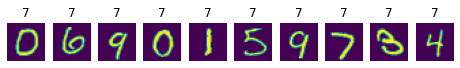

In [206]:
epoch = 15
learning_rate = 0.003
adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
res = tf_session(adam_optimizer)

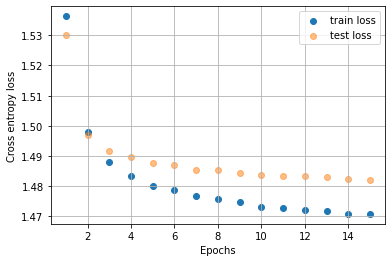

In [207]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), res[0], label = "train loss")
plt.scatter(range(1, epoch+1), res[1], label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")


In [201]:
yhat

<tf.Tensor 'Softmax_7:0' shape=(None, 10) dtype=float32>

In [208]:
results.loc[3] = ['relu+bn', 'adam', res[5], res[0], res[1], res[2], res[3], res[4]]
results

,activation_unit,optimizer,accuracy,train_loss,test_loss,weight1,weight2,weight3
0,sigmoid,adam,0.9769,"[1.5495223, 1.4920709, 1.484456, 1.4813356, 1....","[1.5464011, 1.4929918, 1.4879929, 1.4855704, 1...","[[-0.036198013, -0.018920701, 0.031863127, 0.0...","[[0.4715942, 0.28923732, 0.58247966, 0.8406421...","[[0.7312606, -1.1931288, -1.4744773, -1.821540..."
1,sigmoid,gd,0.6089,"[2.3073978, 2.298492, 2.2952466, 2.292354, 2.2...","[2.307303, 2.298238, 2.2948694, 2.291895, 2.28...","[[0.08542105, -0.041108303, -0.033613473, 0.06...","[[0.0017425624, -0.0499915, 0.029592166, 0.031...","[[-0.26376188, 0.16400473, 0.17453934, 0.23161..."
2,relu,adam,0.9675,"[1.5777614, 1.5136802, 1.5023476, 1.4987221, 1...","[1.5732272, 1.5134172, 1.5043505, 1.5021714, 1...","[[-0.056623563, -0.06398073, -0.004845474, 0.0...","[[-0.293605, 0.074238025, -0.20860806, -0.2214...","[[0.69610524, -0.3046881, 0.063394174, 0.43150..."
3,relu+bn,adam,0.9799,"[1.5363003, 1.4980803, 1.4879801, 1.4834363, 1...","[1.5300151, 1.497108, 1.4915385, 1.4895475, 1....","[[-0.007900944, 0.0013309038, 0.026658924, -0....","[[-0.38596123, 0.38183418, 0.10526858, 0.20446...","[[-0.08697218, -0.16257755, -0.015789114, 0.43..."


- Batch normalization has reduced the gap between train and test error 
- The fluctuation in loss data is also reduced

### ReLU activation units with dropout layers

In [276]:
### Let us check dropout layer to check the influence of it on the performance

weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=he_normal_distribution(n_input), mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=he_normal_distribution(hidden1), mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=he_normal_distribution(hidden2), mean=0))

prob = tf.compat.v1.placeholder(tf.float32)

def mlp_relu_do(inpt, w1, w2, w3, b1, b2, b3, prob):
    '''Returns the multi layered perceptron output from input and initalized weights and biases'''
    
    ## Layer 1: 784 x 512
    ## Layer1 input addition
    layer_1 = tf.nn.relu(tf.add(tf.matmul(inpt,w1),b1))
    layer_1_do = tf.nn.dropout(layer_1, prob)
    print(layer_1_do.get_shape(), w1.get_shape(), b1.get_shape())
    
    ## Layer 2: 512 x 264
    ## Layer2 input addition
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1_do,w2),b2))
   ### testing
    layer_2_do = tf.nn.dropout(layer_2, prob)  
    print(layer_2_do.get_shape(), w2.get_shape(), b2.get_shape())
    
    ## Layer 3: 264 x 10
    #layer_3 = tf.add(tf.matmul(layer_2_do,w3),b3)
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_do,w3),b3))
    print(layer_3.get_shape(), w3.get_shape(), b3.get_shape())
    
    return layer_3

In [277]:
# Prediction of numbers from images
yhat = mlp_relu_do(x, weight1, weight2, weight3, bias1, bias2, bias3, prob)

# Loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat, labels = y))

(None, 512) (784, 512) (512,)
(None, 128) (512, 128) (128,)
(None, 10) (128, 10) (10,)


In [278]:
epoch = 15
learning_rate = 0.003
adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Batch number: 0 and train cost: 2.3709001541137695
Batch number: 1 and train cost: 2.3489584922790527
Batch number: 2 and train cost: 2.278527021408081
Batch number: 3 and train cost: 2.2154088020324707
Batch number: 4 and train cost: 2.212653875350952
Batch number: 5 and train cost: 2.2083964347839355
Batch number: 6 and train cost: 2.1739792823791504
Batch number: 7 and train cost: 2.1344780921936035
Batch number: 8 and train cost: 2.1152477264404297
Batch number: 9 and train cost: 2.0971062183380127
Batch number: 10 and train cost: 2.008455514907837
Batch number: 11 and train cost: 1.9952741861343384
Batch number: 12 and train cost: 2.0949714183807373
Batch number: 13 and train cost: 2.0099174976348877
Batch number: 14 and train cost: 1.9228143692016602
Batch number: 15 and train cost: 1.9443048238754272
Batch number: 16 and train cost: 1.8660635948181152
Batch number: 17 and train cost: 1.8206619024276733
Batch number: 18 and train cost: 1.893916368484497
Batch number: 19 and train

Batch number: 158 and train cost: 1.6290805339813232
Batch number: 159 and train cost: 1.6120837926864624
Batch number: 160 and train cost: 1.621848702430725
Batch number: 161 and train cost: 1.5917373895645142
Batch number: 162 and train cost: 1.568437099456787
Batch number: 163 and train cost: 1.5626603364944458
Batch number: 164 and train cost: 1.5720406770706177
Batch number: 165 and train cost: 1.5957897901535034
Batch number: 166 and train cost: 1.5946627855300903
Batch number: 167 and train cost: 1.6392533779144287
Batch number: 168 and train cost: 1.6004215478897095
Batch number: 169 and train cost: 1.6158783435821533
Batch number: 170 and train cost: 1.591331124305725
Batch number: 171 and train cost: 1.57442045211792
Batch number: 172 and train cost: 1.5967425107955933
Batch number: 173 and train cost: 1.528458595275879
Batch number: 174 and train cost: 1.5849921703338623
Batch number: 175 and train cost: 1.6613849401474
Batch number: 176 and train cost: 1.5550445318222046
Ba

Batch number: 314 and train cost: 1.5543277263641357
Batch number: 315 and train cost: 1.5359437465667725
Batch number: 316 and train cost: 1.5814992189407349
Batch number: 317 and train cost: 1.5852928161621094
Batch number: 318 and train cost: 1.5828760862350464
Batch number: 319 and train cost: 1.5702941417694092
Batch number: 320 and train cost: 1.5666552782058716
Batch number: 321 and train cost: 1.5714372396469116
Batch number: 322 and train cost: 1.5612186193466187
Batch number: 323 and train cost: 1.6310381889343262
Batch number: 324 and train cost: 1.6122452020645142
Batch number: 325 and train cost: 1.5614427328109741
Batch number: 326 and train cost: 1.542197823524475
Batch number: 327 and train cost: 1.5660499334335327
Batch number: 328 and train cost: 1.5519988536834717
Batch number: 329 and train cost: 1.5406944751739502
Batch number: 330 and train cost: 1.5420830249786377
Batch number: 331 and train cost: 1.551923394203186
Batch number: 332 and train cost: 1.569961071014

Batch number: 470 and train cost: 1.5168609619140625
Batch number: 471 and train cost: 1.5100916624069214
Batch number: 472 and train cost: 1.590767502784729
Batch number: 473 and train cost: 1.5356221199035645
Batch number: 474 and train cost: 1.562735915184021
Batch number: 475 and train cost: 1.5241681337356567
Batch number: 476 and train cost: 1.5602691173553467
Batch number: 477 and train cost: 1.5389326810836792
Batch number: 478 and train cost: 1.514471411705017
Batch number: 479 and train cost: 1.5945417881011963
Batch number: 480 and train cost: 1.5520761013031006
Batch number: 481 and train cost: 1.5360658168792725
Batch number: 482 and train cost: 1.5193294286727905
Batch number: 483 and train cost: 1.577735185623169
Batch number: 484 and train cost: 1.519667625427246
Batch number: 485 and train cost: 1.5274786949157715
Batch number: 486 and train cost: 1.519413948059082
Batch number: 487 and train cost: 1.5390830039978027
Batch number: 488 and train cost: 1.5244989395141602

Batch number: 29 and train cost: 1.5235861539840698
Batch number: 30 and train cost: 1.5521481037139893
Batch number: 31 and train cost: 1.5140957832336426
Batch number: 32 and train cost: 1.5210548639297485
Batch number: 33 and train cost: 1.5137362480163574
Batch number: 34 and train cost: 1.5003886222839355
Batch number: 35 and train cost: 1.5086379051208496
Batch number: 36 and train cost: 1.5326135158538818
Batch number: 37 and train cost: 1.5567184686660767
Batch number: 38 and train cost: 1.5180299282073975
Batch number: 39 and train cost: 1.479947805404663
Batch number: 40 and train cost: 1.5292115211486816
Batch number: 41 and train cost: 1.5488159656524658
Batch number: 42 and train cost: 1.5218790769577026
Batch number: 43 and train cost: 1.4963123798370361
Batch number: 44 and train cost: 1.533144235610962
Batch number: 45 and train cost: 1.5128899812698364
Batch number: 46 and train cost: 1.5715223550796509
Batch number: 47 and train cost: 1.5145232677459717
Batch number: 

Batch number: 188 and train cost: 1.4912998676300049
Batch number: 189 and train cost: 1.490726351737976
Batch number: 190 and train cost: 1.5405421257019043
Batch number: 191 and train cost: 1.5173922777175903
Batch number: 192 and train cost: 1.5091930627822876
Batch number: 193 and train cost: 1.520534873008728
Batch number: 194 and train cost: 1.4979426860809326
Batch number: 195 and train cost: 1.5684856176376343
Batch number: 196 and train cost: 1.4725695848464966
Batch number: 197 and train cost: 1.5041651725769043
Batch number: 198 and train cost: 1.560882568359375
Batch number: 199 and train cost: 1.500535488128662
Batch number: 200 and train cost: 1.5639103651046753
Batch number: 201 and train cost: 1.526780128479004
Batch number: 202 and train cost: 1.5301108360290527
Batch number: 203 and train cost: 1.5109739303588867
Batch number: 204 and train cost: 1.492098331451416
Batch number: 205 and train cost: 1.5095728635787964
Batch number: 206 and train cost: 1.5308074951171875

Batch number: 344 and train cost: 1.5665676593780518
Batch number: 345 and train cost: 1.5182183980941772
Batch number: 346 and train cost: 1.5203644037246704
Batch number: 347 and train cost: 1.549843430519104
Batch number: 348 and train cost: 1.5724023580551147
Batch number: 349 and train cost: 1.5417892932891846
Batch number: 350 and train cost: 1.5208227634429932
Batch number: 351 and train cost: 1.529443383216858
Batch number: 352 and train cost: 1.4991291761398315
Batch number: 353 and train cost: 1.510819911956787
Batch number: 354 and train cost: 1.525701642036438
Batch number: 355 and train cost: 1.4961711168289185
Batch number: 356 and train cost: 1.528612494468689
Batch number: 357 and train cost: 1.4932516813278198
Batch number: 358 and train cost: 1.4944034814834595
Batch number: 359 and train cost: 1.518220067024231
Batch number: 360 and train cost: 1.5389155149459839
Batch number: 361 and train cost: 1.5142589807510376
Batch number: 362 and train cost: 1.4961950778961182

Batch number: 500 and train cost: 1.5112289190292358
Batch number: 501 and train cost: 1.5216978788375854
Batch number: 502 and train cost: 1.5302923917770386
Batch number: 503 and train cost: 1.5534794330596924
Batch number: 504 and train cost: 1.5430636405944824
Batch number: 505 and train cost: 1.5250980854034424
Batch number: 506 and train cost: 1.5161104202270508
Batch number: 507 and train cost: 1.5180555582046509
Batch number: 508 and train cost: 1.5327726602554321
Batch number: 509 and train cost: 1.4928964376449585
Batch number: 510 and train cost: 1.4949369430541992
Batch number: 511 and train cost: 1.526631474494934
Batch number: 512 and train cost: 1.527028203010559
Batch number: 513 and train cost: 1.5407317876815796
Batch number: 514 and train cost: 1.5128477811813354
Batch number: 515 and train cost: 1.5219515562057495
Batch number: 516 and train cost: 1.515264630317688
Batch number: 517 and train cost: 1.5204322338104248
Batch number: 518 and train cost: 1.4842208623886

Batch number: 59 and train cost: 1.4920345544815063
Batch number: 60 and train cost: 1.4898637533187866
Batch number: 61 and train cost: 1.525327205657959
Batch number: 62 and train cost: 1.51548171043396
Batch number: 63 and train cost: 1.4932143688201904
Batch number: 64 and train cost: 1.557093858718872
Batch number: 65 and train cost: 1.4795312881469727
Batch number: 66 and train cost: 1.5126880407333374
Batch number: 67 and train cost: 1.498725414276123
Batch number: 68 and train cost: 1.5554208755493164
Batch number: 69 and train cost: 1.5151370763778687
Batch number: 70 and train cost: 1.5147688388824463
Batch number: 71 and train cost: 1.5015426874160767
Batch number: 72 and train cost: 1.5334515571594238
Batch number: 73 and train cost: 1.5131595134735107
Batch number: 74 and train cost: 1.5266467332839966
Batch number: 75 and train cost: 1.5133624076843262
Batch number: 76 and train cost: 1.5061672925949097
Batch number: 77 and train cost: 1.5284138917922974
Batch number: 78 

Batch number: 218 and train cost: 1.4780217409133911
Batch number: 219 and train cost: 1.5301616191864014
Batch number: 220 and train cost: 1.482515811920166
Batch number: 221 and train cost: 1.5413669347763062
Batch number: 222 and train cost: 1.5188202857971191
Batch number: 223 and train cost: 1.4807820320129395
Batch number: 224 and train cost: 1.5539824962615967
Batch number: 225 and train cost: 1.5446711778640747
Batch number: 226 and train cost: 1.5081769227981567
Batch number: 227 and train cost: 1.5132930278778076
Batch number: 228 and train cost: 1.505119800567627
Batch number: 229 and train cost: 1.4872015714645386
Batch number: 230 and train cost: 1.5208810567855835
Batch number: 231 and train cost: 1.527452826499939
Batch number: 232 and train cost: 1.5036033391952515
Batch number: 233 and train cost: 1.4900447130203247
Batch number: 234 and train cost: 1.5316866636276245
Batch number: 235 and train cost: 1.5006756782531738
Batch number: 236 and train cost: 1.5098217725753

Batch number: 374 and train cost: 1.5614017248153687
Batch number: 375 and train cost: 1.5487456321716309
Batch number: 376 and train cost: 1.5064281225204468
Batch number: 377 and train cost: 1.5176235437393188
Batch number: 378 and train cost: 1.5128611326217651
Batch number: 379 and train cost: 1.5055968761444092
Batch number: 380 and train cost: 1.5124287605285645
Batch number: 381 and train cost: 1.4816855192184448
Batch number: 382 and train cost: 1.5082032680511475
Batch number: 383 and train cost: 1.54069185256958
Batch number: 384 and train cost: 1.4826414585113525
Batch number: 385 and train cost: 1.5268844366073608
Batch number: 386 and train cost: 1.5439224243164062
Batch number: 387 and train cost: 1.5188707113265991
Batch number: 388 and train cost: 1.4829634428024292
Batch number: 389 and train cost: 1.5224071741104126
Batch number: 390 and train cost: 1.4888018369674683
Batch number: 391 and train cost: 1.4999920129776
Batch number: 392 and train cost: 1.514237999916076

Batch number: 530 and train cost: 1.4901329278945923
Batch number: 531 and train cost: 1.5202608108520508
Batch number: 532 and train cost: 1.4956375360488892
Batch number: 533 and train cost: 1.4833379983901978
Batch number: 534 and train cost: 1.4921119213104248
Batch number: 535 and train cost: 1.5163606405258179
Batch number: 536 and train cost: 1.5260891914367676
Batch number: 537 and train cost: 1.4970176219940186
Batch number: 538 and train cost: 1.503257155418396
Batch number: 539 and train cost: 1.5070322751998901
Batch number: 540 and train cost: 1.4988932609558105
Batch number: 541 and train cost: 1.4855380058288574
Batch number: 542 and train cost: 1.4893393516540527
Batch number: 543 and train cost: 1.4848294258117676
Batch number: 544 and train cost: 1.5010223388671875
Batch number: 545 and train cost: 1.5349136590957642
Batch number: 546 and train cost: 1.4828077554702759
Batch number: 547 and train cost: 1.5025663375854492
Batch number: 548 and train cost: 1.49477875232

Batch number: 89 and train cost: 1.5081303119659424
Batch number: 90 and train cost: 1.496158242225647
Batch number: 91 and train cost: 1.5133589506149292
Batch number: 92 and train cost: 1.5452971458435059
Batch number: 93 and train cost: 1.5072848796844482
Batch number: 94 and train cost: 1.5242927074432373
Batch number: 95 and train cost: 1.5069520473480225
Batch number: 96 and train cost: 1.498343825340271
Batch number: 97 and train cost: 1.500977635383606
Batch number: 98 and train cost: 1.496606469154358
Batch number: 99 and train cost: 1.4825809001922607
Batch number: 100 and train cost: 1.5203499794006348
Batch number: 101 and train cost: 1.5077455043792725
Batch number: 102 and train cost: 1.5598803758621216
Batch number: 103 and train cost: 1.5041311979293823
Batch number: 104 and train cost: 1.4853625297546387
Batch number: 105 and train cost: 1.4819504022598267
Batch number: 106 and train cost: 1.4802783727645874
Batch number: 107 and train cost: 1.5222560167312622
Batch nu

Batch number: 245 and train cost: 1.5092599391937256
Batch number: 246 and train cost: 1.5367767810821533
Batch number: 247 and train cost: 1.5273501873016357
Batch number: 248 and train cost: 1.528103232383728
Batch number: 249 and train cost: 1.5046101808547974
Batch number: 250 and train cost: 1.5083160400390625
Batch number: 251 and train cost: 1.5090692043304443
Batch number: 252 and train cost: 1.493222951889038
Batch number: 253 and train cost: 1.5322542190551758
Batch number: 254 and train cost: 1.483961820602417
Batch number: 255 and train cost: 1.5181807279586792
Batch number: 256 and train cost: 1.5252712965011597
Batch number: 257 and train cost: 1.5008459091186523
Batch number: 258 and train cost: 1.5146682262420654
Batch number: 259 and train cost: 1.5178744792938232
Batch number: 260 and train cost: 1.5082060098648071
Batch number: 261 and train cost: 1.4951198101043701
Batch number: 262 and train cost: 1.498505711555481
Batch number: 263 and train cost: 1.53686583042144

Batch number: 401 and train cost: 1.5003787279129028
Batch number: 402 and train cost: 1.4964098930358887
Batch number: 403 and train cost: 1.5048134326934814
Batch number: 404 and train cost: 1.4922840595245361
Batch number: 405 and train cost: 1.5232765674591064
Batch number: 406 and train cost: 1.5177150964736938
Batch number: 407 and train cost: 1.5125099420547485
Batch number: 408 and train cost: 1.4929348230361938
Batch number: 409 and train cost: 1.4884934425354004
Batch number: 410 and train cost: 1.5059762001037598
Batch number: 411 and train cost: 1.511847734451294
Batch number: 412 and train cost: 1.5351959466934204
Batch number: 413 and train cost: 1.5457091331481934
Batch number: 414 and train cost: 1.5271583795547485
Batch number: 415 and train cost: 1.5016604661941528
Batch number: 416 and train cost: 1.5172762870788574
Batch number: 417 and train cost: 1.49570894241333
Batch number: 418 and train cost: 1.521120309829712
Batch number: 419 and train cost: 1.52936649322509

Batch number: 557 and train cost: 1.5053192377090454
Batch number: 558 and train cost: 1.499866008758545
Batch number: 559 and train cost: 1.494235634803772
Batch number: 560 and train cost: 1.4893757104873657
Batch number: 561 and train cost: 1.480470895767212
Batch number: 562 and train cost: 1.5170724391937256
Batch number: 563 and train cost: 1.5387098789215088
Batch number: 564 and train cost: 1.512761116027832
Batch number: 565 and train cost: 1.491349458694458
Batch number: 566 and train cost: 1.514817237854004
Batch number: 567 and train cost: 1.5110782384872437
Batch number: 568 and train cost: 1.5104864835739136
Batch number: 569 and train cost: 1.4899206161499023
Batch number: 570 and train cost: 1.5160619020462036
Batch number: 571 and train cost: 1.4701831340789795
Batch number: 572 and train cost: 1.510193943977356
Batch number: 573 and train cost: 1.489345669746399
Batch number: 574 and train cost: 1.4975138902664185
Batch number: 575 and train cost: 1.4841960668563843
B

Batch number: 116 and train cost: 1.5186320543289185
Batch number: 117 and train cost: 1.5275710821151733
Batch number: 118 and train cost: 1.519802212715149
Batch number: 119 and train cost: 1.4847968816757202
Batch number: 120 and train cost: 1.501298189163208
Batch number: 121 and train cost: 1.493933916091919
Batch number: 122 and train cost: 1.489761471748352
Batch number: 123 and train cost: 1.535298466682434
Batch number: 124 and train cost: 1.5188277959823608
Batch number: 125 and train cost: 1.5646696090698242
Batch number: 126 and train cost: 1.55503249168396
Batch number: 127 and train cost: 1.5102131366729736
Batch number: 128 and train cost: 1.5015242099761963
Batch number: 129 and train cost: 1.5179156064987183
Batch number: 130 and train cost: 1.5207045078277588
Batch number: 131 and train cost: 1.5053967237472534
Batch number: 132 and train cost: 1.4830145835876465
Batch number: 133 and train cost: 1.5037732124328613
Batch number: 134 and train cost: 1.4897253513336182


Batch number: 272 and train cost: 1.5433831214904785
Batch number: 273 and train cost: 1.489759922027588
Batch number: 274 and train cost: 1.5107134580612183
Batch number: 275 and train cost: 1.495964765548706
Batch number: 276 and train cost: 1.511634349822998
Batch number: 277 and train cost: 1.5014936923980713
Batch number: 278 and train cost: 1.5095981359481812
Batch number: 279 and train cost: 1.4749958515167236
Batch number: 280 and train cost: 1.4953639507293701
Batch number: 281 and train cost: 1.5192211866378784
Batch number: 282 and train cost: 1.4735994338989258
Batch number: 283 and train cost: 1.5318576097488403
Batch number: 284 and train cost: 1.4963200092315674
Batch number: 285 and train cost: 1.512434482574463
Batch number: 286 and train cost: 1.5268454551696777
Batch number: 287 and train cost: 1.4986472129821777
Batch number: 288 and train cost: 1.4973132610321045
Batch number: 289 and train cost: 1.5033913850784302
Batch number: 290 and train cost: 1.50946140289306

Batch number: 428 and train cost: 1.5114597082138062
Batch number: 429 and train cost: 1.5031991004943848
Batch number: 430 and train cost: 1.525448203086853
Batch number: 431 and train cost: 1.5298409461975098
Batch number: 432 and train cost: 1.5071423053741455
Batch number: 433 and train cost: 1.4714277982711792
Batch number: 434 and train cost: 1.4766231775283813
Batch number: 435 and train cost: 1.5093570947647095
Batch number: 436 and train cost: 1.5076745748519897
Batch number: 437 and train cost: 1.4940223693847656
Batch number: 438 and train cost: 1.513184666633606
Batch number: 439 and train cost: 1.497978925704956
Batch number: 440 and train cost: 1.5016881227493286
Batch number: 441 and train cost: 1.5190033912658691
Batch number: 442 and train cost: 1.5017727613449097
Batch number: 443 and train cost: 1.5122876167297363
Batch number: 444 and train cost: 1.5205893516540527
Batch number: 445 and train cost: 1.4804871082305908
Batch number: 446 and train cost: 1.4878994226455

Batch number: 584 and train cost: 1.5097309350967407
Batch number: 585 and train cost: 1.4743815660476685
Batch number: 586 and train cost: 1.4849159717559814
Batch number: 587 and train cost: 1.4754482507705688
Batch number: 588 and train cost: 1.5119714736938477
Batch number: 589 and train cost: 1.4644583463668823
Batch number: 590 and train cost: 1.4819773435592651
Batch number: 591 and train cost: 1.4798285961151123
Batch number: 592 and train cost: 1.5016810894012451
Batch number: 593 and train cost: 1.524246096611023
Batch number: 594 and train cost: 1.5210338830947876
Batch number: 595 and train cost: 1.4673861265182495
Batch number: 596 and train cost: 1.4831225872039795
Batch number: 597 and train cost: 1.5904597043991089
Batch number: 598 and train cost: 1.4649200439453125
Batch number: 599 and train cost: 1.497839331626892
Batch number: 0 and train cost: 1.4972256422042847
Batch number: 1 and train cost: 1.5219330787658691
Batch number: 2 and train cost: 1.5168832540512085
B

Batch number: 143 and train cost: 1.5642973184585571
Batch number: 144 and train cost: 1.4968228340148926
Batch number: 145 and train cost: 1.5114598274230957
Batch number: 146 and train cost: 1.5389705896377563
Batch number: 147 and train cost: 1.5529512166976929
Batch number: 148 and train cost: 1.5151275396347046
Batch number: 149 and train cost: 1.4912408590316772
Batch number: 150 and train cost: 1.4964741468429565
Batch number: 151 and train cost: 1.5103689432144165
Batch number: 152 and train cost: 1.5076237916946411
Batch number: 153 and train cost: 1.5046964883804321
Batch number: 154 and train cost: 1.5044827461242676
Batch number: 155 and train cost: 1.4987074136734009
Batch number: 156 and train cost: 1.490206241607666
Batch number: 157 and train cost: 1.5470422506332397
Batch number: 158 and train cost: 1.5224411487579346
Batch number: 159 and train cost: 1.5182937383651733
Batch number: 160 and train cost: 1.5401909351348877
Batch number: 161 and train cost: 1.51876378059

Batch number: 299 and train cost: 1.5263235569000244
Batch number: 300 and train cost: 1.4928370714187622
Batch number: 301 and train cost: 1.5171921253204346
Batch number: 302 and train cost: 1.4932420253753662
Batch number: 303 and train cost: 1.4898892641067505
Batch number: 304 and train cost: 1.4800971746444702
Batch number: 305 and train cost: 1.5118119716644287
Batch number: 306 and train cost: 1.5543715953826904
Batch number: 307 and train cost: 1.4801923036575317
Batch number: 308 and train cost: 1.5029624700546265
Batch number: 309 and train cost: 1.480645775794983
Batch number: 310 and train cost: 1.510982632637024
Batch number: 311 and train cost: 1.5455893278121948
Batch number: 312 and train cost: 1.5364563465118408
Batch number: 313 and train cost: 1.5532716512680054
Batch number: 314 and train cost: 1.4826463460922241
Batch number: 315 and train cost: 1.5173438787460327
Batch number: 316 and train cost: 1.524845838546753
Batch number: 317 and train cost: 1.5382843017578

Batch number: 455 and train cost: 1.56298828125
Batch number: 456 and train cost: 1.4933135509490967
Batch number: 457 and train cost: 1.5061427354812622
Batch number: 458 and train cost: 1.5114843845367432
Batch number: 459 and train cost: 1.5253299474716187
Batch number: 460 and train cost: 1.5499298572540283
Batch number: 461 and train cost: 1.4978082180023193
Batch number: 462 and train cost: 1.5759414434432983
Batch number: 463 and train cost: 1.5260177850723267
Batch number: 464 and train cost: 1.5144050121307373
Batch number: 465 and train cost: 1.4803836345672607
Batch number: 466 and train cost: 1.4851945638656616
Batch number: 467 and train cost: 1.505059003829956
Batch number: 468 and train cost: 1.5035101175308228
Batch number: 469 and train cost: 1.4832736253738403
Batch number: 470 and train cost: 1.4856040477752686
Batch number: 471 and train cost: 1.4686279296875
Batch number: 472 and train cost: 1.543763279914856
Batch number: 473 and train cost: 1.5184664726257324
Bat

Batch number: 11 and train cost: 1.5323339700698853
Batch number: 12 and train cost: 1.538832664489746
Batch number: 13 and train cost: 1.5468080043792725
Batch number: 14 and train cost: 1.4684950113296509
Batch number: 15 and train cost: 1.5254669189453125
Batch number: 16 and train cost: 1.4844181537628174
Batch number: 17 and train cost: 1.482053518295288
Batch number: 18 and train cost: 1.503751516342163
Batch number: 19 and train cost: 1.4983456134796143
Batch number: 20 and train cost: 1.513360857963562
Batch number: 21 and train cost: 1.477724313735962
Batch number: 22 and train cost: 1.4980474710464478
Batch number: 23 and train cost: 1.475124716758728
Batch number: 24 and train cost: 1.5092271566390991
Batch number: 25 and train cost: 1.481655478477478
Batch number: 26 and train cost: 1.5118322372436523
Batch number: 27 and train cost: 1.4847015142440796
Batch number: 28 and train cost: 1.520043969154358
Batch number: 29 and train cost: 1.5111743211746216
Batch number: 30 and

Batch number: 170 and train cost: 1.5277622938156128
Batch number: 171 and train cost: 1.5146316289901733
Batch number: 172 and train cost: 1.5014500617980957
Batch number: 173 and train cost: 1.4809784889221191
Batch number: 174 and train cost: 1.4929345846176147
Batch number: 175 and train cost: 1.526759386062622
Batch number: 176 and train cost: 1.522477626800537
Batch number: 177 and train cost: 1.5044282674789429
Batch number: 178 and train cost: 1.5349280834197998
Batch number: 179 and train cost: 1.5039219856262207
Batch number: 180 and train cost: 1.4939059019088745
Batch number: 181 and train cost: 1.4856964349746704
Batch number: 182 and train cost: 1.4793591499328613
Batch number: 183 and train cost: 1.5210822820663452
Batch number: 184 and train cost: 1.4979712963104248
Batch number: 185 and train cost: 1.4994772672653198
Batch number: 186 and train cost: 1.4787356853485107
Batch number: 187 and train cost: 1.497644066810608
Batch number: 188 and train cost: 1.4884449243545

Batch number: 326 and train cost: 1.4923951625823975
Batch number: 327 and train cost: 1.5209933519363403
Batch number: 328 and train cost: 1.5498276948928833
Batch number: 329 and train cost: 1.5108575820922852
Batch number: 330 and train cost: 1.4818222522735596
Batch number: 331 and train cost: 1.5264747142791748
Batch number: 332 and train cost: 1.510675311088562
Batch number: 333 and train cost: 1.5300567150115967
Batch number: 334 and train cost: 1.5101929903030396
Batch number: 335 and train cost: 1.5230122804641724
Batch number: 336 and train cost: 1.5067065954208374
Batch number: 337 and train cost: 1.508719801902771
Batch number: 338 and train cost: 1.4928734302520752
Batch number: 339 and train cost: 1.4754081964492798
Batch number: 340 and train cost: 1.488084077835083
Batch number: 341 and train cost: 1.4898808002471924
Batch number: 342 and train cost: 1.4735000133514404
Batch number: 343 and train cost: 1.4848309755325317
Batch number: 344 and train cost: 1.5204837322235

Batch number: 482 and train cost: 1.4913362264633179
Batch number: 483 and train cost: 1.5018092393875122
Batch number: 484 and train cost: 1.4923348426818848
Batch number: 485 and train cost: 1.5140782594680786
Batch number: 486 and train cost: 1.489488959312439
Batch number: 487 and train cost: 1.4874416589736938
Batch number: 488 and train cost: 1.5007542371749878
Batch number: 489 and train cost: 1.5561728477478027
Batch number: 490 and train cost: 1.5326215028762817
Batch number: 491 and train cost: 1.501896858215332
Batch number: 492 and train cost: 1.5060418844223022
Batch number: 493 and train cost: 1.4802460670471191
Batch number: 494 and train cost: 1.5313949584960938
Batch number: 495 and train cost: 1.556684970855713
Batch number: 496 and train cost: 1.5412020683288574
Batch number: 497 and train cost: 1.5096499919891357
Batch number: 498 and train cost: 1.5583990812301636
Batch number: 499 and train cost: 1.547493577003479
Batch number: 500 and train cost: 1.49108052253723

Batch number: 41 and train cost: 1.5125727653503418
Batch number: 42 and train cost: 1.5063928365707397
Batch number: 43 and train cost: 1.484958529472351
Batch number: 44 and train cost: 1.495792031288147
Batch number: 45 and train cost: 1.4824919700622559
Batch number: 46 and train cost: 1.513683795928955
Batch number: 47 and train cost: 1.4883949756622314
Batch number: 48 and train cost: 1.4783154726028442
Batch number: 49 and train cost: 1.5212329626083374
Batch number: 50 and train cost: 1.5194660425186157
Batch number: 51 and train cost: 1.5102510452270508
Batch number: 52 and train cost: 1.5035291910171509
Batch number: 53 and train cost: 1.5139988660812378
Batch number: 54 and train cost: 1.4861983060836792
Batch number: 55 and train cost: 1.4798033237457275
Batch number: 56 and train cost: 1.5143967866897583
Batch number: 57 and train cost: 1.5348176956176758
Batch number: 58 and train cost: 1.53016996383667
Batch number: 59 and train cost: 1.4851391315460205
Batch number: 60 

Batch number: 200 and train cost: 1.5220942497253418
Batch number: 201 and train cost: 1.5092685222625732
Batch number: 202 and train cost: 1.5251365900039673
Batch number: 203 and train cost: 1.4879508018493652
Batch number: 204 and train cost: 1.4900072813034058
Batch number: 205 and train cost: 1.492341160774231
Batch number: 206 and train cost: 1.5099117755889893
Batch number: 207 and train cost: 1.530240774154663
Batch number: 208 and train cost: 1.5187305212020874
Batch number: 209 and train cost: 1.5346953868865967
Batch number: 210 and train cost: 1.4991214275360107
Batch number: 211 and train cost: 1.4867511987686157
Batch number: 212 and train cost: 1.482295274734497
Batch number: 213 and train cost: 1.5525366067886353
Batch number: 214 and train cost: 1.485537052154541
Batch number: 215 and train cost: 1.528162956237793
Batch number: 216 and train cost: 1.4990952014923096
Batch number: 217 and train cost: 1.5031940937042236
Batch number: 218 and train cost: 1.470034599304199

Batch number: 356 and train cost: 1.4910626411437988
Batch number: 357 and train cost: 1.4886142015457153
Batch number: 358 and train cost: 1.4714062213897705
Batch number: 359 and train cost: 1.5128875970840454
Batch number: 360 and train cost: 1.5234858989715576
Batch number: 361 and train cost: 1.5280494689941406
Batch number: 362 and train cost: 1.4999966621398926
Batch number: 363 and train cost: 1.5042871236801147
Batch number: 364 and train cost: 1.526473045349121
Batch number: 365 and train cost: 1.5001505613327026
Batch number: 366 and train cost: 1.4805127382278442
Batch number: 367 and train cost: 1.5022834539413452
Batch number: 368 and train cost: 1.5062942504882812
Batch number: 369 and train cost: 1.4884045124053955
Batch number: 370 and train cost: 1.5392035245895386
Batch number: 371 and train cost: 1.5271501541137695
Batch number: 372 and train cost: 1.4987547397613525
Batch number: 373 and train cost: 1.5305187702178955
Batch number: 374 and train cost: 1.52625322341

Batch number: 512 and train cost: 1.5141470432281494
Batch number: 513 and train cost: 1.4937101602554321
Batch number: 514 and train cost: 1.5019720792770386
Batch number: 515 and train cost: 1.4794305562973022
Batch number: 516 and train cost: 1.488080620765686
Batch number: 517 and train cost: 1.5167442560195923
Batch number: 518 and train cost: 1.4838589429855347
Batch number: 519 and train cost: 1.541865587234497
Batch number: 520 and train cost: 1.5054186582565308
Batch number: 521 and train cost: 1.5353994369506836
Batch number: 522 and train cost: 1.5056359767913818
Batch number: 523 and train cost: 1.4837995767593384
Batch number: 524 and train cost: 1.4918702840805054
Batch number: 525 and train cost: 1.4974883794784546
Batch number: 526 and train cost: 1.4982731342315674
Batch number: 527 and train cost: 1.5059276819229126
Batch number: 528 and train cost: 1.53367018699646
Batch number: 529 and train cost: 1.6082472801208496
Batch number: 530 and train cost: 1.51206052303314

Batch number: 71 and train cost: 1.4949822425842285
Batch number: 72 and train cost: 1.5157374143600464
Batch number: 73 and train cost: 1.5013427734375
Batch number: 74 and train cost: 1.4967007637023926
Batch number: 75 and train cost: 1.5091766119003296
Batch number: 76 and train cost: 1.5113531351089478
Batch number: 77 and train cost: 1.5292102098464966
Batch number: 78 and train cost: 1.5257420539855957
Batch number: 79 and train cost: 1.4900829792022705
Batch number: 80 and train cost: 1.4897655248641968
Batch number: 81 and train cost: 1.5172293186187744
Batch number: 82 and train cost: 1.56235671043396
Batch number: 83 and train cost: 1.484757423400879
Batch number: 84 and train cost: 1.5209754705429077
Batch number: 85 and train cost: 1.4952489137649536
Batch number: 86 and train cost: 1.550814151763916
Batch number: 87 and train cost: 1.5710320472717285
Batch number: 88 and train cost: 1.5506685972213745
Batch number: 89 and train cost: 1.5200151205062866
Batch number: 90 an

Batch number: 227 and train cost: 1.5109628438949585
Batch number: 228 and train cost: 1.4926666021347046
Batch number: 229 and train cost: 1.4792240858078003
Batch number: 230 and train cost: 1.5043448209762573
Batch number: 231 and train cost: 1.5040419101715088
Batch number: 232 and train cost: 1.4835541248321533
Batch number: 233 and train cost: 1.4794903993606567
Batch number: 234 and train cost: 1.4984852075576782
Batch number: 235 and train cost: 1.5265295505523682
Batch number: 236 and train cost: 1.509750247001648
Batch number: 237 and train cost: 1.5043507814407349
Batch number: 238 and train cost: 1.5012534856796265
Batch number: 239 and train cost: 1.5140000581741333
Batch number: 240 and train cost: 1.504258632659912
Batch number: 241 and train cost: 1.484688401222229
Batch number: 242 and train cost: 1.5044474601745605
Batch number: 243 and train cost: 1.465560793876648
Batch number: 244 and train cost: 1.531714677810669
Batch number: 245 and train cost: 1.522890448570251

Batch number: 383 and train cost: 1.5769052505493164
Batch number: 384 and train cost: 1.491194486618042
Batch number: 385 and train cost: 1.5011351108551025
Batch number: 386 and train cost: 1.5285769701004028
Batch number: 387 and train cost: 1.5205825567245483
Batch number: 388 and train cost: 1.4803799390792847
Batch number: 389 and train cost: 1.4813978672027588
Batch number: 390 and train cost: 1.474472999572754
Batch number: 391 and train cost: 1.483304738998413
Batch number: 392 and train cost: 1.5241622924804688
Batch number: 393 and train cost: 1.5895003080368042
Batch number: 394 and train cost: 1.5312716960906982
Batch number: 395 and train cost: 1.504180908203125
Batch number: 396 and train cost: 1.5116090774536133
Batch number: 397 and train cost: 1.520675778388977
Batch number: 398 and train cost: 1.514652967453003
Batch number: 399 and train cost: 1.5072615146636963
Batch number: 400 and train cost: 1.5017083883285522
Batch number: 401 and train cost: 1.4922153949737549

Batch number: 539 and train cost: 1.5228179693222046
Batch number: 540 and train cost: 1.4869837760925293
Batch number: 541 and train cost: 1.503074288368225
Batch number: 542 and train cost: 1.4809823036193848
Batch number: 543 and train cost: 1.4866690635681152
Batch number: 544 and train cost: 1.4841886758804321
Batch number: 545 and train cost: 1.504396677017212
Batch number: 546 and train cost: 1.4967374801635742
Batch number: 547 and train cost: 1.4855151176452637
Batch number: 548 and train cost: 1.5175944566726685
Batch number: 549 and train cost: 1.5197261571884155
Batch number: 550 and train cost: 1.488489031791687
Batch number: 551 and train cost: 1.495890498161316
Batch number: 552 and train cost: 1.5154547691345215
Batch number: 553 and train cost: 1.5067181587219238
Batch number: 554 and train cost: 1.474357008934021
Batch number: 555 and train cost: 1.485154151916504
Batch number: 556 and train cost: 1.47530198097229
Batch number: 557 and train cost: 1.4938664436340332
B

Batch number: 98 and train cost: 1.479708194732666
Batch number: 99 and train cost: 1.4759972095489502
Batch number: 100 and train cost: 1.4921252727508545
Batch number: 101 and train cost: 1.500280499458313
Batch number: 102 and train cost: 1.5414788722991943
Batch number: 103 and train cost: 1.4902578592300415
Batch number: 104 and train cost: 1.4943573474884033
Batch number: 105 and train cost: 1.478249192237854
Batch number: 106 and train cost: 1.4753361940383911
Batch number: 107 and train cost: 1.5284690856933594
Batch number: 108 and train cost: 1.5181224346160889
Batch number: 109 and train cost: 1.50994873046875
Batch number: 110 and train cost: 1.4947781562805176
Batch number: 111 and train cost: 1.4863576889038086
Batch number: 112 and train cost: 1.5057884454727173
Batch number: 113 and train cost: 1.4923614263534546
Batch number: 114 and train cost: 1.4843569993972778
Batch number: 115 and train cost: 1.561752200126648
Batch number: 116 and train cost: 1.5128777027130127
B

Batch number: 254 and train cost: 1.4851776361465454
Batch number: 255 and train cost: 1.502125859260559
Batch number: 256 and train cost: 1.4889689683914185
Batch number: 257 and train cost: 1.4925645589828491
Batch number: 258 and train cost: 1.4937655925750732
Batch number: 259 and train cost: 1.5137813091278076
Batch number: 260 and train cost: 1.4934216737747192
Batch number: 261 and train cost: 1.4710127115249634
Batch number: 262 and train cost: 1.516930341720581
Batch number: 263 and train cost: 1.5227444171905518
Batch number: 264 and train cost: 1.5184881687164307
Batch number: 265 and train cost: 1.5441583395004272
Batch number: 266 and train cost: 1.5146456956863403
Batch number: 267 and train cost: 1.5513577461242676
Batch number: 268 and train cost: 1.5138293504714966
Batch number: 269 and train cost: 1.4878123998641968
Batch number: 270 and train cost: 1.5053775310516357
Batch number: 271 and train cost: 1.5530465841293335
Batch number: 272 and train cost: 1.549736738204

Batch number: 410 and train cost: 1.5246776342391968
Batch number: 411 and train cost: 1.5178711414337158
Batch number: 412 and train cost: 1.5211395025253296
Batch number: 413 and train cost: 1.5587164163589478
Batch number: 414 and train cost: 1.5289103984832764
Batch number: 415 and train cost: 1.508608102798462
Batch number: 416 and train cost: 1.4780380725860596
Batch number: 417 and train cost: 1.4841151237487793
Batch number: 418 and train cost: 1.514556884765625
Batch number: 419 and train cost: 1.5162360668182373
Batch number: 420 and train cost: 1.5244126319885254
Batch number: 421 and train cost: 1.5289469957351685
Batch number: 422 and train cost: 1.4916086196899414
Batch number: 423 and train cost: 1.4886382818222046
Batch number: 424 and train cost: 1.540034532546997
Batch number: 425 and train cost: 1.558272361755371
Batch number: 426 and train cost: 1.5035781860351562
Batch number: 427 and train cost: 1.5107189416885376
Batch number: 428 and train cost: 1.52077198028564

Batch number: 566 and train cost: 1.488207221031189
Batch number: 567 and train cost: 1.5070956945419312
Batch number: 568 and train cost: 1.5219917297363281
Batch number: 569 and train cost: 1.4888633489608765
Batch number: 570 and train cost: 1.523314356803894
Batch number: 571 and train cost: 1.4766240119934082
Batch number: 572 and train cost: 1.5360223054885864
Batch number: 573 and train cost: 1.5421497821807861
Batch number: 574 and train cost: 1.5205198526382446
Batch number: 575 and train cost: 1.5044862031936646
Batch number: 576 and train cost: 1.510998249053955
Batch number: 577 and train cost: 1.5162783861160278
Batch number: 578 and train cost: 1.4805988073349
Batch number: 579 and train cost: 1.5058157444000244
Batch number: 580 and train cost: 1.4846289157867432
Batch number: 581 and train cost: 1.4773244857788086
Batch number: 582 and train cost: 1.4961274862289429
Batch number: 583 and train cost: 1.4680380821228027
Batch number: 584 and train cost: 1.500400424003601


Batch number: 125 and train cost: 1.52886164188385
Batch number: 126 and train cost: 1.5663247108459473
Batch number: 127 and train cost: 1.4956812858581543
Batch number: 128 and train cost: 1.5121726989746094
Batch number: 129 and train cost: 1.4926871061325073
Batch number: 130 and train cost: 1.5392974615097046
Batch number: 131 and train cost: 1.5004009008407593
Batch number: 132 and train cost: 1.4873965978622437
Batch number: 133 and train cost: 1.5079967975616455
Batch number: 134 and train cost: 1.4788070917129517
Batch number: 135 and train cost: 1.5036636590957642
Batch number: 136 and train cost: 1.5007482767105103
Batch number: 137 and train cost: 1.513354778289795
Batch number: 138 and train cost: 1.4882187843322754
Batch number: 139 and train cost: 1.5111628770828247
Batch number: 140 and train cost: 1.51521897315979
Batch number: 141 and train cost: 1.4913216829299927
Batch number: 142 and train cost: 1.4906893968582153
Batch number: 143 and train cost: 1.569708824157714

Batch number: 281 and train cost: 1.5314220190048218
Batch number: 282 and train cost: 1.5164380073547363
Batch number: 283 and train cost: 1.5063508749008179
Batch number: 284 and train cost: 1.5016882419586182
Batch number: 285 and train cost: 1.5133777856826782
Batch number: 286 and train cost: 1.5154213905334473
Batch number: 287 and train cost: 1.5102919340133667
Batch number: 288 and train cost: 1.4743645191192627
Batch number: 289 and train cost: 1.4996116161346436
Batch number: 290 and train cost: 1.5418694019317627
Batch number: 291 and train cost: 1.512739896774292
Batch number: 292 and train cost: 1.522702693939209
Batch number: 293 and train cost: 1.503922939300537
Batch number: 294 and train cost: 1.491722583770752
Batch number: 295 and train cost: 1.493537187576294
Batch number: 296 and train cost: 1.500365138053894
Batch number: 297 and train cost: 1.5230529308319092
Batch number: 298 and train cost: 1.5180686712265015
Batch number: 299 and train cost: 1.527724266052246


Batch number: 437 and train cost: 1.4779422283172607
Batch number: 438 and train cost: 1.4812349081039429
Batch number: 439 and train cost: 1.4896714687347412
Batch number: 440 and train cost: 1.492300271987915
Batch number: 441 and train cost: 1.5135499238967896
Batch number: 442 and train cost: 1.5200005769729614
Batch number: 443 and train cost: 1.527574896812439
Batch number: 444 and train cost: 1.5245836973190308
Batch number: 445 and train cost: 1.495438575744629
Batch number: 446 and train cost: 1.47135591506958
Batch number: 447 and train cost: 1.484614610671997
Batch number: 448 and train cost: 1.5116173028945923
Batch number: 449 and train cost: 1.500208854675293
Batch number: 450 and train cost: 1.5085406303405762
Batch number: 451 and train cost: 1.4969488382339478
Batch number: 452 and train cost: 1.4994902610778809
Batch number: 453 and train cost: 1.4884262084960938
Batch number: 454 and train cost: 1.512730598449707
Batch number: 455 and train cost: 1.5442872047424316
B

Batch number: 593 and train cost: 1.5463919639587402
Batch number: 594 and train cost: 1.4990594387054443
Batch number: 595 and train cost: 1.4680503606796265
Batch number: 596 and train cost: 1.4822524785995483
Batch number: 597 and train cost: 1.574509859085083
Batch number: 598 and train cost: 1.480747103691101
Batch number: 599 and train cost: 1.4896985292434692
Batch number: 0 and train cost: 1.511910080909729
Batch number: 1 and train cost: 1.4968801736831665
Batch number: 2 and train cost: 1.5201457738876343
Batch number: 3 and train cost: 1.4967001676559448
Batch number: 4 and train cost: 1.5134034156799316
Batch number: 5 and train cost: 1.4950076341629028
Batch number: 6 and train cost: 1.5081698894500732
Batch number: 7 and train cost: 1.4989663362503052
Batch number: 8 and train cost: 1.507767915725708
Batch number: 9 and train cost: 1.5231845378875732
Batch number: 10 and train cost: 1.5413988828659058
Batch number: 11 and train cost: 1.5161943435668945
Batch number: 12 an

Batch number: 152 and train cost: 1.4989184141159058
Batch number: 153 and train cost: 1.498011589050293
Batch number: 154 and train cost: 1.5116052627563477
Batch number: 155 and train cost: 1.4936374425888062
Batch number: 156 and train cost: 1.501845359802246
Batch number: 157 and train cost: 1.5415250062942505
Batch number: 158 and train cost: 1.5209466218948364
Batch number: 159 and train cost: 1.5282604694366455
Batch number: 160 and train cost: 1.530665636062622
Batch number: 161 and train cost: 1.4845484495162964
Batch number: 162 and train cost: 1.4862473011016846
Batch number: 163 and train cost: 1.4771201610565186
Batch number: 164 and train cost: 1.4918321371078491
Batch number: 165 and train cost: 1.4922196865081787
Batch number: 166 and train cost: 1.5078437328338623
Batch number: 167 and train cost: 1.5091748237609863
Batch number: 168 and train cost: 1.4900325536727905
Batch number: 169 and train cost: 1.499322772026062
Batch number: 170 and train cost: 1.51055622100830

Batch number: 308 and train cost: 1.525784969329834
Batch number: 309 and train cost: 1.4828920364379883
Batch number: 310 and train cost: 1.5024833679199219
Batch number: 311 and train cost: 1.5287915468215942
Batch number: 312 and train cost: 1.5198049545288086
Batch number: 313 and train cost: 1.5375665426254272
Batch number: 314 and train cost: 1.5049136877059937
Batch number: 315 and train cost: 1.5029090642929077
Batch number: 316 and train cost: 1.5289589166641235
Batch number: 317 and train cost: 1.5316427946090698
Batch number: 318 and train cost: 1.5112231969833374
Batch number: 319 and train cost: 1.5174270868301392
Batch number: 320 and train cost: 1.5183569192886353
Batch number: 321 and train cost: 1.5112262964248657
Batch number: 322 and train cost: 1.526910662651062
Batch number: 323 and train cost: 1.5374656915664673
Batch number: 324 and train cost: 1.5349993705749512
Batch number: 325 and train cost: 1.4847477674484253
Batch number: 326 and train cost: 1.491352200508

Batch number: 464 and train cost: 1.528788447380066
Batch number: 465 and train cost: 1.4701505899429321
Batch number: 466 and train cost: 1.5142180919647217
Batch number: 467 and train cost: 1.4998960494995117
Batch number: 468 and train cost: 1.4967925548553467
Batch number: 469 and train cost: 1.4944241046905518
Batch number: 470 and train cost: 1.5002074241638184
Batch number: 471 and train cost: 1.4885478019714355
Batch number: 472 and train cost: 1.5224701166152954
Batch number: 473 and train cost: 1.5120669603347778
Batch number: 474 and train cost: 1.5333350896835327
Batch number: 475 and train cost: 1.5093170404434204
Batch number: 476 and train cost: 1.5448122024536133
Batch number: 477 and train cost: 1.5113369226455688
Batch number: 478 and train cost: 1.493929147720337
Batch number: 479 and train cost: 1.537103295326233
Batch number: 480 and train cost: 1.4996774196624756
Batch number: 481 and train cost: 1.4926801919937134
Batch number: 482 and train cost: 1.5204734802246

Batch number: 20 and train cost: 1.5195167064666748
Batch number: 21 and train cost: 1.4797862768173218
Batch number: 22 and train cost: 1.4888489246368408
Batch number: 23 and train cost: 1.485522747039795
Batch number: 24 and train cost: 1.5077464580535889
Batch number: 25 and train cost: 1.4897737503051758
Batch number: 26 and train cost: 1.5006496906280518
Batch number: 27 and train cost: 1.5213078260421753
Batch number: 28 and train cost: 1.5165143013000488
Batch number: 29 and train cost: 1.5269196033477783
Batch number: 30 and train cost: 1.5232561826705933
Batch number: 31 and train cost: 1.4819633960723877
Batch number: 32 and train cost: 1.5266095399856567
Batch number: 33 and train cost: 1.5026941299438477
Batch number: 34 and train cost: 1.5021122694015503
Batch number: 35 and train cost: 1.5067425966262817
Batch number: 36 and train cost: 1.5223994255065918
Batch number: 37 and train cost: 1.477873682975769
Batch number: 38 and train cost: 1.48870050907135
Batch number: 39

Batch number: 179 and train cost: 1.5260168313980103
Batch number: 180 and train cost: 1.506749153137207
Batch number: 181 and train cost: 1.479325294494629
Batch number: 182 and train cost: 1.4924554824829102
Batch number: 183 and train cost: 1.5255964994430542
Batch number: 184 and train cost: 1.5161004066467285
Batch number: 185 and train cost: 1.5112810134887695
Batch number: 186 and train cost: 1.4863839149475098
Batch number: 187 and train cost: 1.500801682472229
Batch number: 188 and train cost: 1.4680743217468262
Batch number: 189 and train cost: 1.476625680923462
Batch number: 190 and train cost: 1.500807523727417
Batch number: 191 and train cost: 1.4943217039108276
Batch number: 192 and train cost: 1.4907402992248535
Batch number: 193 and train cost: 1.5535759925842285
Batch number: 194 and train cost: 1.4820547103881836
Batch number: 195 and train cost: 1.50751531124115
Batch number: 196 and train cost: 1.4768307209014893
Batch number: 197 and train cost: 1.4880441427230835


Batch number: 335 and train cost: 1.5112061500549316
Batch number: 336 and train cost: 1.5013306140899658
Batch number: 337 and train cost: 1.4878835678100586
Batch number: 338 and train cost: 1.4864213466644287
Batch number: 339 and train cost: 1.4766125679016113
Batch number: 340 and train cost: 1.509696364402771
Batch number: 341 and train cost: 1.4785048961639404
Batch number: 342 and train cost: 1.4685626029968262
Batch number: 343 and train cost: 1.4873929023742676
Batch number: 344 and train cost: 1.5342937707901
Batch number: 345 and train cost: 1.5227959156036377
Batch number: 346 and train cost: 1.5009541511535645
Batch number: 347 and train cost: 1.5388811826705933
Batch number: 348 and train cost: 1.5529931783676147
Batch number: 349 and train cost: 1.5082812309265137
Batch number: 350 and train cost: 1.5160632133483887
Batch number: 351 and train cost: 1.5058798789978027
Batch number: 352 and train cost: 1.5246177911758423
Batch number: 353 and train cost: 1.51432514190673

Batch number: 491 and train cost: 1.5151692628860474
Batch number: 492 and train cost: 1.5224703550338745
Batch number: 493 and train cost: 1.4744244813919067
Batch number: 494 and train cost: 1.532171368598938
Batch number: 495 and train cost: 1.559298038482666
Batch number: 496 and train cost: 1.5123624801635742
Batch number: 497 and train cost: 1.5037672519683838
Batch number: 498 and train cost: 1.5907065868377686
Batch number: 499 and train cost: 1.5486472845077515
Batch number: 500 and train cost: 1.5033257007598877
Batch number: 501 and train cost: 1.4965204000473022
Batch number: 502 and train cost: 1.5169357061386108
Batch number: 503 and train cost: 1.5315179824829102
Batch number: 504 and train cost: 1.5239628553390503
Batch number: 505 and train cost: 1.5344946384429932
Batch number: 506 and train cost: 1.5026687383651733
Batch number: 507 and train cost: 1.508254885673523
Batch number: 508 and train cost: 1.5133949518203735
Batch number: 509 and train cost: 1.4892855882644

Batch number: 50 and train cost: 1.5059832334518433
Batch number: 51 and train cost: 1.5358864068984985
Batch number: 52 and train cost: 1.4793733358383179
Batch number: 53 and train cost: 1.490632176399231
Batch number: 54 and train cost: 1.4962589740753174
Batch number: 55 and train cost: 1.4857784509658813
Batch number: 56 and train cost: 1.5081472396850586
Batch number: 57 and train cost: 1.5202022790908813
Batch number: 58 and train cost: 1.517959475517273
Batch number: 59 and train cost: 1.4791462421417236
Batch number: 60 and train cost: 1.4722602367401123
Batch number: 61 and train cost: 1.497761845588684
Batch number: 62 and train cost: 1.4801886081695557
Batch number: 63 and train cost: 1.4920294284820557
Batch number: 64 and train cost: 1.5022085905075073
Batch number: 65 and train cost: 1.4751216173171997
Batch number: 66 and train cost: 1.4842429161071777
Batch number: 67 and train cost: 1.505977988243103
Batch number: 68 and train cost: 1.5442802906036377
Batch number: 69

Batch number: 209 and train cost: 1.5464539527893066
Batch number: 210 and train cost: 1.4808413982391357
Batch number: 211 and train cost: 1.509315848350525
Batch number: 212 and train cost: 1.4852551221847534
Batch number: 213 and train cost: 1.5223126411437988
Batch number: 214 and train cost: 1.4937961101531982
Batch number: 215 and train cost: 1.5048211812973022
Batch number: 216 and train cost: 1.499706745147705
Batch number: 217 and train cost: 1.500885009765625
Batch number: 218 and train cost: 1.478341817855835
Batch number: 219 and train cost: 1.5106173753738403
Batch number: 220 and train cost: 1.4657553434371948
Batch number: 221 and train cost: 1.5240168571472168
Batch number: 222 and train cost: 1.531298041343689
Batch number: 223 and train cost: 1.4852691888809204
Batch number: 224 and train cost: 1.506117582321167
Batch number: 225 and train cost: 1.5577197074890137
Batch number: 226 and train cost: 1.5504391193389893
Batch number: 227 and train cost: 1.524520754814148


Batch number: 365 and train cost: 1.49638032913208
Batch number: 366 and train cost: 1.4826405048370361
Batch number: 367 and train cost: 1.5017929077148438
Batch number: 368 and train cost: 1.5127551555633545
Batch number: 369 and train cost: 1.4821271896362305
Batch number: 370 and train cost: 1.5202969312667847
Batch number: 371 and train cost: 1.5458227396011353
Batch number: 372 and train cost: 1.4966232776641846
Batch number: 373 and train cost: 1.5533719062805176
Batch number: 374 and train cost: 1.5470318794250488
Batch number: 375 and train cost: 1.5281177759170532
Batch number: 376 and train cost: 1.4722496271133423
Batch number: 377 and train cost: 1.5124112367630005
Batch number: 378 and train cost: 1.519159197807312
Batch number: 379 and train cost: 1.497702956199646
Batch number: 380 and train cost: 1.485273003578186
Batch number: 381 and train cost: 1.4767792224884033
Batch number: 382 and train cost: 1.5019434690475464
Batch number: 383 and train cost: 1.525983929634094

Batch number: 521 and train cost: 1.5348215103149414
Batch number: 522 and train cost: 1.5219640731811523
Batch number: 523 and train cost: 1.5124996900558472
Batch number: 524 and train cost: 1.480050802230835
Batch number: 525 and train cost: 1.4886802434921265
Batch number: 526 and train cost: 1.494301199913025
Batch number: 527 and train cost: 1.4989619255065918
Batch number: 528 and train cost: 1.5945583581924438
Batch number: 529 and train cost: 1.6004116535186768
Batch number: 530 and train cost: 1.5150054693222046
Batch number: 531 and train cost: 1.5050339698791504
Batch number: 532 and train cost: 1.4963375329971313
Batch number: 533 and train cost: 1.4832611083984375
Batch number: 534 and train cost: 1.4847674369812012
Batch number: 535 and train cost: 1.5146397352218628
Batch number: 536 and train cost: 1.5061126947402954
Batch number: 537 and train cost: 1.493496060371399
Batch number: 538 and train cost: 1.5311033725738525
Batch number: 539 and train cost: 1.5179487466812

Batch number: 80 and train cost: 1.4951739311218262
Batch number: 81 and train cost: 1.5031872987747192
Batch number: 82 and train cost: 1.5595955848693848
Batch number: 83 and train cost: 1.4751931428909302
Batch number: 84 and train cost: 1.5413894653320312
Batch number: 85 and train cost: 1.4872006177902222
Batch number: 86 and train cost: 1.5262657403945923
Batch number: 87 and train cost: 1.559290885925293
Batch number: 88 and train cost: 1.5779322385787964
Batch number: 89 and train cost: 1.5098735094070435
Batch number: 90 and train cost: 1.510218620300293
Batch number: 91 and train cost: 1.4989066123962402
Batch number: 92 and train cost: 1.536231517791748
Batch number: 93 and train cost: 1.5092865228652954
Batch number: 94 and train cost: 1.5099579095840454
Batch number: 95 and train cost: 1.5145392417907715
Batch number: 96 and train cost: 1.5143084526062012
Batch number: 97 and train cost: 1.4915298223495483
Batch number: 98 and train cost: 1.4752955436706543
Batch number: 9

Batch number: 236 and train cost: 1.500920057296753
Batch number: 237 and train cost: 1.5160071849822998
Batch number: 238 and train cost: 1.4856762886047363
Batch number: 239 and train cost: 1.4963449239730835
Batch number: 240 and train cost: 1.4887009859085083
Batch number: 241 and train cost: 1.4806522130966187
Batch number: 242 and train cost: 1.5359591245651245
Batch number: 243 and train cost: 1.4797245264053345
Batch number: 244 and train cost: 1.5111262798309326
Batch number: 245 and train cost: 1.4943040609359741
Batch number: 246 and train cost: 1.5450124740600586
Batch number: 247 and train cost: 1.5106894969940186
Batch number: 248 and train cost: 1.5008364915847778
Batch number: 249 and train cost: 1.5189306735992432
Batch number: 250 and train cost: 1.5045115947723389
Batch number: 251 and train cost: 1.5056670904159546
Batch number: 252 and train cost: 1.4921962022781372
Batch number: 253 and train cost: 1.514959692955017
Batch number: 254 and train cost: 1.493963122367

Batch number: 392 and train cost: 1.513026475906372
Batch number: 393 and train cost: 1.5600690841674805
Batch number: 394 and train cost: 1.5264756679534912
Batch number: 395 and train cost: 1.4982610940933228
Batch number: 396 and train cost: 1.5272070169448853
Batch number: 397 and train cost: 1.5187028646469116
Batch number: 398 and train cost: 1.5001161098480225
Batch number: 399 and train cost: 1.50382661819458
Batch number: 400 and train cost: 1.4835577011108398
Batch number: 401 and train cost: 1.4859809875488281
Batch number: 402 and train cost: 1.493299961090088
Batch number: 403 and train cost: 1.5134466886520386
Batch number: 404 and train cost: 1.5218100547790527
Batch number: 405 and train cost: 1.4753096103668213
Batch number: 406 and train cost: 1.5107738971710205
Batch number: 407 and train cost: 1.5046792030334473
Batch number: 408 and train cost: 1.5120905637741089
Batch number: 409 and train cost: 1.4791942834854126
Batch number: 410 and train cost: 1.48469543457031

Batch number: 548 and train cost: 1.5294307470321655
Batch number: 549 and train cost: 1.5401157140731812
Batch number: 550 and train cost: 1.4937078952789307
Batch number: 551 and train cost: 1.482110857963562
Batch number: 552 and train cost: 1.5125954151153564
Batch number: 553 and train cost: 1.5085541009902954
Batch number: 554 and train cost: 1.4860464334487915
Batch number: 555 and train cost: 1.500461220741272
Batch number: 556 and train cost: 1.4951624870300293
Batch number: 557 and train cost: 1.504918098449707
Batch number: 558 and train cost: 1.5204322338104248
Batch number: 559 and train cost: 1.4997127056121826
Batch number: 560 and train cost: 1.5095703601837158
Batch number: 561 and train cost: 1.4859232902526855
Batch number: 562 and train cost: 1.5356138944625854
Batch number: 563 and train cost: 1.482895851135254
Batch number: 564 and train cost: 1.518028974533081
Batch number: 565 and train cost: 1.489187479019165
Batch number: 566 and train cost: 1.5126653909683228

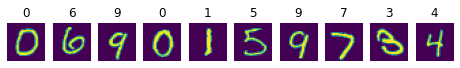

In [279]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

        # these list collects the loss value of train and test data for every epoch
    train_loss, test_loss = [], []
    
    for e in range(epoch):
        
            # these lists collects the train and test loss value of every batch
        avg_trn_cost, avg_tst_cost = [], []
    
        for batch in range(batches_per_epoch):
            
            x_data = X_train[batch*batch_size : (batch+1)*batch_size]
            y_data = Y_train[batch*batch_size : (batch+1)*batch_size]
            
            _, c, w1,w2,w3 = sess.run([adam_optimizer, cost, weight1, weight2, weight3], feed_dict = {x : x_data, y : y_data, prob : 0.5})
                
            print(f'Batch number: {batch} and train cost: {c}')
                
            avg_trn_cost.append(c)
            c_tst = sess.run(cost, feed_dict = {x : X_test, y : Y_test, prob : 0.0})            
            avg_tst_cost.append(c_tst)   

        train_loss.append(np.mean(avg_trn_cost))
        test_loss.append(np.mean(avg_tst_cost))
        
    correct_prediction = tf.math.equal(tf.math.argmax(y,1), tf.math.argmax(yhat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Train accuracy", accuracy.eval({x : X_train , y : Y_train, prob : 0.5}))
    test_accuracy = accuracy.eval({x : X_test , y : Y_test, prob : 0.0})
        
    fig, axes = plt.subplots(1,10, figsize = (8,4))
    for img, ax in zip(X_test[10:21], axes):
        ax.set_title(np.argmax(sess.run(yhat, feed_dict={x: [img], prob:0.0})))
        ax.imshow(img.reshape(28,28))
        ax.axis('off')
#    return [train_loss, test_loss, w1, w2, w3, test_accuracy]   

In [280]:
print(test_accuracy)

0.9659


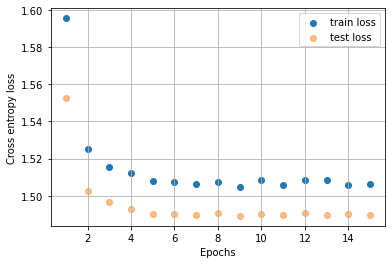

In [281]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), train_loss, label = "train loss")
plt.scatter(range(1, epoch+1), test_loss, label = "test loss", alpha =0.5)
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")

- ReLU with dropout of 50% achieved an accuracy of 96.59%
- Drop out layer made the test loss to be lower than train loss. Here are the possible reasons:
    -  Regularization is applied during training, but not during validation/testing. If you add in the regularization loss during validation/testing, your loss values and curves will look more similar.
    - Training loss is measured during each epoch while validation loss is measured after each epoch. On average, the training loss is measured 1/2 an epoch earlier. If you shift your training loss curve a half epoch to the left, your losses will align a bit better.
    - Your validation set may be easier than your training set or there is a leak in your data/bug in your code. Make sure your validation set is reasonably large and is sampled from the same distribution (and difficulty) as your training set.
    - You may be over-regularizing your model. Try reducing your regularization constraints, including increasing your model capacity (i.e., making it deeper with more parameters), reducing dropout, reducing L2 weight decay strength, etc.<br>
reference: https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/
